In [277]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from time import time
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import max_error
from sklearn.model_selection import GridSearchCV

In [279]:
df_June2017 = pd.read_csv('/content/drive/MyDrive/Code_MIS/June 2017.csv')
df_July2017 = pd.read_csv('/content/drive/MyDrive/Code_MIS/July 2017.csv')
df_August2017 = pd.read_csv('/content/drive/MyDrive/Code_MIS/August 2017.csv')
df_June2018 = pd.read_csv('/content/drive/MyDrive/Code_MIS/June 2018.csv')
df_July2018 = pd.read_csv('/content/drive/MyDrive/Code_MIS/July 2018.csv')
df_August2018 = pd.read_csv('/content/drive/MyDrive/Code_MIS/August 2018.csv')
df_June2019 = pd.read_csv('/content/drive/MyDrive/Code_MIS/June 2019.csv')
df_July2019 = pd.read_csv('/content/drive/MyDrive/Code_MIS/July 2019.csv')
df_August2019 = pd.read_csv('/content/drive/MyDrive/Code_MIS/August 2019.csv')
df_June2020 = pd.read_csv('/content/drive/MyDrive/Code_MIS/June 2020.csv')
df_July2020 = pd.read_csv('/content/drive/MyDrive/Code_MIS/July 2020.csv')
df_August2020 = pd.read_csv('/content/drive/MyDrive/Code_MIS/August 2020.csv')

In [280]:
frames = [df_June2017,df_July2017,df_August2017,df_June2018,df_July2018,df_August2018,df_June2019,df_July2019,df_August2019,df_June2020,df_July2020,df_August2020]
raw_dataset = pd.concat(frames)

In [281]:
main_dataset1 = raw_dataset

In [282]:
main_dataset1

,By Water System(1),By Water System(2),By Water System(3),Biochcmical Oxygen Demand(BOD) (mg/l),Dissolved Oxygen(DO) (mg/l),Chemical Oxygen Demand(COD) (mg/l),Water Temperature (Celcius),Hydrogen ion Concentration (pH),Suspended Solids(SS) (mg/l),Total Nitrogen(T-N) (mg/l),...,Chlorophyll a (mg/m^3),Dissolved Total Nitrogen(DTN) (mg/l),Dissolved Total Phosphorus(DTP) (mg/l),TOC (mg/l),Antimony (mg/l),Flow (m^3/sec),Month,Year,Organic Phosphorus (mg/l),Polychlorinated Biphenyl(PCB) (mg/l)
0,Nakdonggang,Andongdam,Hwangji 1,1.1,8.8,2.7,21.9,8.4,1.2,1.280,...,1.6,1.249,0.023,1.4,0.0,NaN,June,2017,NaN,NaN
1,Nakdonggang,Andongdam,Cheoramcheon,1.0,11.1,2.3,22.9,8.6,1.1,3.794,...,3.0,3.588,0.038,1.7,0.0,NaN,June,2017,NaN,NaN
2,Nakdonggang,Andongdam,Hwangji 2,1.3,10.0,4.4,23.5,8.6,1.6,1.449,...,4.5,1.302,0.013,2.8,0.0,NaN,June,2017,NaN,NaN
3,Nakdonggang,Andongdam,Hwangji 3,1.5,10.3,4.7,22.2,8.4,16.3,3.561,...,NaN,NaN,NaN,3.0,0.0,1.249,June,2017,NaN,NaN
4,Nakdonggang,Andongdam,Bonghwa,1.5,8.4,5.0,23.4,7.9,10.2,1.301,...,5.7,1.189,0.012,1.8,0.0,NaN,June,2017,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,Nakdonggang,Nakdong Miryang,Juhangcheon,1.1,11.2,3.4,28.9,8.1,2.4,1.809,...,NaN,NaN,NaN,2.2,NaN,0.035,August,2020,NaN,NaN
178,Nakdonggang,Nakdong Miryang,Seongdeok,3.4,11.1,5.4,30.5,8.0,14.2,2.595,...,NaN,NaN,NaN,3.5,NaN,1.308,August,2020,NaN,NaN
179,Nakdonggang,Nakdong Miryang,Haman,1.6,8.6,5.6,26.7,7.6,13.7,1.897,...,14.9,1.798,0.052,4.0,0.0,NaN,August,2020,NaN,NaN
180,Nakdonggang,Nakdong Miryang,Jucheongang,4.0,9.2,8.5,31.2,7.8,17.8,4.076,...,61.7,3.690,0.041,6.2,NaN,0.336,August,2020,NaN,NaN


In [283]:
main_dataset1.describe()

,Biochcmical Oxygen Demand(BOD) (mg/l),Dissolved Oxygen(DO) (mg/l),Chemical Oxygen Demand(COD) (mg/l),Water Temperature (Celcius),Hydrogen ion Concentration (pH),Suspended Solids(SS) (mg/l),Total Nitrogen(T-N) (mg/l),Total Phosphorus(T-P) (mg/l),Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml),Coliform Bacteria (Coliform Bacteria/100ml),...,Phosphorate-phosphorus(PO4-P) (mg/l),Chlorophyll a (mg/m^3),Dissolved Total Nitrogen(DTN) (mg/l),Dissolved Total Phosphorus(DTP) (mg/l),TOC (mg/l),Antimony (mg/l),Flow (m^3/sec),Year,Organic Phosphorus (mg/l),Polychlorinated Biphenyl(PCB) (mg/l)
count,2173.000000,2173.000000,2173.000000,2173.000000,2173.000000,2173.000000,2173.000000,2173.000000,1503.000000,1.503000e+03,...,1618.000000,1618.000000,1618.000000,1618.000000,2163.000000,668.000000,1078.000000,2173.000000,104.0,104.0
mean,1.666636,12.506121,5.986838,25.348780,7.912103,10.894202,2.215174,0.059618,1756.711910,3.755909e+04,...,0.026494,14.873980,1.993165,0.041962,4.065465,0.000207,43.390390,2018.507593,0.0,0.0
std,1.089332,178.965458,2.477643,3.201597,0.491789,17.831841,1.339178,0.057193,6431.396214,1.151936e+05,...,0.038098,17.615907,1.063226,0.042411,1.885645,0.001177,152.007022,1.115999,0.0,0.0
min,0.100000,4.000000,1.000000,10.000000,6.400000,0.200000,0.282000,0.000000,0.000000,0.000000e+00,...,0.000000,0.100000,0.026000,0.000000,0.700000,0.000000,0.000000,2017.000000,0.0,0.0
25%,0.900000,8.000000,4.300000,23.500000,7.600000,3.600000,1.413000,0.026000,10.000000,6.150000e+02,...,0.004000,4.000000,1.349250,0.016000,2.700000,0.000000,0.439000,2018.000000,0.0,0.0
50%,1.400000,8.600000,5.800000,25.500000,7.900000,6.700000,1.957000,0.046000,120.000000,5.950000e+03,...,0.014000,8.950000,1.817000,0.030000,3.800000,0.000000,2.417500,2019.000000,0.0,0.0
75%,2.100000,9.300000,7.300000,27.500000,8.200000,12.600000,2.585000,0.074000,965.000000,2.806150e+04,...,0.035000,19.475000,2.364000,0.052000,5.000000,0.000000,16.704000,2020.000000,0.0,0.0
max,8.900000,8351.000000,27.200000,36.000000,11.300000,438.000000,13.632000,0.832000,156000.000000,1.975000e+06,...,0.562000,191.100000,11.760000,0.576000,17.500000,0.014400,2472.707000,2020.000000,0.0,0.0


In [284]:
main_dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 181
Data columns (total 35 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   By Water System(1)                                       2173 non-null   object 
 1   By Water System(2)                                       2173 non-null   object 
 2   By Water System(3)                                       2173 non-null   object 
 3   Biochcmical Oxygen Demand(BOD) (mg/l)                    2173 non-null   float64
 4   Dissolved Oxygen(DO) (mg/l)                              2173 non-null   float64
 5   Chemical Oxygen Demand(COD) (mg/l)                       2173 non-null   float64
 6   Water Temperature (Celcius)                              2173 non-null   float64
 7   Hydrogen ion Concentration (pH)                          2173 non-null   float64
 8   Suspended Solids(SS) (mg/l)  

In [285]:
main_dataset1

,By Water System(1),By Water System(2),By Water System(3),Biochcmical Oxygen Demand(BOD) (mg/l),Dissolved Oxygen(DO) (mg/l),Chemical Oxygen Demand(COD) (mg/l),Water Temperature (Celcius),Hydrogen ion Concentration (pH),Suspended Solids(SS) (mg/l),Total Nitrogen(T-N) (mg/l),...,Chlorophyll a (mg/m^3),Dissolved Total Nitrogen(DTN) (mg/l),Dissolved Total Phosphorus(DTP) (mg/l),TOC (mg/l),Antimony (mg/l),Flow (m^3/sec),Month,Year,Organic Phosphorus (mg/l),Polychlorinated Biphenyl(PCB) (mg/l)
0,Nakdonggang,Andongdam,Hwangji 1,1.1,8.8,2.7,21.9,8.4,1.2,1.280,...,1.6,1.249,0.023,1.4,0.0,NaN,June,2017,NaN,NaN
1,Nakdonggang,Andongdam,Cheoramcheon,1.0,11.1,2.3,22.9,8.6,1.1,3.794,...,3.0,3.588,0.038,1.7,0.0,NaN,June,2017,NaN,NaN
2,Nakdonggang,Andongdam,Hwangji 2,1.3,10.0,4.4,23.5,8.6,1.6,1.449,...,4.5,1.302,0.013,2.8,0.0,NaN,June,2017,NaN,NaN
3,Nakdonggang,Andongdam,Hwangji 3,1.5,10.3,4.7,22.2,8.4,16.3,3.561,...,NaN,NaN,NaN,3.0,0.0,1.249,June,2017,NaN,NaN
4,Nakdonggang,Andongdam,Bonghwa,1.5,8.4,5.0,23.4,7.9,10.2,1.301,...,5.7,1.189,0.012,1.8,0.0,NaN,June,2017,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,Nakdonggang,Nakdong Miryang,Juhangcheon,1.1,11.2,3.4,28.9,8.1,2.4,1.809,...,NaN,NaN,NaN,2.2,NaN,0.035,August,2020,NaN,NaN
178,Nakdonggang,Nakdong Miryang,Seongdeok,3.4,11.1,5.4,30.5,8.0,14.2,2.595,...,NaN,NaN,NaN,3.5,NaN,1.308,August,2020,NaN,NaN
179,Nakdonggang,Nakdong Miryang,Haman,1.6,8.6,5.6,26.7,7.6,13.7,1.897,...,14.9,1.798,0.052,4.0,0.0,NaN,August,2020,NaN,NaN
180,Nakdonggang,Nakdong Miryang,Jucheongang,4.0,9.2,8.5,31.2,7.8,17.8,4.076,...,61.7,3.690,0.041,6.2,NaN,0.336,August,2020,NaN,NaN


In [286]:
main_dataset1.reset_index(drop=True, inplace=True)

In [287]:
main_dataset1

,By Water System(1),By Water System(2),By Water System(3),Biochcmical Oxygen Demand(BOD) (mg/l),Dissolved Oxygen(DO) (mg/l),Chemical Oxygen Demand(COD) (mg/l),Water Temperature (Celcius),Hydrogen ion Concentration (pH),Suspended Solids(SS) (mg/l),Total Nitrogen(T-N) (mg/l),...,Chlorophyll a (mg/m^3),Dissolved Total Nitrogen(DTN) (mg/l),Dissolved Total Phosphorus(DTP) (mg/l),TOC (mg/l),Antimony (mg/l),Flow (m^3/sec),Month,Year,Organic Phosphorus (mg/l),Polychlorinated Biphenyl(PCB) (mg/l)
0,Nakdonggang,Andongdam,Hwangji 1,1.1,8.8,2.7,21.9,8.4,1.2,1.280,...,1.6,1.249,0.023,1.4,0.0,NaN,June,2017,NaN,NaN
1,Nakdonggang,Andongdam,Cheoramcheon,1.0,11.1,2.3,22.9,8.6,1.1,3.794,...,3.0,3.588,0.038,1.7,0.0,NaN,June,2017,NaN,NaN
2,Nakdonggang,Andongdam,Hwangji 2,1.3,10.0,4.4,23.5,8.6,1.6,1.449,...,4.5,1.302,0.013,2.8,0.0,NaN,June,2017,NaN,NaN
3,Nakdonggang,Andongdam,Hwangji 3,1.5,10.3,4.7,22.2,8.4,16.3,3.561,...,NaN,NaN,NaN,3.0,0.0,1.249,June,2017,NaN,NaN
4,Nakdonggang,Andongdam,Bonghwa,1.5,8.4,5.0,23.4,7.9,10.2,1.301,...,5.7,1.189,0.012,1.8,0.0,NaN,June,2017,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168,Nakdonggang,Nakdong Miryang,Juhangcheon,1.1,11.2,3.4,28.9,8.1,2.4,1.809,...,NaN,NaN,NaN,2.2,NaN,0.035,August,2020,NaN,NaN
2169,Nakdonggang,Nakdong Miryang,Seongdeok,3.4,11.1,5.4,30.5,8.0,14.2,2.595,...,NaN,NaN,NaN,3.5,NaN,1.308,August,2020,NaN,NaN
2170,Nakdonggang,Nakdong Miryang,Haman,1.6,8.6,5.6,26.7,7.6,13.7,1.897,...,14.9,1.798,0.052,4.0,0.0,NaN,August,2020,NaN,NaN
2171,Nakdonggang,Nakdong Miryang,Jucheongang,4.0,9.2,8.5,31.2,7.8,17.8,4.076,...,61.7,3.690,0.041,6.2,NaN,0.336,August,2020,NaN,NaN


In [288]:
main_dataset1.drop(['Organic Phosphorus (mg/l)','Polychlorinated Biphenyl(PCB) (mg/l)'], axis=1, inplace=True)

In [289]:
main_dataset1.drop(['phenol (mg/l)','Hydrargyrum(Hg) (mg/l)','Hydrargyrum(Hg) (mg/l).1'], axis=1, inplace=True)

In [290]:
main_dataset1.drop(['Anionic Surfactant(ABS) (mg/l)',
                               'Cadmium(Cd) (mg/l)',
                               'Lead(Pb) (mg/l)',
                               'Hexavalent chromium Cr+6 (mg/l)',
                               'Arsenic(As) (mg/l)',
                               'Antimony (mg/l)',
                               'Flow (m^3/sec)'], axis=1, inplace=True)

In [291]:
main_dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2173 entries, 0 to 2172
Data columns (total 23 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   By Water System(1)                                       2173 non-null   object 
 1   By Water System(2)                                       2173 non-null   object 
 2   By Water System(3)                                       2173 non-null   object 
 3   Biochcmical Oxygen Demand(BOD) (mg/l)                    2173 non-null   float64
 4   Dissolved Oxygen(DO) (mg/l)                              2173 non-null   float64
 5   Chemical Oxygen Demand(COD) (mg/l)                       2173 non-null   float64
 6   Water Temperature (Celcius)                              2173 non-null   float64
 7   Hydrogen ion Concentration (pH)                          2173 non-null   float64
 8   Suspended Solids(SS) (mg/l) 

In [292]:
convert_dict = {'Year': str}
main_dataset1 = main_dataset1.astype(convert_dict)

In [293]:
main_dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2173 entries, 0 to 2172
Data columns (total 23 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   By Water System(1)                                       2173 non-null   object 
 1   By Water System(2)                                       2173 non-null   object 
 2   By Water System(3)                                       2173 non-null   object 
 3   Biochcmical Oxygen Demand(BOD) (mg/l)                    2173 non-null   float64
 4   Dissolved Oxygen(DO) (mg/l)                              2173 non-null   float64
 5   Chemical Oxygen Demand(COD) (mg/l)                       2173 non-null   float64
 6   Water Temperature (Celcius)                              2173 non-null   float64
 7   Hydrogen ion Concentration (pH)                          2173 non-null   float64
 8   Suspended Solids(SS) (mg/l) 

In [294]:
main_dataset1.std()

<ipython-input-294-335708f4573f>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  main_dataset1.std()


Biochcmical Oxygen Demand(BOD) (mg/l)                           1.089332
Dissolved Oxygen(DO) (mg/l)                                   178.965458
Chemical Oxygen Demand(COD) (mg/l)                              2.477643
Water Temperature (Celcius)                                     3.201597
Hydrogen ion Concentration (pH)                                 0.491789
Suspended Solids(SS) (mg/l)                                    17.831841
Total Nitrogen(T-N) (mg/l)                                      1.339178
Total Phosphorus(T-P) (mg/l)                                    0.057193
Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)      6431.396214
Coliform Bacteria (Coliform Bacteria/100ml)                115193.603102
Electrical Conductivity(EC) (umhos/cm)                        148.763520
Nitrate Nitrogen(NO3-N) (mg/l)                                  0.839706
Ammonia Nitrogen(NH3-N) (mg/l)                                  0.100658
Phosphorate-phosphorus(PO4-P) (mg/l)               

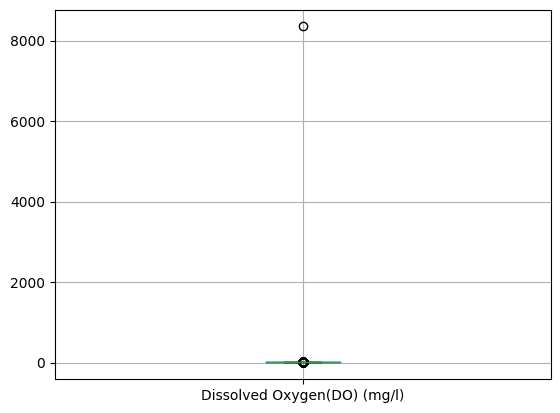

In [295]:
boxplot1 = main_dataset1.boxplot(column=['Dissolved Oxygen(DO) (mg/l)'])

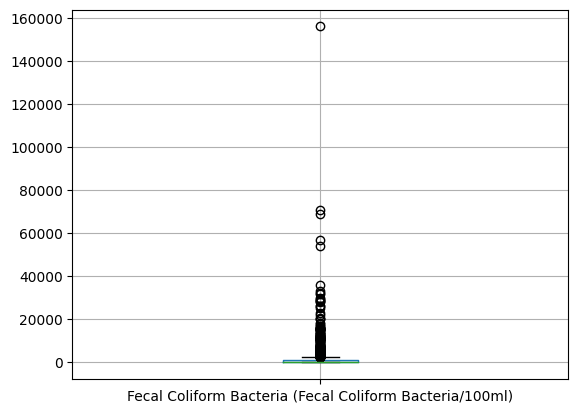

In [296]:
boxplot2 = main_dataset1.boxplot(column=['Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)'])

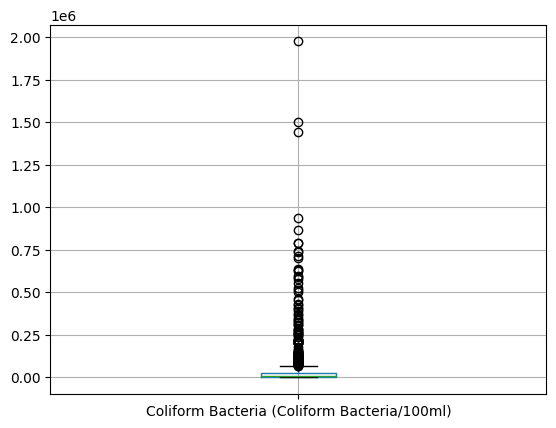

In [297]:
boxplot3 = main_dataset1.boxplot(column=['Coliform Bacteria (Coliform Bacteria/100ml)'])

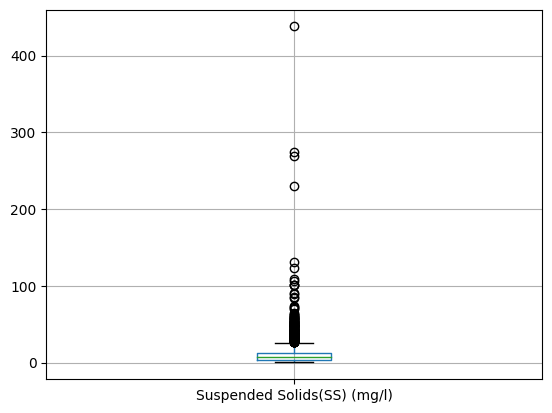

In [298]:
boxplot4 = main_dataset1.boxplot(column=['Suspended Solids(SS) (mg/l)'])

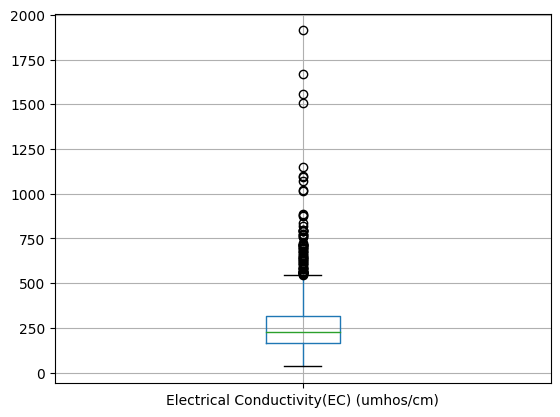

In [299]:
boxplot5 = main_dataset1.boxplot(column=['Electrical Conductivity(EC) (umhos/cm)'])

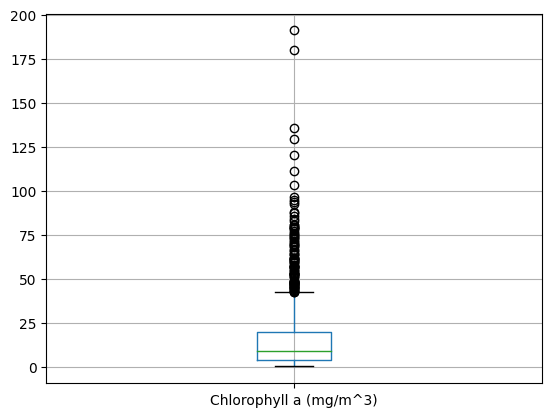

In [300]:
boxplot6 = main_dataset1.boxplot(column=['Chlorophyll a (mg/m^3)'])

In [301]:
#Dissolved Oxygen(DO) (mg/l)
DOQ_1 = main_dataset1['Dissolved Oxygen(DO) (mg/l)'].quantile(0.25)
DOQ_3 = main_dataset1['Dissolved Oxygen(DO) (mg/l)'].quantile(0.75)
IQR = DOQ_3 - DOQ_1
Lower_limit = DOQ_1 - 1.5 * IQR
Upper_limit = DOQ_3 + 1.5 * IQR
main_dataset1['Dissolved Oxygen(DO) (mg/l)']=np.where(main_dataset1['Dissolved Oxygen(DO) (mg/l)']>Upper_limit,Upper_limit,np.where(main_dataset1['Dissolved Oxygen(DO) (mg/l)']<Lower_limit,Lower_limit,main_dataset1['Dissolved Oxygen(DO) (mg/l)']))

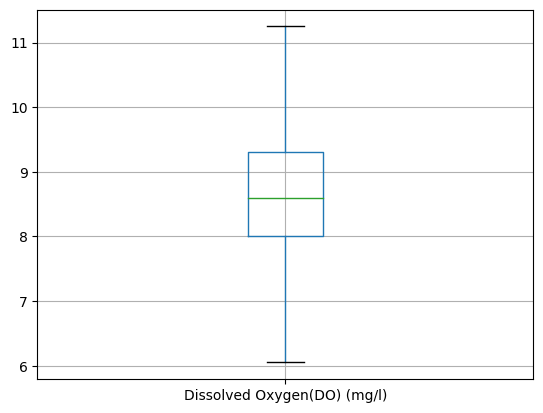

In [302]:
boxplot1 = main_dataset1.boxplot(column=['Dissolved Oxygen(DO) (mg/l)'])

In [303]:
#Suspended Solids(SS) (mg/l)
SSQ_1 = main_dataset1['Suspended Solids(SS) (mg/l)'].quantile(0.25)
SSQ_3 = main_dataset1['Suspended Solids(SS) (mg/l)'].quantile(0.75)
IQR_4 = SSQ_3 - SSQ_1
Lower_limit_4 = SSQ_1 - 1.5 * IQR_4
Upper_limit_4 = SSQ_3 + 1.5 * IQR_4
main_dataset1['Suspended Solids(SS) (mg/l)']=np.where(main_dataset1['Suspended Solids(SS) (mg/l)']>Upper_limit_4,Upper_limit_4,np.where(main_dataset1['Suspended Solids(SS) (mg/l)']<Lower_limit_4,Lower_limit_4,main_dataset1['Suspended Solids(SS) (mg/l)']))

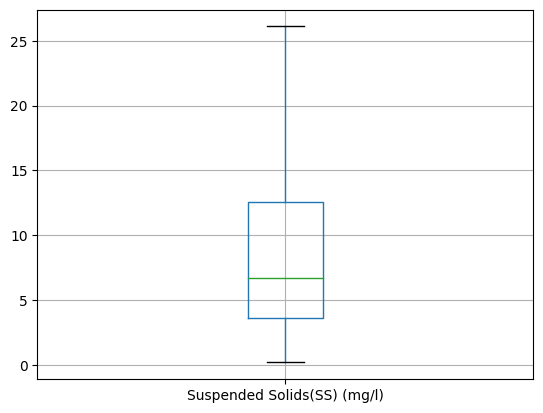

In [304]:
boxplot4 = main_dataset1.boxplot(column=['Suspended Solids(SS) (mg/l)'])

In [305]:
#Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)
FCBQ_1 = main_dataset1['Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)'].quantile(0.25)
FCBQ_3 = main_dataset1['Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)'].quantile(0.75)
IQR_2 = FCBQ_3 - FCBQ_1
Lower_limit_2 = FCBQ_1 - 1.5 * IQR_2
Upper_limit_2 = FCBQ_3 + 1.5 * IQR_2
main_dataset1['Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)']=np.where(main_dataset1['Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)']>Upper_limit_2,Upper_limit_2,np.where(main_dataset1['Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)']<Lower_limit_2,Lower_limit_2,main_dataset1['Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)']))

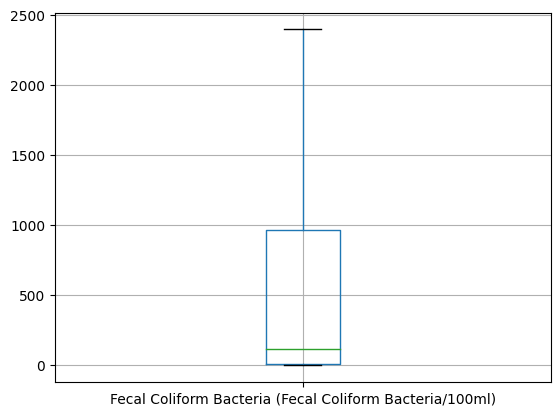

In [306]:
boxplot2 = main_dataset1.boxplot(column=['Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)'])

In [307]:
#Coliform Bacteria (Coliform Bacteria/100ml)
CBQ_1 = main_dataset1['Coliform Bacteria (Coliform Bacteria/100ml)'].quantile(0.25)
CBQ_3 = main_dataset1['Coliform Bacteria (Coliform Bacteria/100ml)'].quantile(0.75)
IQR_3 = CBQ_3 - CBQ_1
Lower_limit_3 = CBQ_1 - 1.5 * IQR_3
Upper_limit_3 = CBQ_3 + 1.5 * IQR_3
main_dataset1['Coliform Bacteria (Coliform Bacteria/100ml)']=np.where(main_dataset1['Coliform Bacteria (Coliform Bacteria/100ml)']>Upper_limit_3,Upper_limit_3,np.where(main_dataset1['Coliform Bacteria (Coliform Bacteria/100ml)']<Lower_limit_3,Lower_limit_3,main_dataset1['Coliform Bacteria (Coliform Bacteria/100ml)']))

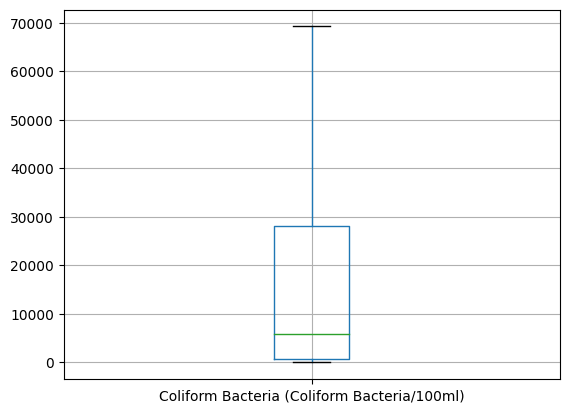

In [308]:
boxplot3 = main_dataset1.boxplot(column=['Coliform Bacteria (Coliform Bacteria/100ml)'])

In [309]:
#Electrical Conductivity(EC) (umhos/cm)
ECQ_1 = main_dataset1['Electrical Conductivity(EC) (umhos/cm)'].quantile(0.25)
ECQ_3 = main_dataset1['Electrical Conductivity(EC) (umhos/cm)'].quantile(0.75)
IQR_5 = ECQ_3 - ECQ_1
Lower_limit_5 = ECQ_1 - 1.5 * IQR_5
Upper_limit_5 = ECQ_3 + 1.5 * IQR_5
main_dataset1['Electrical Conductivity(EC) (umhos/cm)']=np.where(main_dataset1['Electrical Conductivity(EC) (umhos/cm)']>Upper_limit_5,Upper_limit_5,np.where(main_dataset1['Electrical Conductivity(EC) (umhos/cm)']<Lower_limit_5,Lower_limit_5,main_dataset1['Electrical Conductivity(EC) (umhos/cm)']))

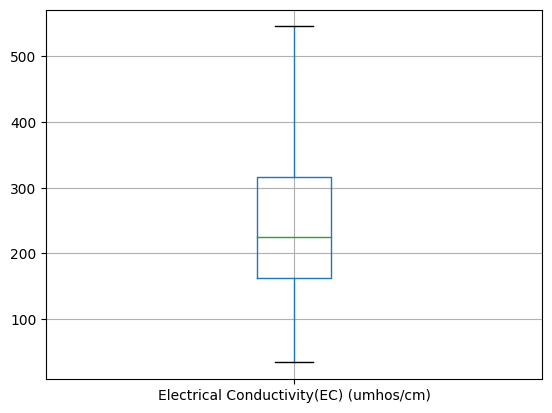

In [310]:
boxplot5 = main_dataset1.boxplot(column=['Electrical Conductivity(EC) (umhos/cm)'])

In [311]:
#Chlorophyll a (mg/m^3)
CHQ_1 = main_dataset1['Chlorophyll a (mg/m^3)'].quantile(0.25)
CHQ_3 = main_dataset1['Chlorophyll a (mg/m^3)'].quantile(0.75)
IQR_6 = CHQ_3 - CHQ_1
Lower_limit_6 = CHQ_1 - 1.5 * IQR_6
Upper_limit_6 = CHQ_3 + 1.5 * IQR_6
main_dataset1['Chlorophyll a (mg/m^3)']=np.where(main_dataset1['Chlorophyll a (mg/m^3)']>Upper_limit_6,Upper_limit_6,np.where(main_dataset1['Chlorophyll a (mg/m^3)']<Lower_limit_6,Lower_limit_6,main_dataset1['Chlorophyll a (mg/m^3)']))

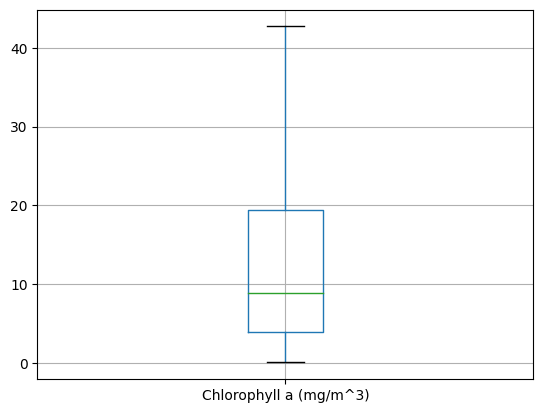

In [312]:
boxplot6 = main_dataset1.boxplot(column=['Chlorophyll a (mg/m^3)'])

In [313]:
main_dataset1.std()

<ipython-input-313-335708f4573f>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  main_dataset1.std()


Biochcmical Oxygen Demand(BOD) (mg/l)                          1.089332
Dissolved Oxygen(DO) (mg/l)                                    1.152651
Chemical Oxygen Demand(COD) (mg/l)                             2.477643
Water Temperature (Celcius)                                    3.201597
Hydrogen ion Concentration (pH)                                0.491789
Suspended Solids(SS) (mg/l)                                    7.210881
Total Nitrogen(T-N) (mg/l)                                     1.339178
Total Phosphorus(T-P) (mg/l)                                   0.057193
Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)      889.446370
Coliform Bacteria (Coliform Bacteria/100ml)                24035.213321
Electrical Conductivity(EC) (umhos/cm)                       119.012128
Nitrate Nitrogen(NO3-N) (mg/l)                                 0.839706
Ammonia Nitrogen(NH3-N) (mg/l)                                 0.100658
Phosphorate-phosphorus(PO4-P) (mg/l)                           0

In [314]:
main_dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2173 entries, 0 to 2172
Data columns (total 23 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   By Water System(1)                                       2173 non-null   object 
 1   By Water System(2)                                       2173 non-null   object 
 2   By Water System(3)                                       2173 non-null   object 
 3   Biochcmical Oxygen Demand(BOD) (mg/l)                    2173 non-null   float64
 4   Dissolved Oxygen(DO) (mg/l)                              2173 non-null   float64
 5   Chemical Oxygen Demand(COD) (mg/l)                       2173 non-null   float64
 6   Water Temperature (Celcius)                              2173 non-null   float64
 7   Hydrogen ion Concentration (pH)                          2173 non-null   float64
 8   Suspended Solids(SS) (mg/l) 

In [315]:
main_dataset1['Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)'].fillna(int(main_dataset1['Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)'].mean()), inplace=True)
main_dataset1['Coliform Bacteria (Coliform Bacteria/100ml)'].fillna(int(main_dataset1['Coliform Bacteria (Coliform Bacteria/100ml)'].mean()), inplace=True)
main_dataset1['Nitrate Nitrogen(NO3-N) (mg/l)'].fillna(int(main_dataset1['Nitrate Nitrogen(NO3-N) (mg/l)'].mean()), inplace=True)
main_dataset1['Ammonia Nitrogen(NH3-N) (mg/l)'].fillna(int(main_dataset1['Ammonia Nitrogen(NH3-N) (mg/l)'].mean()), inplace=True)
main_dataset1['Phosphorate-phosphorus(PO4-P) (mg/l)'].fillna(int(main_dataset1['Phosphorate-phosphorus(PO4-P) (mg/l)'].mean()), inplace=True)
main_dataset1['Chlorophyll a (mg/m^3)'].fillna(int(main_dataset1['Chlorophyll a (mg/m^3)'].mean()), inplace=True)
main_dataset1['Dissolved Total Nitrogen(DTN) (mg/l)'].fillna(int(main_dataset1['Dissolved Total Nitrogen(DTN) (mg/l)'].mean()), inplace=True)
main_dataset1['Dissolved Total Phosphorus(DTP) (mg/l)'].fillna(int(main_dataset1['Dissolved Total Phosphorus(DTP) (mg/l)'].mean()), inplace=True)
main_dataset1['TOC (mg/l)'].fillna(int(main_dataset1['TOC (mg/l)'].mean()), inplace=True)

In [316]:
main_dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2173 entries, 0 to 2172
Data columns (total 23 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   By Water System(1)                                       2173 non-null   object 
 1   By Water System(2)                                       2173 non-null   object 
 2   By Water System(3)                                       2173 non-null   object 
 3   Biochcmical Oxygen Demand(BOD) (mg/l)                    2173 non-null   float64
 4   Dissolved Oxygen(DO) (mg/l)                              2173 non-null   float64
 5   Chemical Oxygen Demand(COD) (mg/l)                       2173 non-null   float64
 6   Water Temperature (Celcius)                              2173 non-null   float64
 7   Hydrogen ion Concentration (pH)                          2173 non-null   float64
 8   Suspended Solids(SS) (mg/l) 

<ipython-input-317-8a4663bcd6c8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = main_dataset1.corr()


<Axes: >

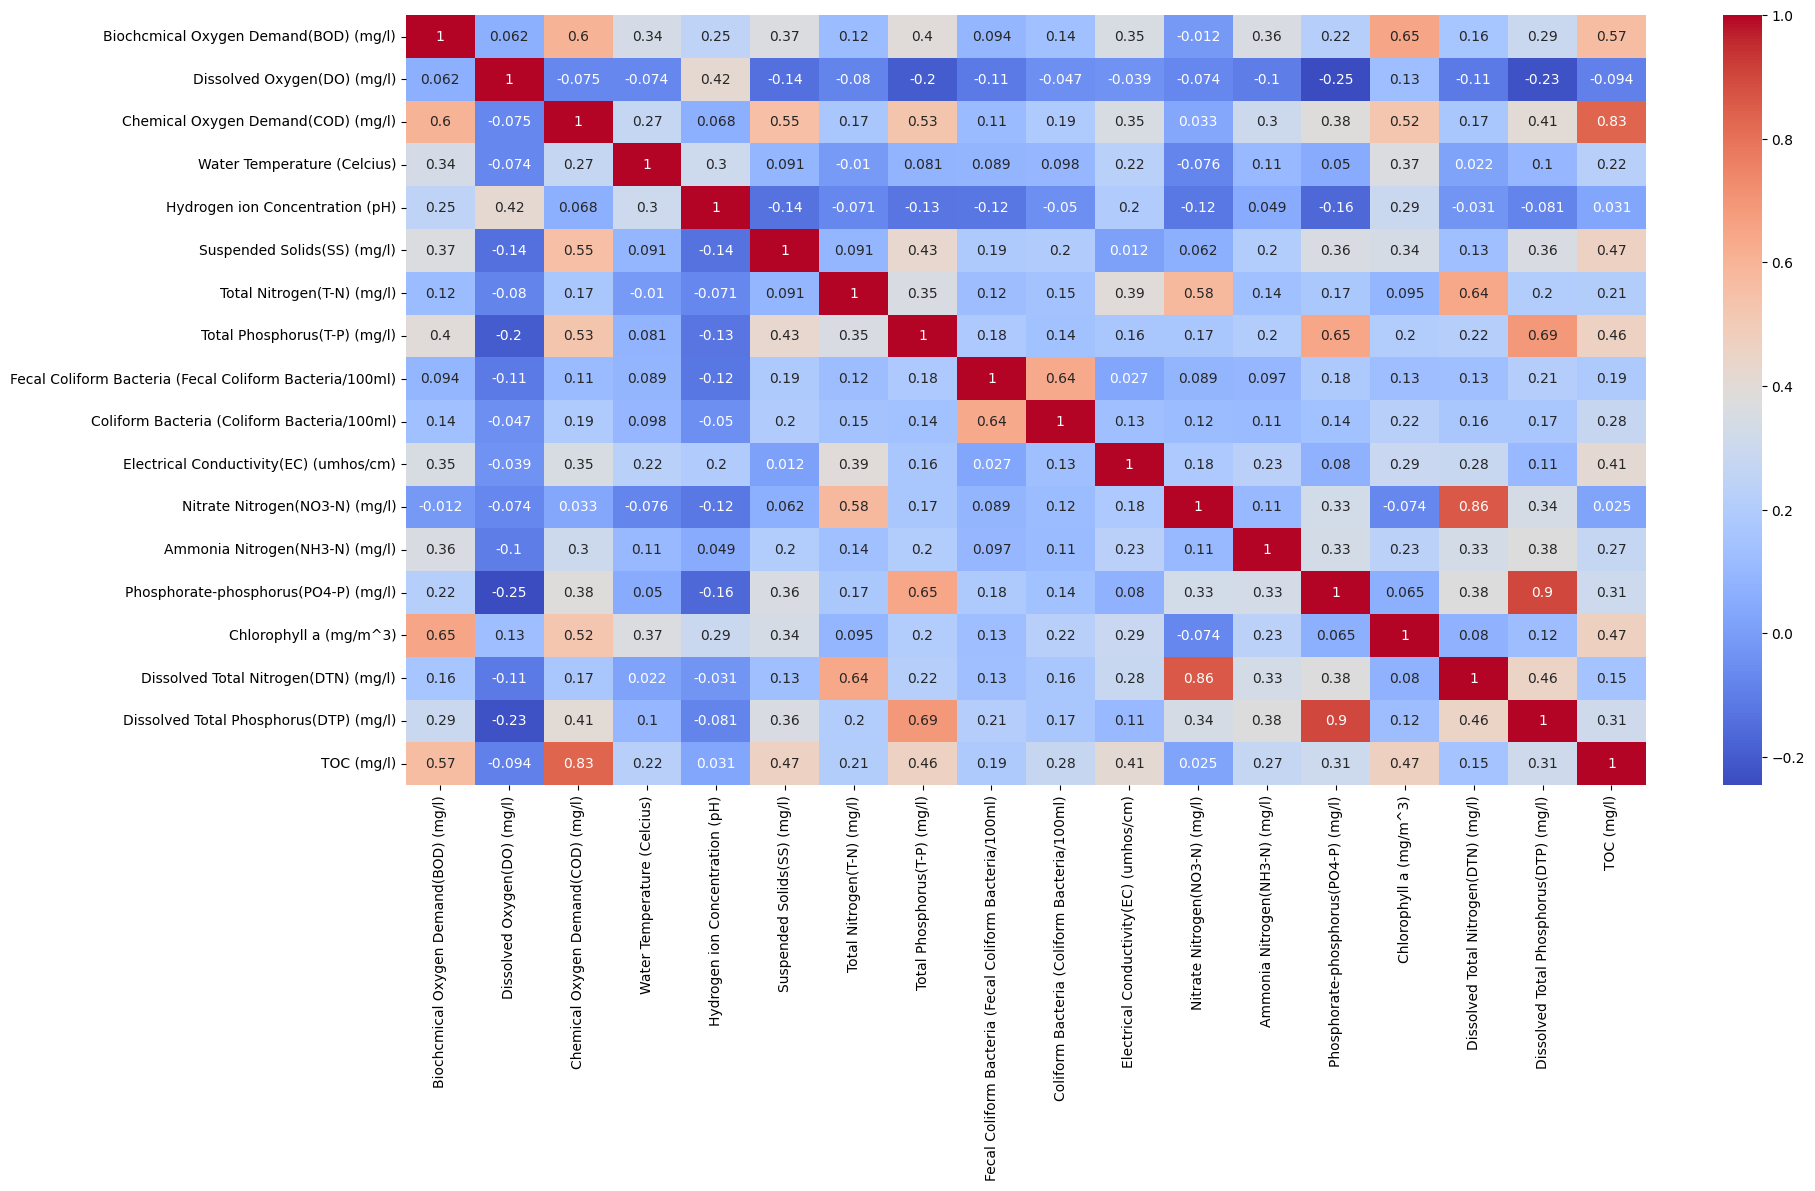

In [317]:
corr = main_dataset1.corr()
plt.figure(figsize =(20,10))
sb.heatmap(corr , annot = True, cmap = 'coolwarm')

In [318]:
model_dataset1 = main_dataset1.copy()

In [319]:
model_dataset1

,By Water System(1),By Water System(2),By Water System(3),Biochcmical Oxygen Demand(BOD) (mg/l),Dissolved Oxygen(DO) (mg/l),Chemical Oxygen Demand(COD) (mg/l),Water Temperature (Celcius),Hydrogen ion Concentration (pH),Suspended Solids(SS) (mg/l),Total Nitrogen(T-N) (mg/l),...,Electrical Conductivity(EC) (umhos/cm),Nitrate Nitrogen(NO3-N) (mg/l),Ammonia Nitrogen(NH3-N) (mg/l),Phosphorate-phosphorus(PO4-P) (mg/l),Chlorophyll a (mg/m^3),Dissolved Total Nitrogen(DTN) (mg/l),Dissolved Total Phosphorus(DTP) (mg/l),TOC (mg/l),Month,Year
0,Nakdonggang,Andongdam,Hwangji 1,1.1,8.8,2.7,21.9,8.4,1.2,1.280,...,545.5,0.990,0.114,0.006,1.6000,1.249,0.023,1.4,June,2017
1,Nakdonggang,Andongdam,Cheoramcheon,1.0,11.1,2.3,22.9,8.6,1.1,3.794,...,407.0,0.579,0.095,0.022,3.0000,3.588,0.038,1.7,June,2017
2,Nakdonggang,Andongdam,Hwangji 2,1.3,10.0,4.4,23.5,8.6,1.6,1.449,...,545.5,1.050,0.179,0.006,4.5000,1.302,0.013,2.8,June,2017
3,Nakdonggang,Andongdam,Hwangji 3,1.5,10.3,4.7,22.2,8.4,16.3,3.561,...,544.0,1.000,0.000,0.000,13.0000,1.000,0.000,3.0,June,2017
4,Nakdonggang,Andongdam,Bonghwa,1.5,8.4,5.0,23.4,7.9,10.2,1.301,...,223.0,0.550,0.108,0.000,5.7000,1.189,0.012,1.8,June,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168,Nakdonggang,Nakdong Miryang,Juhangcheon,1.1,11.2,3.4,28.9,8.1,2.4,1.809,...,285.0,1.000,0.000,0.000,13.0000,1.000,0.000,2.2,August,2020
2169,Nakdonggang,Nakdong Miryang,Seongdeok,3.4,11.1,5.4,30.5,8.0,14.2,2.595,...,197.0,1.000,0.000,0.000,13.0000,1.000,0.000,3.5,August,2020
2170,Nakdonggang,Nakdong Miryang,Haman,1.6,8.6,5.6,26.7,7.6,13.7,1.897,...,164.0,1.491,0.063,0.036,14.9000,1.798,0.052,4.0,August,2020
2171,Nakdonggang,Nakdong Miryang,Jucheongang,4.0,9.2,8.5,31.2,7.8,17.8,4.076,...,545.5,2.805,0.400,0.013,42.6875,3.690,0.041,6.2,August,2020


In [320]:
model_dataset1.drop(['By Water System(1)',
                               'By Water System(2)',
                               'By Water System(3)',
                               'Month',
                               'Year'], axis=1, inplace=True)

In [321]:
model_dataset1

,Biochcmical Oxygen Demand(BOD) (mg/l),Dissolved Oxygen(DO) (mg/l),Chemical Oxygen Demand(COD) (mg/l),Water Temperature (Celcius),Hydrogen ion Concentration (pH),Suspended Solids(SS) (mg/l),Total Nitrogen(T-N) (mg/l),Total Phosphorus(T-P) (mg/l),Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml),Coliform Bacteria (Coliform Bacteria/100ml),Electrical Conductivity(EC) (umhos/cm),Nitrate Nitrogen(NO3-N) (mg/l),Ammonia Nitrogen(NH3-N) (mg/l),Phosphorate-phosphorus(PO4-P) (mg/l),Chlorophyll a (mg/m^3),Dissolved Total Nitrogen(DTN) (mg/l),Dissolved Total Phosphorus(DTP) (mg/l),TOC (mg/l)
0,1.1,8.8,2.7,21.9,8.4,1.2,1.280,0.032,0.0,41000.00,545.5,0.990,0.114,0.006,1.6000,1.249,0.023,1.4
1,1.0,11.1,2.3,22.9,8.6,1.1,3.794,0.044,0.0,2900.00,407.0,0.579,0.095,0.022,3.0000,3.588,0.038,1.7
2,1.3,10.0,4.4,23.5,8.6,1.6,1.449,0.021,0.0,42000.00,545.5,1.050,0.179,0.006,4.5000,1.302,0.013,2.8
3,1.5,10.3,4.7,22.2,8.4,16.3,3.561,0.044,626.0,18773.00,544.0,1.000,0.000,0.000,13.0000,1.000,0.000,3.0
4,1.5,8.4,5.0,23.4,7.9,10.2,1.301,0.012,0.0,0.00,223.0,0.550,0.108,0.000,5.7000,1.189,0.012,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168,1.1,11.2,3.4,28.9,8.1,2.4,1.809,0.043,626.0,18773.00,285.0,1.000,0.000,0.000,13.0000,1.000,0.000,2.2
2169,3.4,11.1,5.4,30.5,8.0,14.2,2.595,0.032,626.0,18773.00,197.0,1.000,0.000,0.000,13.0000,1.000,0.000,3.5
2170,1.6,8.6,5.6,26.7,7.6,13.7,1.897,0.066,2397.5,69231.25,164.0,1.491,0.063,0.036,14.9000,1.798,0.052,4.0
2171,4.0,9.2,8.5,31.2,7.8,17.8,4.076,0.060,626.0,18773.00,545.5,2.805,0.400,0.013,42.6875,3.690,0.041,6.2


In [322]:
model_dataset1 = model_dataset1.reindex(columns = [col for col in model_dataset1.columns if col != 'Chemical Oxygen Demand(COD) (mg/l)'] + ['Chemical Oxygen Demand(COD) (mg/l)'])

In [323]:
model_dataset1

,Biochcmical Oxygen Demand(BOD) (mg/l),Dissolved Oxygen(DO) (mg/l),Water Temperature (Celcius),Hydrogen ion Concentration (pH),Suspended Solids(SS) (mg/l),Total Nitrogen(T-N) (mg/l),Total Phosphorus(T-P) (mg/l),Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml),Coliform Bacteria (Coliform Bacteria/100ml),Electrical Conductivity(EC) (umhos/cm),Nitrate Nitrogen(NO3-N) (mg/l),Ammonia Nitrogen(NH3-N) (mg/l),Phosphorate-phosphorus(PO4-P) (mg/l),Chlorophyll a (mg/m^3),Dissolved Total Nitrogen(DTN) (mg/l),Dissolved Total Phosphorus(DTP) (mg/l),TOC (mg/l),Chemical Oxygen Demand(COD) (mg/l)
0,1.1,8.8,21.9,8.4,1.2,1.280,0.032,0.0,41000.00,545.5,0.990,0.114,0.006,1.6000,1.249,0.023,1.4,2.7
1,1.0,11.1,22.9,8.6,1.1,3.794,0.044,0.0,2900.00,407.0,0.579,0.095,0.022,3.0000,3.588,0.038,1.7,2.3
2,1.3,10.0,23.5,8.6,1.6,1.449,0.021,0.0,42000.00,545.5,1.050,0.179,0.006,4.5000,1.302,0.013,2.8,4.4
3,1.5,10.3,22.2,8.4,16.3,3.561,0.044,626.0,18773.00,544.0,1.000,0.000,0.000,13.0000,1.000,0.000,3.0,4.7
4,1.5,8.4,23.4,7.9,10.2,1.301,0.012,0.0,0.00,223.0,0.550,0.108,0.000,5.7000,1.189,0.012,1.8,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168,1.1,11.2,28.9,8.1,2.4,1.809,0.043,626.0,18773.00,285.0,1.000,0.000,0.000,13.0000,1.000,0.000,2.2,3.4
2169,3.4,11.1,30.5,8.0,14.2,2.595,0.032,626.0,18773.00,197.0,1.000,0.000,0.000,13.0000,1.000,0.000,3.5,5.4
2170,1.6,8.6,26.7,7.6,13.7,1.897,0.066,2397.5,69231.25,164.0,1.491,0.063,0.036,14.9000,1.798,0.052,4.0,5.6
2171,4.0,9.2,31.2,7.8,17.8,4.076,0.060,626.0,18773.00,545.5,2.805,0.400,0.013,42.6875,3.690,0.041,6.2,8.5


In [324]:
model_dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2173 entries, 0 to 2172
Data columns (total 18 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Biochcmical Oxygen Demand(BOD) (mg/l)                    2173 non-null   float64
 1   Dissolved Oxygen(DO) (mg/l)                              2173 non-null   float64
 2   Water Temperature (Celcius)                              2173 non-null   float64
 3   Hydrogen ion Concentration (pH)                          2173 non-null   float64
 4   Suspended Solids(SS) (mg/l)                              2173 non-null   float64
 5   Total Nitrogen(T-N) (mg/l)                               2173 non-null   float64
 6   Total Phosphorus(T-P) (mg/l)                             2173 non-null   float64
 7   Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)  2173 non-null   float64
 8   Coliform Bacteria (Coliform 

In [325]:
x = model_dataset1[["Biochcmical Oxygen Demand(BOD) (mg/l)",
                               "Dissolved Oxygen(DO) (mg/l)",
                               "Water Temperature (Celcius)",
                               "Hydrogen ion Concentration (pH)",
                               "Suspended Solids(SS) (mg/l)",
                               "Total Nitrogen(T-N) (mg/l)",
                               "Total Phosphorus(T-P) (mg/l)",
                               "Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)",
                               "Coliform Bacteria (Coliform Bacteria/100ml)",
                               "Electrical Conductivity(EC) (umhos/cm)",
                               "Nitrate Nitrogen(NO3-N) (mg/l)",
                               "Ammonia Nitrogen(NH3-N) (mg/l)",
                               "Phosphorate-phosphorus(PO4-P) (mg/l)",
                               "Chlorophyll a (mg/m^3)",
                               "Dissolved Total Nitrogen(DTN) (mg/l)",
                               "Dissolved Total Phosphorus(DTP) (mg/l)",
                               "TOC (mg/l)"]]


In [326]:
y = model_dataset1["Chemical Oxygen Demand(COD) (mg/l)"]

In [327]:
x

,Biochcmical Oxygen Demand(BOD) (mg/l),Dissolved Oxygen(DO) (mg/l),Water Temperature (Celcius),Hydrogen ion Concentration (pH),Suspended Solids(SS) (mg/l),Total Nitrogen(T-N) (mg/l),Total Phosphorus(T-P) (mg/l),Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml),Coliform Bacteria (Coliform Bacteria/100ml),Electrical Conductivity(EC) (umhos/cm),Nitrate Nitrogen(NO3-N) (mg/l),Ammonia Nitrogen(NH3-N) (mg/l),Phosphorate-phosphorus(PO4-P) (mg/l),Chlorophyll a (mg/m^3),Dissolved Total Nitrogen(DTN) (mg/l),Dissolved Total Phosphorus(DTP) (mg/l),TOC (mg/l)
0,1.1,8.8,21.9,8.4,1.2,1.280,0.032,0.0,41000.00,545.5,0.990,0.114,0.006,1.6000,1.249,0.023,1.4
1,1.0,11.1,22.9,8.6,1.1,3.794,0.044,0.0,2900.00,407.0,0.579,0.095,0.022,3.0000,3.588,0.038,1.7
2,1.3,10.0,23.5,8.6,1.6,1.449,0.021,0.0,42000.00,545.5,1.050,0.179,0.006,4.5000,1.302,0.013,2.8
3,1.5,10.3,22.2,8.4,16.3,3.561,0.044,626.0,18773.00,544.0,1.000,0.000,0.000,13.0000,1.000,0.000,3.0
4,1.5,8.4,23.4,7.9,10.2,1.301,0.012,0.0,0.00,223.0,0.550,0.108,0.000,5.7000,1.189,0.012,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168,1.1,11.2,28.9,8.1,2.4,1.809,0.043,626.0,18773.00,285.0,1.000,0.000,0.000,13.0000,1.000,0.000,2.2
2169,3.4,11.1,30.5,8.0,14.2,2.595,0.032,626.0,18773.00,197.0,1.000,0.000,0.000,13.0000,1.000,0.000,3.5
2170,1.6,8.6,26.7,7.6,13.7,1.897,0.066,2397.5,69231.25,164.0,1.491,0.063,0.036,14.9000,1.798,0.052,4.0
2171,4.0,9.2,31.2,7.8,17.8,4.076,0.060,626.0,18773.00,545.5,2.805,0.400,0.013,42.6875,3.690,0.041,6.2


In [328]:
y

0       2.7
1       2.3
2       4.4
3       4.7
4       5.0
       ... 
2168    3.4
2169    5.4
2170    5.6
2171    8.5
2172    1.5
Name: Chemical Oxygen Demand(COD) (mg/l), Length: 2173, dtype: float64

In [329]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [330]:
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(1738, 17) (1738,)
(435, 17) (435,)


In [331]:
m1 = LinearRegression()
m2 = Ridge(alpha = 1)
m3 = Lasso(alpha = 1)
m4 = SVR(kernel = 'rbf', gamma='scale', C=1.0, epsilon=0.1)
m5 = KNeighborsRegressor(n_neighbors= 2 )
m6 = DecisionTreeRegressor(random_state = 0)

In [332]:
m1.fit(x_train,y_train)
y1_pred = m1.predict(x_test)
print("Mean Absolute Error: ",mean_absolute_error(y_test, y1_pred))
print("Mean Squared Error: ",mean_squared_error(y_test, y1_pred, squared = True))

Mean Absolute Error:  0.7981215350175023
Mean Squared Error:  1.2196249276753712


In [333]:
m2.fit(x_train,y_train)
y2_pred = m2.predict(x_test)
print("Mean Absolute Error: ",mean_absolute_error(y_test, y2_pred))
print("Mean Squared Error: ",mean_squared_error(y_test, y2_pred, squared = True))

Mean Absolute Error:  0.790487146307299
Mean Squared Error:  1.1850357734505008


In [334]:
m3.fit(x_train,y_train)
y3_pred = m3.predict(x_test)
print("Mean Absolute Error: ",mean_absolute_error(y_test, y3_pred))
print("Mean Squared Error: ",mean_squared_error(y_test, y3_pred, squared = True))

Mean Absolute Error:  1.0001163011269403
Mean Squared Error:  1.9251679274468647


In [335]:
m4.fit(x_train,y_train)
y4_pred = m4.predict(x_test)
print("Mean Absolute Error: ",mean_absolute_error(y_test, y4_pred))
print("Mean Squared Error: ",mean_squared_error(y_test, y4_pred, squared = True))

Mean Absolute Error:  1.8671882396225854
Mean Squared Error:  6.34108278319763


In [336]:
m5.fit(x_train,y_train)
y5_pred = m5.predict(x_test)
print("Mean Absolute Error: ",mean_absolute_error(y_test, y5_pred))
print("Mean Squared Error: ",mean_squared_error(y_test, y5_pred, squared = True))

Mean Absolute Error:  1.8478160919540232
Mean Squared Error:  6.529494252873563


In [337]:
m6.fit(x_train,y_train)
y6_pred = m6.predict(x_test)
print("Mean Absolute Error: ",mean_absolute_error(y_test, y6_pred))
print("Mean Squared Error: ",mean_squared_error(y_test, y6_pred, squared = True))

Mean Absolute Error:  0.8586206896551725
Mean Squared Error:  1.656942528735632


In [338]:
models = [
    {'name': 'Linear Regression',
      'model': LinearRegression(),
      'param_grid': {'fit_intercept': [True,False],
                            'n_jobs': [None,1,5,10],
                            'positive': [True,False]}},
    {'name': 'Ridge Linear Regression',
      'model': Ridge(),
      'param_grid': {'alpha': [0.01, 0.1, 1.0, 10.0],
                           'fit_intercept': [True,False],
                           'random_state': [None,1,42]}},
    {'name': 'Lasso Linear Regression',
      'model': Lasso(),
      'param_grid': {'alpha': [0.01, 0.1, 1.0, 10.0],
                           'fit_intercept': [True,False],
                           'random_state': [None,1,42]}},
    {'name': 'Support Vector Regression',
      'model': SVR(),
      'param_grid': {'C': [0.1, 1, 10],
                            'degree': [3,6,9],
                            'epsilon': [0.01, 0.1, 0.2],
                            'gamma': ['scale', 'auto']
                           }},
    {'name': 'K-Neighbors Regressor',
     'model': KNeighborsRegressor(),
     'param_grid': {'n_neighbors': [3, 5, 7],
                          'weights': ['uniform','distance'],
                          'algorithm': ['auto','ball_tree','kd_tree','brute'],
                           'p': [1, 2]
                          }},
    {'name': 'Decision Tree Regressor',
      'model': DecisionTreeRegressor(),
      'param_grid': {'max_depth': [None, 4],
                           'splitter': ['best','random'],
                           'min_samples_split': [2,3,4],
                           'min_samples_leaf': [2,3,4],
                           'random_state': [None,1,42]
                          }}
    ]

In [339]:
results = []

for model_info in models:
    model = model_info['model']
    param_grid = model_info['param_grid']
    grid_search = GridSearchCV(model, param_grid,cv= 5,scoring='r2')
    grid_search.fit(x_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test)
    score_model = r2_score(y_test, y_pred)

    results.append({
        'Model': model_info['name'],
        'Best Parameters': grid_search.best_params_,
        'r2_score': score_model
    })

# Display the results
results_df = pd.DataFrame(results)
results_df

,Model,Best Parameters,r2_score
0,Linear Regression,"{'fit_intercept': False, 'n_jobs': None, 'posi...",0.807913
1,Ridge Linear Regression,"{'alpha': 1.0, 'fit_intercept': False, 'random...",0.813166
2,Lasso Linear Regression,"{'alpha': 0.01, 'fit_intercept': False, 'rando...",0.816877
3,Support Vector Regression,"{'C': 10, 'degree': 3, 'epsilon': 0.01, 'gamma...",0.097735
4,K-Neighbors Regressor,"{'algorithm': 'auto', 'n_neighbors': 7, 'p': 1...",0.256671
5,Decision Tree Regressor,"{'max_depth': None, 'min_samples_leaf': 4, 'mi...",0.667392


In [340]:
models2 = [
    {'name': 'Linear Regression',
      'model': LinearRegression(),
      'param_grid': {'fit_intercept': [True,False],
                            'n_jobs': [None,1,5,10],
                            'positive': [True,False]}},
    {'name': 'Ridge Linear Regression',
      'model': Ridge(),
      'param_grid': {'alpha': [0.01, 0.1, 1.0, 10.0],
                           'fit_intercept': [True,False],
                           'random_state': [None,1,42]}},
    {'name': 'Lasso Linear Regression',
      'model': Lasso(),
      'param_grid': {'alpha': [0.01, 0.1, 1.0, 10.0],
                           'fit_intercept': [True,False],
                           'random_state': [None,1,42]}},
    {'name': 'Support Vector Regression',
      'model': SVR(),
      'param_grid': {'C': [0.1, 1, 10],
                            'degree': [3,6,9],
                            'epsilon': [0.01, 0.1, 0.2],
                            'gamma': ['scale', 'auto']
                           }},
    {'name': 'K-Neighbors Regressor',
     'model': KNeighborsRegressor(),
     'param_grid': {'n_neighbors': [3, 5, 7],
                          'weights': ['uniform','distance'],
                          'algorithm': ['auto','ball_tree','kd_tree','brute'],
                           'p': [1, 2]
                          }},
    {'name': 'Decision Tree Regressor',
      'model': DecisionTreeRegressor(),
      'param_grid': {'max_depth': [None, 4],
                           'splitter': ['best','random'],
                           'min_samples_split': [2,3,4],
                           'min_samples_leaf': [2,3,4],
                           'random_state': [None,1,42]
                          }}
    ]

In [341]:
results2 = []

for model_info2 in models2:
    model2 = model_info2['model']
    param_grid2 = model_info2['param_grid']
    grid_search2 = GridSearchCV(model2, param_grid2,cv= 5,scoring='neg_mean_absolute_error')
    grid_search2.fit(x_train, y_train)

    best_model2 = grid_search2.best_estimator_
    y_pred2 = best_model2.predict(x_test)
    score_model2 = mean_absolute_error(y_test, y_pred2)

    results2.append({
        'Model': model_info2['name'],
        'Best Parameters': grid_search2.best_params_,
        'Mean Absolute Error': score_model2
    })

# Display the results
results2_df = pd.DataFrame(results2)
results2_df

,Model,Best Parameters,Mean Absolute Error
0,Linear Regression,"{'fit_intercept': False, 'n_jobs': None, 'posi...",0.798707
1,Ridge Linear Regression,"{'alpha': 10.0, 'fit_intercept': False, 'rando...",0.778837
2,Lasso Linear Regression,"{'alpha': 0.01, 'fit_intercept': False, 'rando...",0.781206
3,Support Vector Regression,"{'C': 10, 'degree': 3, 'epsilon': 0.01, 'gamma...",1.726751
4,K-Neighbors Regressor,"{'algorithm': 'auto', 'n_neighbors': 7, 'p': 1...",1.547335
5,Decision Tree Regressor,"{'max_depth': None, 'min_samples_leaf': 4, 'mi...",0.880293


In [342]:
n_m1 = LinearRegression(fit_intercept = False, n_jobs = None, positive = False)
n_m2 = Ridge(alpha = 10.0, fit_intercept = False, random_state = None)
n_m3 = Lasso(alpha = 0.01, fit_intercept = False, random_state = None)
n_m4 = SVR(C = 10, degree = 3, epsilon = 0.01, gamma = 'auto')
n_m5 = KNeighborsRegressor(algorithm = 'auto', n_neighbors = 7, p= 1, weights= 'distance')
n_m6 = DecisionTreeRegressor(max_depth = None, min_samples_leaf = 4,
                                              min_samples_split = 4, random_state = None, splitter = 'random')

In [343]:
n_m1.fit(x_train,y_train)
ny1_pred = n_m1.predict(x_test)
print("Mean Absolute Error: ",mean_absolute_error(y_test, ny1_pred))
print("Mean Squared Error: ",mean_squared_error(y_test, ny1_pred, squared = True))
print("Coefficient of determination: ",r2_score(y_test, ny1_pred))

Mean Absolute Error:  0.7987065697497872
Mean Squared Error:  1.217500835963755
Coefficient of determination:  0.8079131947702844


In [344]:
n_m2.fit(x_train,y_train)
ny2_pred = n_m2.predict(x_test)
print("Mean Absolute Error: ",mean_absolute_error(y_test, ny2_pred))
print("Mean Squared Error: ",mean_squared_error(y_test, ny2_pred, squared = True))
print("Coefficient of determination: ",r2_score(y_test, ny2_pred))

Mean Absolute Error:  0.7788369389019588
Mean Squared Error:  1.1566967758562994
Coefficient of determination:  0.8175063361514083


In [345]:
n_m3.fit(x_train,y_train)
ny3_pred = n_m3.predict(x_test)
print("Mean Absolute Error: ",mean_absolute_error(y_test, ny3_pred))
print("Mean Squared Error: ",mean_squared_error(y_test, ny3_pred, squared = True))
print("Coefficient of determination: ",r2_score(y_test, ny3_pred))

Mean Absolute Error:  0.7812058192366449
Mean Squared Error:  1.1606830435317397
Coefficient of determination:  0.8168774171396528


In [346]:
n_m4.fit(x_train,y_train)
ny4_pred = n_m4.predict(x_test)
print("Mean Absolute Error: ",mean_absolute_error(y_test, ny4_pred))
print("Mean Squared Error: ",mean_squared_error(y_test, ny4_pred, squared = True))
print("Coefficient of determination: ",r2_score(y_test, ny4_pred))

Mean Absolute Error:  1.7267508678361747
Mean Squared Error:  5.718813042262135
Coefficient of determination:  0.09773488892547566


In [347]:
n_m5.fit(x_train,y_train)
ny5_pred = n_m5.predict(x_test)
print("Mean Absolute Error: ",mean_absolute_error(y_test, ny5_pred))
print("Mean Squared Error: ",mean_squared_error(y_test, ny5_pred, squared = True))
print("Coefficient of determination: ",r2_score(y_test, ny5_pred))

Mean Absolute Error:  1.5473352462500818
Mean Squared Error:  4.7114292353143785
Coefficient of determination:  0.2566712373868444


In [348]:
n_m6.fit(x_train,y_train)
ny6_pred = n_m6.predict(x_test)
print("Mean Absolute Error: ",mean_absolute_error(y_test, ny6_pred))
print("Mean Squared Error: ",mean_squared_error(y_test, ny6_pred, squared = True))
print("Coefficient of determination: ",r2_score(y_test, ny6_pred))

Mean Absolute Error:  0.8598385331143953
Mean Squared Error:  1.42015377394636
Coefficient of determination:  0.7759403580562297


In [349]:
Yeongsan_June2020 = pd.read_csv('/content/drive/MyDrive/Code_MIS/Yeongsan_river_6_2020.csv')
Yeongsan_July2020 = pd.read_csv('/content/drive/MyDrive/Code_MIS/Yeongsan_river_7_2020.csv')
Yeongsan_August2020 = pd.read_csv('/content/drive/MyDrive/Code_MIS/Yeongsan_river_8_2020.csv')

In [350]:
frames2 = [Yeongsan_June2020,Yeongsan_July2020,Yeongsan_August2020]
raw_dataset2 = pd.concat(frames2)

In [351]:
main_dataset2 = raw_dataset2

In [352]:
main_dataset2

,By Water System(1),By Water System(2),By Water System(3),Biochcmical Oxygen Demand(BOD) (mg/l),Dissolved Oxygen(DO) (mg/l),Chemical Oxygen Demand(COD) (mg/l),Water Temperature (Celcius),Hydrogen ion Concentration (pH),Suspended Solids(SS) (mg/l),Total Nitrogen(T-N) (mg/l),...,Phosphorate-phosphorus(PO4-P) (mg/l),Chlorophyll a (mg/m^3),Dissolved Total Nitrogen(DTN) (mg/l),Dissolved Total Phosphorus(DTP) (mg/l),TOC (mg/l),Antimony (mg/l),Flow (m^3/sec),Organic Phosphorus (mg/l),Polychlorinated Biphenyl(PCB) (mg/l),Depth of water (m)
0,Yeongsangang,Yeongsangang upstream,Damyang,1.2,8.9,6.2,NaN,7.3,7.2,2.612,...,0.081,7.9,2.540,0.088,3.8,0.0000,NaN,NaN,NaN,NaN
1,Yeongsangang,Yeongsangang upstream,Uchi,2.9,7.5,10.3,NaN,6.1,16.2,2.249,...,0.087,10.2,2.198,0.108,6.9,0.0001,9.774,NaN,NaN,NaN
2,Yeongsangang,Yeongsangang upstream,Pungyeongjeongcheon,5.0,6.8,10.5,NaN,6.9,27.1,3.160,...,0.083,11.4,3.027,0.108,6.9,0.0001,NaN,NaN,NaN,NaN
3,Yeongsangang,Yeongsangang upstream,Gwangju 1,3.3,8.5,10.7,NaN,7.7,13.7,1.935,...,0.046,44.0,1.698,0.072,5.9,0.0000,NaN,NaN,NaN,NaN
4,Yeongsangang,Yeongsangang upstream,Gwangjucheon 1,5.6,7.0,7.0,NaN,6.8,5.7,4.759,...,0.056,11.4,4.569,0.061,3.6,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Other,Watancheon,Watancheon,3.0,8.7,11.0,29.5,7.5,13.2,4.870,...,0.328,7.5,4.685,0.329,4.2,NaN,NaN,NaN,NaN,NaN
126,Other,Sinan-gun,Geumsancheon,5.4,9.3,14.3,29.8,8.4,21.6,0.967,...,0.006,83.3,0.758,0.021,7.4,NaN,NaN,NaN,NaN,NaN
127,Other (Jejudo),Jeju West Sea,Ongpocheon,0.3,9.5,0.9,18.1,7.9,1.2,14.283,...,0.076,0.7,14.045,0.077,0.6,NaN,NaN,NaN,NaN,NaN
128,Other (Jejudo),Jeju South Sea,Donghongcheon 1,0.4,9.2,0.9,17.2,7.7,0.4,2.768,...,0.070,0.5,2.704,0.072,0.3,NaN,NaN,NaN,NaN,NaN


In [353]:
main_dataset2.describe()

,Biochcmical Oxygen Demand(BOD) (mg/l),Dissolved Oxygen(DO) (mg/l),Chemical Oxygen Demand(COD) (mg/l),Water Temperature (Celcius),Hydrogen ion Concentration (pH),Suspended Solids(SS) (mg/l),Total Nitrogen(T-N) (mg/l),Total Phosphorus(T-P) (mg/l),Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml),Coliform Bacteria (Coliform Bacteria/100ml),...,Phosphorate-phosphorus(PO4-P) (mg/l),Chlorophyll a (mg/m^3),Dissolved Total Nitrogen(DTN) (mg/l),Dissolved Total Phosphorus(DTP) (mg/l),TOC (mg/l),Antimony (mg/l),Flow (m^3/sec),Organic Phosphorus (mg/l),Polychlorinated Biphenyl(PCB) (mg/l),Depth of water (m)
count,390.000000,390.000000,390.000000,351.000000,390.000000,390.000000,390.000000,390.000000,258.000000,258.000000,...,282.000000,282.000000,282.000000,282.000000,390.000000,122.000000,177.000000,43.0,43.0,74.0
mean,2.019231,8.446154,6.066923,24.165527,7.377692,15.495128,2.228667,0.088728,2584.112403,11118.697674,...,0.048379,12.719504,2.149876,0.059972,3.818205,0.000041,47.141780,0.0,0.0,0.0
std,1.646001,1.180355,3.386820,3.217431,0.515607,25.012508,1.493151,0.060908,10029.287407,29926.360950,...,0.042690,18.295415,1.580433,0.043747,2.071375,0.000068,285.796896,0.0,0.0,0.0
min,0.100000,2.900000,0.300000,10.500000,5.800000,0.000000,0.114000,0.001000,0.000000,16.000000,...,0.000000,0.100000,0.082000,0.000000,0.300000,0.000000,0.024000,0.0,0.0,0.0
25%,0.900000,7.800000,3.700000,22.100000,7.000000,5.600000,1.514000,0.042000,70.000000,472.500000,...,0.016000,2.225000,1.388250,0.026000,2.325000,0.000000,0.614000,0.0,0.0,0.0
50%,1.500000,8.450000,5.550000,24.000000,7.400000,10.250000,1.991000,0.075000,310.000000,2050.000000,...,0.044000,6.500000,1.925500,0.052500,3.500000,0.000000,1.787000,0.0,0.0,0.0
75%,2.600000,9.100000,7.800000,26.500000,7.700000,16.800000,2.598500,0.120000,1553.500000,6268.750000,...,0.066750,15.275000,2.556500,0.080000,4.975000,0.000100,8.960000,0.0,0.0,0.0
max,11.600000,15.000000,28.700000,31.800000,9.400000,376.000000,14.677000,0.412000,135250.000000,275150.000000,...,0.328000,138.200000,14.407000,0.329000,14.700000,0.000200,2844.639000,0.0,0.0,0.0


In [354]:
main_dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 129
Data columns (total 34 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   By Water System(1)                                       390 non-null    object 
 1   By Water System(2)                                       390 non-null    object 
 2   By Water System(3)                                       390 non-null    object 
 3   Biochcmical Oxygen Demand(BOD) (mg/l)                    390 non-null    float64
 4   Dissolved Oxygen(DO) (mg/l)                              390 non-null    float64
 5   Chemical Oxygen Demand(COD) (mg/l)                       390 non-null    float64
 6   Water Temperature (Celcius)                              351 non-null    float64
 7   Hydrogen ion Concentration (pH)                          390 non-null    float64
 8   Suspended Solids(SS) (mg/l)   

In [355]:
main_dataset2.reset_index(drop=True, inplace=True)

In [356]:
main_dataset2

,By Water System(1),By Water System(2),By Water System(3),Biochcmical Oxygen Demand(BOD) (mg/l),Dissolved Oxygen(DO) (mg/l),Chemical Oxygen Demand(COD) (mg/l),Water Temperature (Celcius),Hydrogen ion Concentration (pH),Suspended Solids(SS) (mg/l),Total Nitrogen(T-N) (mg/l),...,Phosphorate-phosphorus(PO4-P) (mg/l),Chlorophyll a (mg/m^3),Dissolved Total Nitrogen(DTN) (mg/l),Dissolved Total Phosphorus(DTP) (mg/l),TOC (mg/l),Antimony (mg/l),Flow (m^3/sec),Organic Phosphorus (mg/l),Polychlorinated Biphenyl(PCB) (mg/l),Depth of water (m)
0,Yeongsangang,Yeongsangang upstream,Damyang,1.2,8.9,6.2,NaN,7.3,7.2,2.612,...,0.081,7.9,2.540,0.088,3.8,0.0000,NaN,NaN,NaN,NaN
1,Yeongsangang,Yeongsangang upstream,Uchi,2.9,7.5,10.3,NaN,6.1,16.2,2.249,...,0.087,10.2,2.198,0.108,6.9,0.0001,9.774,NaN,NaN,NaN
2,Yeongsangang,Yeongsangang upstream,Pungyeongjeongcheon,5.0,6.8,10.5,NaN,6.9,27.1,3.160,...,0.083,11.4,3.027,0.108,6.9,0.0001,NaN,NaN,NaN,NaN
3,Yeongsangang,Yeongsangang upstream,Gwangju 1,3.3,8.5,10.7,NaN,7.7,13.7,1.935,...,0.046,44.0,1.698,0.072,5.9,0.0000,NaN,NaN,NaN,NaN
4,Yeongsangang,Yeongsangang upstream,Gwangjucheon 1,5.6,7.0,7.0,NaN,6.8,5.7,4.759,...,0.056,11.4,4.569,0.061,3.6,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,Other,Watancheon,Watancheon,3.0,8.7,11.0,29.5,7.5,13.2,4.870,...,0.328,7.5,4.685,0.329,4.2,NaN,NaN,NaN,NaN,NaN
386,Other,Sinan-gun,Geumsancheon,5.4,9.3,14.3,29.8,8.4,21.6,0.967,...,0.006,83.3,0.758,0.021,7.4,NaN,NaN,NaN,NaN,NaN
387,Other (Jejudo),Jeju West Sea,Ongpocheon,0.3,9.5,0.9,18.1,7.9,1.2,14.283,...,0.076,0.7,14.045,0.077,0.6,NaN,NaN,NaN,NaN,NaN
388,Other (Jejudo),Jeju South Sea,Donghongcheon 1,0.4,9.2,0.9,17.2,7.7,0.4,2.768,...,0.070,0.5,2.704,0.072,0.3,NaN,NaN,NaN,NaN,NaN


In [357]:
main_dataset2.drop(['Organic Phosphorus (mg/l)',
                               'Polychlorinated Biphenyl(PCB) (mg/l)',
                               'Depth of water (m)'], axis=1, inplace=True)

In [358]:
main_dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 31 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   By Water System(1)                                       390 non-null    object 
 1   By Water System(2)                                       390 non-null    object 
 2   By Water System(3)                                       390 non-null    object 
 3   Biochcmical Oxygen Demand(BOD) (mg/l)                    390 non-null    float64
 4   Dissolved Oxygen(DO) (mg/l)                              390 non-null    float64
 5   Chemical Oxygen Demand(COD) (mg/l)                       390 non-null    float64
 6   Water Temperature (Celcius)                              351 non-null    float64
 7   Hydrogen ion Concentration (pH)                          390 non-null    float64
 8   Suspended Solids(SS) (mg/l)   

In [359]:
main_dataset2['Water Temperature (Celcius)'] = main_dataset2['Water Temperature (Celcius)'].fillna(main_dataset2['Water Temperature (Celcius)'].mean())
main_dataset2['Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)'] = main_dataset2['Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)'].fillna(main_dataset2['Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)'].mean())
main_dataset2['Coliform Bacteria (Coliform Bacteria/100ml)'] = main_dataset2['Coliform Bacteria (Coliform Bacteria/100ml)'].fillna(main_dataset2['Coliform Bacteria (Coliform Bacteria/100ml)'].mean())
main_dataset2['Anionic Surfactant(ABS) (mg/l)'] = main_dataset2['Anionic Surfactant(ABS) (mg/l)'].fillna(main_dataset2['Anionic Surfactant(ABS) (mg/l)'].mean())
main_dataset2['phenol (mg/l)'] = main_dataset2['phenol (mg/l)'].fillna(main_dataset2['phenol (mg/l)'].mean())
main_dataset2['Cadmium(Cd) (mg/l)'] = main_dataset2['Cadmium(Cd) (mg/l)'].fillna(main_dataset2['Cadmium(Cd) (mg/l)'].mean())
main_dataset2['Cyanogen(CN) (mg/l)'] = main_dataset2['Cyanogen(CN) (mg/l)'].fillna(main_dataset2['Cyanogen(CN) (mg/l)'].mean())
main_dataset2['Lead(Pb) (mg/l)'] = main_dataset2['Lead(Pb) (mg/l)'].fillna(main_dataset2['Lead(Pb) (mg/l)'].mean())
main_dataset2['Hexavalent chromium Cr+6 (mg/l)'] = main_dataset2['Hexavalent chromium Cr+6 (mg/l)'].fillna(main_dataset2['Hexavalent chromium Cr+6 (mg/l)'].mean())
main_dataset2['Arsenic(As) (mg/l)'] = main_dataset2['Arsenic(As) (mg/l)'].fillna(main_dataset2['Arsenic(As) (mg/l)'].mean())
main_dataset2['Hydrargyrum(Hg) (mg/l)'] = main_dataset2['Hydrargyrum(Hg) (mg/l)'].fillna(main_dataset2['Hydrargyrum(Hg) (mg/l)'].mean())
main_dataset2['Nitrate Nitrogen(NO3-N) (mg/l)'] = main_dataset2['Nitrate Nitrogen(NO3-N) (mg/l)'].fillna(main_dataset2['Nitrate Nitrogen(NO3-N) (mg/l)'].mean())
main_dataset2['Ammonia Nitrogen(NH3-N) (mg/l)'] = main_dataset2['Ammonia Nitrogen(NH3-N) (mg/l)'].fillna(main_dataset2['Ammonia Nitrogen(NH3-N) (mg/l)'].mean())
main_dataset2['Phosphorate-phosphorus(PO4-P) (mg/l)'] = main_dataset2['Phosphorate-phosphorus(PO4-P) (mg/l)'].fillna(main_dataset2['Phosphorate-phosphorus(PO4-P) (mg/l)'].mean())
main_dataset2['Chlorophyll a (mg/m^3)'] = main_dataset2['Chlorophyll a (mg/m^3)'].fillna(main_dataset2['Chlorophyll a (mg/m^3)'].mean())
main_dataset2['Dissolved Total Nitrogen(DTN) (mg/l)'] = main_dataset2['Dissolved Total Nitrogen(DTN) (mg/l)'].fillna(main_dataset2['Dissolved Total Nitrogen(DTN) (mg/l)'].mean())
main_dataset2['Dissolved Total Phosphorus(DTP) (mg/l)'] = main_dataset2['Dissolved Total Phosphorus(DTP) (mg/l)'].fillna(main_dataset2['Dissolved Total Phosphorus(DTP) (mg/l)'].mean())
main_dataset2['Antimony (mg/l)'] = main_dataset2['Antimony (mg/l)'].fillna(main_dataset2['Antimony (mg/l)'].mean())
main_dataset2['Flow (m^3/sec)'] = main_dataset2['Flow (m^3/sec)'].fillna(main_dataset2['Flow (m^3/sec)'].mean())

In [360]:
main_dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 31 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   By Water System(1)                                       390 non-null    object 
 1   By Water System(2)                                       390 non-null    object 
 2   By Water System(3)                                       390 non-null    object 
 3   Biochcmical Oxygen Demand(BOD) (mg/l)                    390 non-null    float64
 4   Dissolved Oxygen(DO) (mg/l)                              390 non-null    float64
 5   Chemical Oxygen Demand(COD) (mg/l)                       390 non-null    float64
 6   Water Temperature (Celcius)                              390 non-null    float64
 7   Hydrogen ion Concentration (pH)                          390 non-null    float64
 8   Suspended Solids(SS) (mg/l)   

In [361]:
main_dataset2

,By Water System(1),By Water System(2),By Water System(3),Biochcmical Oxygen Demand(BOD) (mg/l),Dissolved Oxygen(DO) (mg/l),Chemical Oxygen Demand(COD) (mg/l),Water Temperature (Celcius),Hydrogen ion Concentration (pH),Suspended Solids(SS) (mg/l),Total Nitrogen(T-N) (mg/l),...,Hydrargyrum(Hg) (mg/l),Nitrate Nitrogen(NO3-N) (mg/l),Ammonia Nitrogen(NH3-N) (mg/l),Phosphorate-phosphorus(PO4-P) (mg/l),Chlorophyll a (mg/m^3),Dissolved Total Nitrogen(DTN) (mg/l),Dissolved Total Phosphorus(DTP) (mg/l),TOC (mg/l),Antimony (mg/l),Flow (m^3/sec)
0,Yeongsangang,Yeongsangang upstream,Damyang,1.2,8.9,6.2,24.165527,7.3,7.2,2.612,...,0.000000e+00,1.821,0.180,0.081,7.9,2.540,0.088,3.8,0.000000,47.14178
1,Yeongsangang,Yeongsangang upstream,Uchi,2.9,7.5,10.3,24.165527,6.1,16.2,2.249,...,6.000000e-07,1.139,0.270,0.087,10.2,2.198,0.108,6.9,0.000100,9.77400
2,Yeongsangang,Yeongsangang upstream,Pungyeongjeongcheon,5.0,6.8,10.5,24.165527,6.9,27.1,3.160,...,3.000000e-07,1.655,0.503,0.083,11.4,3.027,0.108,6.9,0.000100,47.14178
3,Yeongsangang,Yeongsangang upstream,Gwangju 1,3.3,8.5,10.7,24.165527,7.7,13.7,1.935,...,0.000000e+00,0.841,0.189,0.046,44.0,1.698,0.072,5.9,0.000000,47.14178
4,Yeongsangang,Yeongsangang upstream,Gwangjucheon 1,5.6,7.0,7.0,24.165527,6.8,5.7,4.759,...,1.278689e-07,3.536,0.566,0.056,11.4,4.569,0.061,3.6,0.000041,47.14178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,Other,Watancheon,Watancheon,3.0,8.7,11.0,29.500000,7.5,13.2,4.870,...,1.278689e-07,3.415,0.232,0.328,7.5,4.685,0.329,4.2,0.000041,47.14178
386,Other,Sinan-gun,Geumsancheon,5.4,9.3,14.3,29.800000,8.4,21.6,0.967,...,1.278689e-07,0.107,0.035,0.006,83.3,0.758,0.021,7.4,0.000041,47.14178
387,Other (Jejudo),Jeju West Sea,Ongpocheon,0.3,9.5,0.9,18.100000,7.9,1.2,14.283,...,1.278689e-07,13.043,0.351,0.076,0.7,14.045,0.077,0.6,0.000041,47.14178
388,Other (Jejudo),Jeju South Sea,Donghongcheon 1,0.4,9.2,0.9,17.200000,7.7,0.4,2.768,...,1.278689e-07,2.471,0.457,0.070,0.5,2.704,0.072,0.3,0.000041,47.14178


In [362]:
yeonsang_dataset1 = main_dataset2.copy()

In [363]:
yeonsang_dataset1

,By Water System(1),By Water System(2),By Water System(3),Biochcmical Oxygen Demand(BOD) (mg/l),Dissolved Oxygen(DO) (mg/l),Chemical Oxygen Demand(COD) (mg/l),Water Temperature (Celcius),Hydrogen ion Concentration (pH),Suspended Solids(SS) (mg/l),Total Nitrogen(T-N) (mg/l),...,Hydrargyrum(Hg) (mg/l),Nitrate Nitrogen(NO3-N) (mg/l),Ammonia Nitrogen(NH3-N) (mg/l),Phosphorate-phosphorus(PO4-P) (mg/l),Chlorophyll a (mg/m^3),Dissolved Total Nitrogen(DTN) (mg/l),Dissolved Total Phosphorus(DTP) (mg/l),TOC (mg/l),Antimony (mg/l),Flow (m^3/sec)
0,Yeongsangang,Yeongsangang upstream,Damyang,1.2,8.9,6.2,24.165527,7.3,7.2,2.612,...,0.000000e+00,1.821,0.180,0.081,7.9,2.540,0.088,3.8,0.000000,47.14178
1,Yeongsangang,Yeongsangang upstream,Uchi,2.9,7.5,10.3,24.165527,6.1,16.2,2.249,...,6.000000e-07,1.139,0.270,0.087,10.2,2.198,0.108,6.9,0.000100,9.77400
2,Yeongsangang,Yeongsangang upstream,Pungyeongjeongcheon,5.0,6.8,10.5,24.165527,6.9,27.1,3.160,...,3.000000e-07,1.655,0.503,0.083,11.4,3.027,0.108,6.9,0.000100,47.14178
3,Yeongsangang,Yeongsangang upstream,Gwangju 1,3.3,8.5,10.7,24.165527,7.7,13.7,1.935,...,0.000000e+00,0.841,0.189,0.046,44.0,1.698,0.072,5.9,0.000000,47.14178
4,Yeongsangang,Yeongsangang upstream,Gwangjucheon 1,5.6,7.0,7.0,24.165527,6.8,5.7,4.759,...,1.278689e-07,3.536,0.566,0.056,11.4,4.569,0.061,3.6,0.000041,47.14178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,Other,Watancheon,Watancheon,3.0,8.7,11.0,29.500000,7.5,13.2,4.870,...,1.278689e-07,3.415,0.232,0.328,7.5,4.685,0.329,4.2,0.000041,47.14178
386,Other,Sinan-gun,Geumsancheon,5.4,9.3,14.3,29.800000,8.4,21.6,0.967,...,1.278689e-07,0.107,0.035,0.006,83.3,0.758,0.021,7.4,0.000041,47.14178
387,Other (Jejudo),Jeju West Sea,Ongpocheon,0.3,9.5,0.9,18.100000,7.9,1.2,14.283,...,1.278689e-07,13.043,0.351,0.076,0.7,14.045,0.077,0.6,0.000041,47.14178
388,Other (Jejudo),Jeju South Sea,Donghongcheon 1,0.4,9.2,0.9,17.200000,7.7,0.4,2.768,...,1.278689e-07,2.471,0.457,0.070,0.5,2.704,0.072,0.3,0.000041,47.14178


In [364]:
yeonsang_dataset1.drop(['By Water System(1)',
                               'By Water System(2)',
                               'By Water System(3)',], axis=1, inplace=True)

In [365]:
yeonsang_dataset1 = yeonsang_dataset1.reindex(columns = [col for col in yeonsang_dataset1.columns if col != 'Chemical Oxygen Demand(COD) (mg/l)'] + ['Chemical Oxygen Demand(COD) (mg/l)'])

In [366]:
yeonsang_dataset1

,Biochcmical Oxygen Demand(BOD) (mg/l),Dissolved Oxygen(DO) (mg/l),Water Temperature (Celcius),Hydrogen ion Concentration (pH),Suspended Solids(SS) (mg/l),Total Nitrogen(T-N) (mg/l),Total Phosphorus(T-P) (mg/l),Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml),Coliform Bacteria (Coliform Bacteria/100ml),Electrical Conductivity(EC) (umhos/cm),...,Nitrate Nitrogen(NO3-N) (mg/l),Ammonia Nitrogen(NH3-N) (mg/l),Phosphorate-phosphorus(PO4-P) (mg/l),Chlorophyll a (mg/m^3),Dissolved Total Nitrogen(DTN) (mg/l),Dissolved Total Phosphorus(DTP) (mg/l),TOC (mg/l),Antimony (mg/l),Flow (m^3/sec),Chemical Oxygen Demand(COD) (mg/l)
0,1.2,8.9,24.165527,7.3,7.2,2.612,0.108,225.0,1875.0,187,...,1.821,0.180,0.081,7.9,2.540,0.088,3.8,0.000000,47.14178,6.2
1,2.9,7.5,24.165527,6.1,16.2,2.249,0.152,1785.0,6175.0,205,...,1.139,0.270,0.087,10.2,2.198,0.108,6.9,0.000100,9.77400,10.3
2,5.0,6.8,24.165527,6.9,27.1,3.160,0.161,6000.0,31000.0,204,...,1.655,0.503,0.083,11.4,3.027,0.108,6.9,0.000100,47.14178,10.5
3,3.3,8.5,24.165527,7.7,13.7,1.935,0.111,1395.0,32600.0,205,...,0.841,0.189,0.046,44.0,1.698,0.072,5.9,0.000000,47.14178,10.7
4,5.6,7.0,24.165527,6.8,5.7,4.759,0.076,2300.0,40000.0,276,...,3.536,0.566,0.056,11.4,4.569,0.061,3.6,0.000041,47.14178,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,3.0,8.7,29.500000,7.5,13.2,4.870,0.412,2500.0,14000.0,224,...,3.415,0.232,0.328,7.5,4.685,0.329,4.2,0.000041,47.14178,11.0
386,5.4,9.3,29.800000,8.4,21.6,0.967,0.064,80.0,400.0,220,...,0.107,0.035,0.006,83.3,0.758,0.021,7.4,0.000041,47.14178,14.3
387,0.3,9.5,18.100000,7.9,1.2,14.283,0.082,54.0,1240.0,310,...,13.043,0.351,0.076,0.7,14.045,0.077,0.6,0.000041,47.14178,0.9
388,0.4,9.2,17.200000,7.7,0.4,2.768,0.080,2000.0,8000.0,109,...,2.471,0.457,0.070,0.5,2.704,0.072,0.3,0.000041,47.14178,0.9


In [367]:
yeonsang_dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 28 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Biochcmical Oxygen Demand(BOD) (mg/l)                    390 non-null    float64
 1   Dissolved Oxygen(DO) (mg/l)                              390 non-null    float64
 2   Water Temperature (Celcius)                              390 non-null    float64
 3   Hydrogen ion Concentration (pH)                          390 non-null    float64
 4   Suspended Solids(SS) (mg/l)                              390 non-null    float64
 5   Total Nitrogen(T-N) (mg/l)                               390 non-null    float64
 6   Total Phosphorus(T-P) (mg/l)                             390 non-null    float64
 7   Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)  390 non-null    float64
 8   Coliform Bacteria (Coliform Ba

In [368]:
yeonsang_dataset1.drop(['Anionic Surfactant(ABS) (mg/l)',
                                     'phenol (mg/l)',
                                     'Cadmium(Cd) (mg/l)',
                                     'Cyanogen(CN) (mg/l)',
                                     'Lead(Pb) (mg/l)',
                                     'Hexavalent chromium Cr+6 (mg/l)',
                                     'Arsenic(As) (mg/l)',
                                     'Hydrargyrum(Hg) (mg/l)',
                                     'Antimony (mg/l)',
                                     'Flow (m^3/sec)'], axis=1, inplace=True)

In [369]:
yeonsang_dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 18 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Biochcmical Oxygen Demand(BOD) (mg/l)                    390 non-null    float64
 1   Dissolved Oxygen(DO) (mg/l)                              390 non-null    float64
 2   Water Temperature (Celcius)                              390 non-null    float64
 3   Hydrogen ion Concentration (pH)                          390 non-null    float64
 4   Suspended Solids(SS) (mg/l)                              390 non-null    float64
 5   Total Nitrogen(T-N) (mg/l)                               390 non-null    float64
 6   Total Phosphorus(T-P) (mg/l)                             390 non-null    float64
 7   Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)  390 non-null    float64
 8   Coliform Bacteria (Coliform Ba

In [370]:
x_yr = yeonsang_dataset1[["Biochcmical Oxygen Demand(BOD) (mg/l)",
                               "Dissolved Oxygen(DO) (mg/l)",
                               "Water Temperature (Celcius)",
                               "Hydrogen ion Concentration (pH)",
                               "Suspended Solids(SS) (mg/l)",
                               "Total Nitrogen(T-N) (mg/l)",
                               "Total Phosphorus(T-P) (mg/l)",
                               "Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)",
                               "Coliform Bacteria (Coliform Bacteria/100ml)",
                               "Electrical Conductivity(EC) (umhos/cm)",
                               "Nitrate Nitrogen(NO3-N) (mg/l)",
                               "Ammonia Nitrogen(NH3-N) (mg/l)",
                               "Phosphorate-phosphorus(PO4-P) (mg/l)",
                               "Chlorophyll a (mg/m^3)",
                               "Dissolved Total Nitrogen(DTN) (mg/l)",
                               "Dissolved Total Phosphorus(DTP) (mg/l)",
                               "TOC (mg/l)"]]

In [371]:
y_yr = yeonsang_dataset1["Chemical Oxygen Demand(COD) (mg/l)"]

In [372]:
x_yr

,Biochcmical Oxygen Demand(BOD) (mg/l),Dissolved Oxygen(DO) (mg/l),Water Temperature (Celcius),Hydrogen ion Concentration (pH),Suspended Solids(SS) (mg/l),Total Nitrogen(T-N) (mg/l),Total Phosphorus(T-P) (mg/l),Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml),Coliform Bacteria (Coliform Bacteria/100ml),Electrical Conductivity(EC) (umhos/cm),Nitrate Nitrogen(NO3-N) (mg/l),Ammonia Nitrogen(NH3-N) (mg/l),Phosphorate-phosphorus(PO4-P) (mg/l),Chlorophyll a (mg/m^3),Dissolved Total Nitrogen(DTN) (mg/l),Dissolved Total Phosphorus(DTP) (mg/l),TOC (mg/l)
0,1.2,8.9,24.165527,7.3,7.2,2.612,0.108,225.0,1875.0,187,1.821,0.180,0.081,7.9,2.540,0.088,3.8
1,2.9,7.5,24.165527,6.1,16.2,2.249,0.152,1785.0,6175.0,205,1.139,0.270,0.087,10.2,2.198,0.108,6.9
2,5.0,6.8,24.165527,6.9,27.1,3.160,0.161,6000.0,31000.0,204,1.655,0.503,0.083,11.4,3.027,0.108,6.9
3,3.3,8.5,24.165527,7.7,13.7,1.935,0.111,1395.0,32600.0,205,0.841,0.189,0.046,44.0,1.698,0.072,5.9
4,5.6,7.0,24.165527,6.8,5.7,4.759,0.076,2300.0,40000.0,276,3.536,0.566,0.056,11.4,4.569,0.061,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,3.0,8.7,29.500000,7.5,13.2,4.870,0.412,2500.0,14000.0,224,3.415,0.232,0.328,7.5,4.685,0.329,4.2
386,5.4,9.3,29.800000,8.4,21.6,0.967,0.064,80.0,400.0,220,0.107,0.035,0.006,83.3,0.758,0.021,7.4
387,0.3,9.5,18.100000,7.9,1.2,14.283,0.082,54.0,1240.0,310,13.043,0.351,0.076,0.7,14.045,0.077,0.6
388,0.4,9.2,17.200000,7.7,0.4,2.768,0.080,2000.0,8000.0,109,2.471,0.457,0.070,0.5,2.704,0.072,0.3


In [373]:
y_yr

0       6.2
1      10.3
2      10.5
3      10.7
4       7.0
       ... 
385    11.0
386    14.3
387     0.9
388     0.9
389     0.7
Name: Chemical Oxygen Demand(COD) (mg/l), Length: 390, dtype: float64

In [374]:
#n_m1 = LinearRegression(fit_intercept = False, n_jobs = None, positive = False)
#n_m2 = Ridge(alpha = 10.0, fit_intercept = False, random_state = None)
#n_m3 = Lasso(alpha = 0.01, fit_intercept = False, random_state = None)
#n_m4 = SVR(C = 10, degree = 3, epsilon = 0.01, gamma = 'auto')
#n_m5 = KNeighborsRegressor(algorithm = 'auto', n_neighbors = 7, p= 1, weights= 'distance')
#n_m6 = DecisionTreeRegressor(max_depth = None, min_samples_leaf = 4, min_samples_split = 4, random_state = None, splitter = 'random')

yrm1 = LinearRegression(fit_intercept = False, n_jobs = None, positive = False)
yrm2 = Ridge(alpha = 10.0, fit_intercept = False, random_state = None)
yrm3 = Lasso(alpha = 0.01, fit_intercept = False, random_state = None)
yrm4 = SVR(C = 10, degree = 3, epsilon = 0.01, gamma = 'auto')
yrm5 = KNeighborsRegressor(algorithm = 'auto', n_neighbors = 7, p= 1, weights= 'distance')
yrm6 = DecisionTreeRegressor(max_depth = None, min_samples_leaf = 4, min_samples_split = 4, random_state = None, splitter = 'random')

In [375]:
yrm1.fit(x_train,y_train)
yrm1_pred = yrm1.predict(x_yr)
print("Mean Absolute Error: ",mean_absolute_error(y_yr, yrm1_pred))
print("Mean Squared Error: ",mean_squared_error(y_yr, yrm1_pred, squared = True))

Mean Absolute Error:  1.123737049736702
Mean Squared Error:  6.609551239800498


In [376]:
yrm2.fit(x_train,y_train)
yrm2_pred = yrm2.predict(x_yr)
print("Mean Absolute Error: ",mean_absolute_error(y_yr, yrm2_pred))
print("Mean Squared Error: ",mean_squared_error(y_yr, yrm2_pred, squared = True))

Mean Absolute Error:  1.03957789290615
Mean Squared Error:  4.514976825357125


In [377]:
yrm3.fit(x_train,y_train)
yrm3_pred = yrm3.predict(x_yr)
print("Mean Absolute Error: ",mean_absolute_error(y_yr, yrm3_pred))
print("Mean Squared Error: ",mean_squared_error(y_yr, yrm3_pred, squared = True))

Mean Absolute Error:  1.0515515669851845
Mean Squared Error:  4.81609397476278


In [378]:
yrm4.fit(x_train,y_train)
yrm4_pred = yrm4.predict(x_yr)
print("Mean Absolute Error: ",mean_absolute_error(y_yr, yrm4_pred))
print("Mean Squared Error: ",mean_squared_error(y_yr, yrm4_pred, squared = True))

Mean Absolute Error:  2.5100961569538645
Mean Squared Error:  11.44387848827438


In [379]:
yrm5.fit(x_train,y_train)
yrm5_pred = yrm5.predict(x_yr)
print("Mean Absolute Error: ",mean_absolute_error(y_yr, yrm5_pred))
print("Mean Squared Error: ",mean_squared_error(y_yr, yrm5_pred, squared = True))

Mean Absolute Error:  2.5191340321636235
Mean Squared Error:  13.067581970407657


In [380]:
yrm6.fit(x_train,y_train)
yrm6_pred = yrm6.predict(x_yr)
print("Mean Absolute Error: ",mean_absolute_error(y_yr, yrm6_pred))
print("Mean Squared Error: ",mean_squared_error(y_yr, yrm6_pred, squared = True))

Mean Absolute Error:  1.2556867021867022
Mean Squared Error:  4.0798296055976255


In [381]:
HanJune2020 = pd.read_csv('/content/drive/MyDrive/Code_MIS/Han river 6 2020.csv')
HanJuly2020 = pd.read_csv('/content/drive/MyDrive/Code_MIS/Han river 7 2020.csv')
HanAugust2020 = pd.read_csv('/content/drive/MyDrive/Code_MIS/Han river 8 2020.csv')

In [382]:
frames3 = [HanJune2020,HanJuly2020,HanAugust2020]
raw_dataset3 = pd.concat(frames3)

In [383]:
main_dataset3 = raw_dataset3

In [384]:
main_dataset3

,By water system(1),By water system(2),By water system(3),Biochcmical Oxygen Demand(BOD) (mg/l),Dissolved Oxygen(DO) (mg/l),Chemical Oxygen Demand(COD) (mg/l),Water Temperature (Celcius),Hydrogen ion Concentration (pH),Suspended Solids(SS) (mg/l),Total Nitrogen(T-N) (mg/l),...,Phosphorate-phosphorus(PO4-P) (mg/l),Chlorophyll a (mg/m^3),Dissolved Total Nitrogen(DTN) (mg/l),Dissolved Total Phosphorus(DTP) (mg/l),TOC (mg/l),Antimony (mg/l),Flow (m^3/sec),Organic Phosphorus (mg/l),Polychlorinated Biphenyl(PCB) (mg/l),Depth of water (m)
0,Namhangang,Namhangang Upstream,Songcheon1,1.8,9.8,3.6,15.0,8.1,4.2,2.715,...,0.014,1.9,2.571,0.025,2.7,0.0,NaN,NaN,NaN,NaN
1,Namhangang,Namhangang Upstream,Songcheon2,1.7,9.7,3.2,18.8,8.9,6.5,1.973,...,0.004,6.4,1.769,0.019,2.7,0.0,NaN,NaN,NaN,NaN
2,Namhangang,Namhangang Upstream,Goljicheon1,0.6,11.5,2.0,16.4,8.7,0.4,3.430,...,0.000,0.8,3.420,0.007,1.2,0.0,NaN,NaN,NaN,NaN
3,Namhangang,Namhangang Upstream,Beoncheon,0.6,10.8,1.9,16.4,8.2,4.8,1.420,...,0.005,0.5,1.410,0.015,1.3,0.0,NaN,NaN,NaN,NaN
4,Namhangang,Namhangang Upstream,Goljicheon2,1.3,10.7,2.9,20.2,8.8,2.3,2.183,...,0.008,4.7,1.965,0.017,2.7,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Namhangang,Namhangang Downstream,Gangcheon,0.8,7.9,4.7,23.0,7.5,23.4,2.953,...,0.075,8.2,2.913,0.087,3.0,0.0,NaN,NaN,NaN,NaN
91,Namhangang,Namhangang Downstream,Yeoju1,0.7,8.7,4.0,22.5,7.5,19.4,2.765,...,0.050,5.4,2.679,0.056,2.2,NaN,NaN,NaN,NaN,NaN
92,Namhangang,Namhangang Downstream,Yanghwacheon,1.1,7.7,4.2,26.9,7.5,19.3,6.645,...,0.162,3.6,6.525,0.174,4.1,NaN,NaN,NaN,NaN,NaN
93,Namhangang,Namhangang Downstream,Yanghwacheon2,0.8,7.5,5.6,27.8,8.2,19.5,6.441,...,0.179,3.3,6.383,0.200,4.0,NaN,6.064,NaN,NaN,NaN


In [385]:
main_dataset3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 0 to 94
Data columns (total 34 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   By water system(1)                                       285 non-null    object 
 1   By water system(2)                                       285 non-null    object 
 2   By water system(3)                                       285 non-null    object 
 3   Biochcmical Oxygen Demand(BOD) (mg/l)                    285 non-null    float64
 4   Dissolved Oxygen(DO) (mg/l)                              285 non-null    float64
 5   Chemical Oxygen Demand(COD) (mg/l)                       285 non-null    float64
 6   Water Temperature (Celcius)                              285 non-null    float64
 7   Hydrogen ion Concentration (pH)                          285 non-null    float64
 8   Suspended Solids(SS) (mg/l)    

In [386]:
main_dataset3.reset_index(drop=True, inplace=True)

In [387]:
main_dataset3

,By water system(1),By water system(2),By water system(3),Biochcmical Oxygen Demand(BOD) (mg/l),Dissolved Oxygen(DO) (mg/l),Chemical Oxygen Demand(COD) (mg/l),Water Temperature (Celcius),Hydrogen ion Concentration (pH),Suspended Solids(SS) (mg/l),Total Nitrogen(T-N) (mg/l),...,Phosphorate-phosphorus(PO4-P) (mg/l),Chlorophyll a (mg/m^3),Dissolved Total Nitrogen(DTN) (mg/l),Dissolved Total Phosphorus(DTP) (mg/l),TOC (mg/l),Antimony (mg/l),Flow (m^3/sec),Organic Phosphorus (mg/l),Polychlorinated Biphenyl(PCB) (mg/l),Depth of water (m)
0,Namhangang,Namhangang Upstream,Songcheon1,1.8,9.8,3.6,15.0,8.1,4.2,2.715,...,0.014,1.9,2.571,0.025,2.7,0.0,NaN,NaN,NaN,NaN
1,Namhangang,Namhangang Upstream,Songcheon2,1.7,9.7,3.2,18.8,8.9,6.5,1.973,...,0.004,6.4,1.769,0.019,2.7,0.0,NaN,NaN,NaN,NaN
2,Namhangang,Namhangang Upstream,Goljicheon1,0.6,11.5,2.0,16.4,8.7,0.4,3.430,...,0.000,0.8,3.420,0.007,1.2,0.0,NaN,NaN,NaN,NaN
3,Namhangang,Namhangang Upstream,Beoncheon,0.6,10.8,1.9,16.4,8.2,4.8,1.420,...,0.005,0.5,1.410,0.015,1.3,0.0,NaN,NaN,NaN,NaN
4,Namhangang,Namhangang Upstream,Goljicheon2,1.3,10.7,2.9,20.2,8.8,2.3,2.183,...,0.008,4.7,1.965,0.017,2.7,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,Namhangang,Namhangang Downstream,Gangcheon,0.8,7.9,4.7,23.0,7.5,23.4,2.953,...,0.075,8.2,2.913,0.087,3.0,0.0,NaN,NaN,NaN,NaN
281,Namhangang,Namhangang Downstream,Yeoju1,0.7,8.7,4.0,22.5,7.5,19.4,2.765,...,0.050,5.4,2.679,0.056,2.2,NaN,NaN,NaN,NaN,NaN
282,Namhangang,Namhangang Downstream,Yanghwacheon,1.1,7.7,4.2,26.9,7.5,19.3,6.645,...,0.162,3.6,6.525,0.174,4.1,NaN,NaN,NaN,NaN,NaN
283,Namhangang,Namhangang Downstream,Yanghwacheon2,0.8,7.5,5.6,27.8,8.2,19.5,6.441,...,0.179,3.3,6.383,0.200,4.0,NaN,6.064,NaN,NaN,NaN


In [388]:
main_dataset3.drop(['Organic Phosphorus (mg/l)',
                               'Polychlorinated Biphenyl(PCB) (mg/l)',
                               'Depth of water (m)'], axis=1, inplace=True)

In [389]:
main_dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 31 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   By water system(1)                                       285 non-null    object 
 1   By water system(2)                                       285 non-null    object 
 2   By water system(3)                                       285 non-null    object 
 3   Biochcmical Oxygen Demand(BOD) (mg/l)                    285 non-null    float64
 4   Dissolved Oxygen(DO) (mg/l)                              285 non-null    float64
 5   Chemical Oxygen Demand(COD) (mg/l)                       285 non-null    float64
 6   Water Temperature (Celcius)                              285 non-null    float64
 7   Hydrogen ion Concentration (pH)                          285 non-null    float64
 8   Suspended Solids(SS) (mg/l)   

In [390]:
main_dataset3['Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)'] = main_dataset3['Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)'].fillna(main_dataset3['Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)'].mean())
main_dataset3['Coliform Bacteria (Coliform Bacteria/100ml)'] = main_dataset3['Coliform Bacteria (Coliform Bacteria/100ml)'].fillna(main_dataset3['Coliform Bacteria (Coliform Bacteria/100ml)'].mean())
main_dataset3['Anionic Surfactant(ABS) (mg/l)'] = main_dataset3['Anionic Surfactant(ABS) (mg/l)'].fillna(main_dataset3['Anionic Surfactant(ABS) (mg/l)'].mean())
main_dataset3['phenol (mg/l)'] = main_dataset3['phenol (mg/l)'].fillna(main_dataset3['phenol (mg/l)'].mean())
main_dataset3['Cadmium(Cd) (mg/l)'] = main_dataset3['Cadmium(Cd) (mg/l)'].fillna(main_dataset3['Cadmium(Cd) (mg/l)'].mean())
main_dataset3['Cyanogen(CN) (mg/l)'] = main_dataset3['Cyanogen(CN) (mg/l)'].fillna(main_dataset3['Cyanogen(CN) (mg/l)'].mean())
main_dataset3['Lead(Pb) (mg/l)'] = main_dataset3['Lead(Pb) (mg/l)'].fillna(main_dataset3['Lead(Pb) (mg/l)'].mean())
main_dataset3['Hexavalent chromium Cr+6 (mg/l)'] = main_dataset3['Hexavalent chromium Cr+6 (mg/l)'].fillna(main_dataset3['Hexavalent chromium Cr+6 (mg/l)'].mean())
main_dataset3['Arsenic(As) (mg/l)'] = main_dataset3['Arsenic(As) (mg/l)'].fillna(main_dataset3['Arsenic(As) (mg/l)'].mean())
main_dataset3['Hydrargyrum(Hg) (mg/l)'] = main_dataset3['Hydrargyrum(Hg) (mg/l)'].fillna(main_dataset3['Hydrargyrum(Hg) (mg/l)'].mean())
main_dataset3['Nitrate Nitrogen(NO3-N) (mg/l)'] = main_dataset3['Nitrate Nitrogen(NO3-N) (mg/l)'].fillna(main_dataset3['Nitrate Nitrogen(NO3-N) (mg/l)'].mean())
main_dataset3['Ammonia Nitrogen(NH3-N) (mg/l)'] = main_dataset3['Ammonia Nitrogen(NH3-N) (mg/l)'].fillna(main_dataset3['Ammonia Nitrogen(NH3-N) (mg/l)'].mean())
main_dataset3['Phosphorate-phosphorus(PO4-P) (mg/l)'] = main_dataset3['Phosphorate-phosphorus(PO4-P) (mg/l)'].fillna(main_dataset3['Phosphorate-phosphorus(PO4-P) (mg/l)'].mean())
main_dataset3['Chlorophyll a (mg/m^3)'] = main_dataset3['Chlorophyll a (mg/m^3)'].fillna(main_dataset3['Chlorophyll a (mg/m^3)'].mean())
main_dataset3['Dissolved Total Nitrogen(DTN) (mg/l)'] = main_dataset3['Dissolved Total Nitrogen(DTN) (mg/l)'].fillna(main_dataset3['Dissolved Total Nitrogen(DTN) (mg/l)'].mean())
main_dataset3['Dissolved Total Phosphorus(DTP) (mg/l)'] = main_dataset3['Dissolved Total Phosphorus(DTP) (mg/l)'].fillna(main_dataset3['Dissolved Total Phosphorus(DTP) (mg/l)'].mean())
main_dataset3['Antimony (mg/l)'] = main_dataset3['Antimony (mg/l)'].fillna(main_dataset3['Antimony (mg/l)'].mean())
main_dataset3['Flow (m^3/sec)'] = main_dataset3['Flow (m^3/sec)'].fillna(main_dataset3['Flow (m^3/sec)'].mean())

In [391]:
main_dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 31 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   By water system(1)                                       285 non-null    object 
 1   By water system(2)                                       285 non-null    object 
 2   By water system(3)                                       285 non-null    object 
 3   Biochcmical Oxygen Demand(BOD) (mg/l)                    285 non-null    float64
 4   Dissolved Oxygen(DO) (mg/l)                              285 non-null    float64
 5   Chemical Oxygen Demand(COD) (mg/l)                       285 non-null    float64
 6   Water Temperature (Celcius)                              285 non-null    float64
 7   Hydrogen ion Concentration (pH)                          285 non-null    float64
 8   Suspended Solids(SS) (mg/l)   

In [392]:
main_dataset3

,By water system(1),By water system(2),By water system(3),Biochcmical Oxygen Demand(BOD) (mg/l),Dissolved Oxygen(DO) (mg/l),Chemical Oxygen Demand(COD) (mg/l),Water Temperature (Celcius),Hydrogen ion Concentration (pH),Suspended Solids(SS) (mg/l),Total Nitrogen(T-N) (mg/l),...,Hydrargyrum(Hg) (mg/l),Nitrate Nitrogen(NO3-N) (mg/l),Ammonia Nitrogen(NH3-N) (mg/l),Phosphorate-phosphorus(PO4-P) (mg/l),Chlorophyll a (mg/m^3),Dissolved Total Nitrogen(DTN) (mg/l),Dissolved Total Phosphorus(DTP) (mg/l),TOC (mg/l),Antimony (mg/l),Flow (m^3/sec)
0,Namhangang,Namhangang Upstream,Songcheon1,1.8,9.8,3.6,15.0,8.1,4.2,2.715,...,0.0,2.534000,0.004000,0.014000,1.900000,2.571000,0.025000,2.7,0.000000,36.672974
1,Namhangang,Namhangang Upstream,Songcheon2,1.7,9.7,3.2,18.8,8.9,6.5,1.973,...,0.0,1.625000,0.099000,0.004000,6.400000,1.769000,0.019000,2.7,0.000000,36.672974
2,Namhangang,Namhangang Upstream,Goljicheon1,0.6,11.5,2.0,16.4,8.7,0.4,3.430,...,0.0,3.000000,0.000000,0.000000,0.800000,3.420000,0.007000,1.2,0.000000,36.672974
3,Namhangang,Namhangang Upstream,Beoncheon,0.6,10.8,1.9,16.4,8.2,4.8,1.420,...,0.0,1.100000,0.014000,0.005000,0.500000,1.410000,0.015000,1.3,0.000000,36.672974
4,Namhangang,Namhangang Upstream,Goljicheon2,1.3,10.7,2.9,20.2,8.8,2.3,2.183,...,0.0,1.702000,0.059000,0.008000,4.700000,1.965000,0.017000,2.7,0.000000,36.672974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,Namhangang,Namhangang Downstream,Gangcheon,0.8,7.9,4.7,23.0,7.5,23.4,2.953,...,0.0,2.441000,0.029000,0.075000,8.200000,2.913000,0.087000,3.0,0.000000,36.672974
281,Namhangang,Namhangang Downstream,Yeoju1,0.7,8.7,4.0,22.5,7.5,19.4,2.765,...,0.0,2.236000,0.017000,0.050000,5.400000,2.679000,0.056000,2.2,0.000029,36.672974
282,Namhangang,Namhangang Downstream,Yanghwacheon,1.1,7.7,4.2,26.9,7.5,19.3,6.645,...,0.0,5.896000,0.041000,0.162000,3.600000,6.525000,0.174000,4.1,0.000029,36.672974
283,Namhangang,Namhangang Downstream,Yanghwacheon2,0.8,7.5,5.6,27.8,8.2,19.5,6.441,...,0.0,5.328000,0.046000,0.179000,3.300000,6.383000,0.200000,4.0,0.000029,6.064000


In [393]:
han_dataset1 = main_dataset3.copy()

In [394]:
han_dataset1

,By water system(1),By water system(2),By water system(3),Biochcmical Oxygen Demand(BOD) (mg/l),Dissolved Oxygen(DO) (mg/l),Chemical Oxygen Demand(COD) (mg/l),Water Temperature (Celcius),Hydrogen ion Concentration (pH),Suspended Solids(SS) (mg/l),Total Nitrogen(T-N) (mg/l),...,Hydrargyrum(Hg) (mg/l),Nitrate Nitrogen(NO3-N) (mg/l),Ammonia Nitrogen(NH3-N) (mg/l),Phosphorate-phosphorus(PO4-P) (mg/l),Chlorophyll a (mg/m^3),Dissolved Total Nitrogen(DTN) (mg/l),Dissolved Total Phosphorus(DTP) (mg/l),TOC (mg/l),Antimony (mg/l),Flow (m^3/sec)
0,Namhangang,Namhangang Upstream,Songcheon1,1.8,9.8,3.6,15.0,8.1,4.2,2.715,...,0.0,2.534000,0.004000,0.014000,1.900000,2.571000,0.025000,2.7,0.000000,36.672974
1,Namhangang,Namhangang Upstream,Songcheon2,1.7,9.7,3.2,18.8,8.9,6.5,1.973,...,0.0,1.625000,0.099000,0.004000,6.400000,1.769000,0.019000,2.7,0.000000,36.672974
2,Namhangang,Namhangang Upstream,Goljicheon1,0.6,11.5,2.0,16.4,8.7,0.4,3.430,...,0.0,3.000000,0.000000,0.000000,0.800000,3.420000,0.007000,1.2,0.000000,36.672974
3,Namhangang,Namhangang Upstream,Beoncheon,0.6,10.8,1.9,16.4,8.2,4.8,1.420,...,0.0,1.100000,0.014000,0.005000,0.500000,1.410000,0.015000,1.3,0.000000,36.672974
4,Namhangang,Namhangang Upstream,Goljicheon2,1.3,10.7,2.9,20.2,8.8,2.3,2.183,...,0.0,1.702000,0.059000,0.008000,4.700000,1.965000,0.017000,2.7,0.000000,36.672974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,Namhangang,Namhangang Downstream,Gangcheon,0.8,7.9,4.7,23.0,7.5,23.4,2.953,...,0.0,2.441000,0.029000,0.075000,8.200000,2.913000,0.087000,3.0,0.000000,36.672974
281,Namhangang,Namhangang Downstream,Yeoju1,0.7,8.7,4.0,22.5,7.5,19.4,2.765,...,0.0,2.236000,0.017000,0.050000,5.400000,2.679000,0.056000,2.2,0.000029,36.672974
282,Namhangang,Namhangang Downstream,Yanghwacheon,1.1,7.7,4.2,26.9,7.5,19.3,6.645,...,0.0,5.896000,0.041000,0.162000,3.600000,6.525000,0.174000,4.1,0.000029,36.672974
283,Namhangang,Namhangang Downstream,Yanghwacheon2,0.8,7.5,5.6,27.8,8.2,19.5,6.441,...,0.0,5.328000,0.046000,0.179000,3.300000,6.383000,0.200000,4.0,0.000029,6.064000


In [395]:
han_dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 31 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   By water system(1)                                       285 non-null    object 
 1   By water system(2)                                       285 non-null    object 
 2   By water system(3)                                       285 non-null    object 
 3   Biochcmical Oxygen Demand(BOD) (mg/l)                    285 non-null    float64
 4   Dissolved Oxygen(DO) (mg/l)                              285 non-null    float64
 5   Chemical Oxygen Demand(COD) (mg/l)                       285 non-null    float64
 6   Water Temperature (Celcius)                              285 non-null    float64
 7   Hydrogen ion Concentration (pH)                          285 non-null    float64
 8   Suspended Solids(SS) (mg/l)   

In [396]:
han_dataset1.drop(['By water system(1)',
                               'By water system(2)',
                               'By water system(3)',], axis=1, inplace=True)

In [397]:
han_dataset1 = han_dataset1.reindex(columns = [col for col in han_dataset1.columns if col != 'Chemical Oxygen Demand(COD) (mg/l)'] + ['Chemical Oxygen Demand(COD) (mg/l)'])

In [398]:
han_dataset1

,Biochcmical Oxygen Demand(BOD) (mg/l),Dissolved Oxygen(DO) (mg/l),Water Temperature (Celcius),Hydrogen ion Concentration (pH),Suspended Solids(SS) (mg/l),Total Nitrogen(T-N) (mg/l),Total Phosphorus(T-P) (mg/l),Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml),Coliform Bacteria (Coliform Bacteria/100ml),Electrical Conductivity(EC) (umhos/cm),...,Nitrate Nitrogen(NO3-N) (mg/l),Ammonia Nitrogen(NH3-N) (mg/l),Phosphorate-phosphorus(PO4-P) (mg/l),Chlorophyll a (mg/m^3),Dissolved Total Nitrogen(DTN) (mg/l),Dissolved Total Phosphorus(DTP) (mg/l),TOC (mg/l),Antimony (mg/l),Flow (m^3/sec),Chemical Oxygen Demand(COD) (mg/l)
0,1.8,9.8,15.0,8.1,4.2,2.715,0.033,13.000000,4200.000000,164.0,...,2.534000,0.004000,0.014000,1.900000,2.571000,0.025000,2.7,0.000000,36.672974,3.6
1,1.7,9.7,18.8,8.9,6.5,1.973,0.024,6.000000,1300.000000,160.0,...,1.625000,0.099000,0.004000,6.400000,1.769000,0.019000,2.7,0.000000,36.672974,3.2
2,0.6,11.5,16.4,8.7,0.4,3.430,0.009,4.000000,3973.000000,244.0,...,3.000000,0.000000,0.000000,0.800000,3.420000,0.007000,1.2,0.000000,36.672974,2.0
3,0.6,10.8,16.4,8.2,4.8,1.420,0.015,4.000000,1921.000000,79.0,...,1.100000,0.014000,0.005000,0.500000,1.410000,0.015000,1.3,0.000000,36.672974,1.9
4,1.3,10.7,20.2,8.8,2.3,2.183,0.021,0.000000,1180.000000,239.0,...,1.702000,0.059000,0.008000,4.700000,1.965000,0.017000,2.7,0.000000,36.672974,2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,0.8,7.9,23.0,7.5,23.4,2.953,0.145,2780.000000,3500.000000,195.0,...,2.441000,0.029000,0.075000,8.200000,2.913000,0.087000,3.0,0.000000,36.672974,4.7
281,0.7,8.7,22.5,7.5,19.4,2.765,0.100,1200.000000,2400.000000,167.0,...,2.236000,0.017000,0.050000,5.400000,2.679000,0.056000,2.2,0.000029,36.672974,4.0
282,1.1,7.7,26.9,7.5,19.3,6.645,0.198,6200.000000,18000.000000,323.0,...,5.896000,0.041000,0.162000,3.600000,6.525000,0.174000,4.1,0.000029,36.672974,4.2
283,0.8,7.5,27.8,8.2,19.5,6.441,0.260,1600.000000,4000.000000,284.0,...,5.328000,0.046000,0.179000,3.300000,6.383000,0.200000,4.0,0.000029,6.064000,5.6


In [399]:
han_dataset1.drop(['Anionic Surfactant(ABS) (mg/l)',
                                     'phenol (mg/l)',
                                     'Cadmium(Cd) (mg/l)',
                                     'Cyanogen(CN) (mg/l)',
                                     'Lead(Pb) (mg/l)',
                                     'Hexavalent chromium Cr+6 (mg/l)',
                                     'Arsenic(As) (mg/l)',
                                     'Hydrargyrum(Hg) (mg/l)',
                                     'Antimony (mg/l)',
                                     'Flow (m^3/sec)'], axis=1, inplace=True)

In [400]:
han_dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 18 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Biochcmical Oxygen Demand(BOD) (mg/l)                    285 non-null    float64
 1   Dissolved Oxygen(DO) (mg/l)                              285 non-null    float64
 2   Water Temperature (Celcius)                              285 non-null    float64
 3   Hydrogen ion Concentration (pH)                          285 non-null    float64
 4   Suspended Solids(SS) (mg/l)                              285 non-null    float64
 5   Total Nitrogen(T-N) (mg/l)                               285 non-null    float64
 6   Total Phosphorus(T-P) (mg/l)                             285 non-null    float64
 7   Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)  285 non-null    float64
 8   Coliform Bacteria (Coliform Ba

In [401]:
x_hr = han_dataset1[["Biochcmical Oxygen Demand(BOD) (mg/l)",
                               "Dissolved Oxygen(DO) (mg/l)",
                               "Water Temperature (Celcius)",
                               "Hydrogen ion Concentration (pH)",
                               "Suspended Solids(SS) (mg/l)",
                               "Total Nitrogen(T-N) (mg/l)",
                               "Total Phosphorus(T-P) (mg/l)",
                               "Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)",
                               "Coliform Bacteria (Coliform Bacteria/100ml)",
                               "Electrical Conductivity(EC) (umhos/cm)",
                               "Nitrate Nitrogen(NO3-N) (mg/l)",
                               "Ammonia Nitrogen(NH3-N) (mg/l)",
                               "Phosphorate-phosphorus(PO4-P) (mg/l)",
                               "Chlorophyll a (mg/m^3)",
                               "Dissolved Total Nitrogen(DTN) (mg/l)",
                               "Dissolved Total Phosphorus(DTP) (mg/l)",
                               "TOC (mg/l)"]]

In [402]:
y_hr = han_dataset1["Chemical Oxygen Demand(COD) (mg/l)"]

In [403]:
x_hr

,Biochcmical Oxygen Demand(BOD) (mg/l),Dissolved Oxygen(DO) (mg/l),Water Temperature (Celcius),Hydrogen ion Concentration (pH),Suspended Solids(SS) (mg/l),Total Nitrogen(T-N) (mg/l),Total Phosphorus(T-P) (mg/l),Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml),Coliform Bacteria (Coliform Bacteria/100ml),Electrical Conductivity(EC) (umhos/cm),Nitrate Nitrogen(NO3-N) (mg/l),Ammonia Nitrogen(NH3-N) (mg/l),Phosphorate-phosphorus(PO4-P) (mg/l),Chlorophyll a (mg/m^3),Dissolved Total Nitrogen(DTN) (mg/l),Dissolved Total Phosphorus(DTP) (mg/l),TOC (mg/l)
0,1.8,9.8,15.0,8.1,4.2,2.715,0.033,13.000000,4200.000000,164.0,2.534000,0.004000,0.014000,1.900000,2.571000,0.025000,2.7
1,1.7,9.7,18.8,8.9,6.5,1.973,0.024,6.000000,1300.000000,160.0,1.625000,0.099000,0.004000,6.400000,1.769000,0.019000,2.7
2,0.6,11.5,16.4,8.7,0.4,3.430,0.009,4.000000,3973.000000,244.0,3.000000,0.000000,0.000000,0.800000,3.420000,0.007000,1.2
3,0.6,10.8,16.4,8.2,4.8,1.420,0.015,4.000000,1921.000000,79.0,1.100000,0.014000,0.005000,0.500000,1.410000,0.015000,1.3
4,1.3,10.7,20.2,8.8,2.3,2.183,0.021,0.000000,1180.000000,239.0,1.702000,0.059000,0.008000,4.700000,1.965000,0.017000,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,0.8,7.9,23.0,7.5,23.4,2.953,0.145,2780.000000,3500.000000,195.0,2.441000,0.029000,0.075000,8.200000,2.913000,0.087000,3.0
281,0.7,8.7,22.5,7.5,19.4,2.765,0.100,1200.000000,2400.000000,167.0,2.236000,0.017000,0.050000,5.400000,2.679000,0.056000,2.2
282,1.1,7.7,26.9,7.5,19.3,6.645,0.198,6200.000000,18000.000000,323.0,5.896000,0.041000,0.162000,3.600000,6.525000,0.174000,4.1
283,0.8,7.5,27.8,8.2,19.5,6.441,0.260,1600.000000,4000.000000,284.0,5.328000,0.046000,0.179000,3.300000,6.383000,0.200000,4.0


In [404]:
y_hr

0      3.6
1      3.2
2      2.0
3      1.9
4      2.9
      ... 
280    4.7
281    4.0
282    4.2
283    5.6
284    6.5
Name: Chemical Oxygen Demand(COD) (mg/l), Length: 285, dtype: float64

In [405]:
yhrm1 = LinearRegression(fit_intercept = False, n_jobs = None, positive = False)
yhrm2 = Ridge(alpha = 10.0, fit_intercept = False, random_state = None)
yhrm3 = Lasso(alpha = 0.01, fit_intercept = False, random_state = None)
yhrm4 = SVR(C = 10, degree = 3, epsilon = 0.01, gamma = 'auto')
yhrm5 = KNeighborsRegressor(algorithm = 'auto', n_neighbors = 7, p= 1, weights= 'distance')
yhrm6 = DecisionTreeRegressor(max_depth = None, min_samples_leaf = 4, min_samples_split = 4, random_state = None, splitter = 'random')

In [406]:
yhrm1.fit(x_train,y_train)
yhrm1_pred = yhrm1.predict(x_hr)
print("Mean Absolute Error: ",mean_absolute_error(y_hr, yhrm1_pred))
print("Mean Squared Error: ",mean_squared_error(y_hr, yhrm1_pred, squared = True))

Mean Absolute Error:  0.9347795084075439
Mean Squared Error:  1.8513402628662534


In [407]:
yhrm2.fit(x_train,y_train)
yhrm2_pred = yhrm2.predict(x_hr)
print("Mean Absolute Error: ",mean_absolute_error(y_hr, yhrm2_pred))
print("Mean Squared Error: ",mean_squared_error(y_hr, yhrm2_pred, squared = True))

Mean Absolute Error:  0.9398903862355755
Mean Squared Error:  1.7709184692910824


In [408]:
yhrm3.fit(x_train,y_train)
yhrm3_pred = yhrm3.predict(x_hr)
print("Mean Absolute Error: ",mean_absolute_error(y_hr, yhrm3_pred))
print("Mean Squared Error: ",mean_squared_error(y_hr, yhrm3_pred, squared = True))

Mean Absolute Error:  0.9388232159842336
Mean Squared Error:  1.7764039788135315


In [409]:
yhrm4.fit(x_train,y_train)
yhrm4_pred = yhrm4.predict(x_hr)
print("Mean Absolute Error: ",mean_absolute_error(y_hr, yhrm4_pred))
print("Mean Squared Error: ",mean_squared_error(y_hr, yhrm4_pred, squared = True))

Mean Absolute Error:  2.535278110632162
Mean Squared Error:  8.6404704518018


In [410]:
yhrm5.fit(x_train,y_train)
yhrm5_pred = yhrm5.predict(x_hr)
print("Mean Absolute Error: ",mean_absolute_error(y_hr, yhrm5_pred))
print("Mean Squared Error: ",mean_squared_error(y_hr, yhrm5_pred, squared = True))

Mean Absolute Error:  2.027029543580445
Mean Squared Error:  6.444792139981049


In [411]:
yhrm6.fit(x_train,y_train)
yhrm6_pred = yhrm6.predict(x_hr)
print("Mean Absolute Error: ",mean_absolute_error(y_hr, yhrm6_pred))
print("Mean Squared Error: ",mean_squared_error(y_hr, yhrm6_pred, squared = True))

Mean Absolute Error:  1.1730885547201337
Mean Squared Error:  2.9024372306758957


In [412]:
Geum_june2020 = pd.read_csv('/content/drive/MyDrive/Code_MIS/Geum 6 2020.csv',encoding='latin-1')
Geum_july2020 = pd.read_csv('/content/drive/MyDrive/Code_MIS/Geum 7 2020.csv',encoding='latin-1')
Geum_august2020 = pd.read_csv('/content/drive/MyDrive/Code_MIS/Geum 8 2020.csv',encoding='latin-1')

In [413]:
frames4 = [Geum_june2020,Geum_july2020,Geum_august2020]
raw_dataset4 = pd.concat(frames4)

In [414]:
main_dataset4 = raw_dataset4

In [415]:
main_dataset4

,By water system(1),By water system(2),By water system(3),Biochcmical Oxygen Demand(BOD) (mg/l),Dissolved Oxygen(DO) (mg/l),Chemical Oxygen Demand(COD) (mg/l),Water Temperature (Celcius),Hydrogen ion Concentration (pH),Suspended Solids(SS) (mg/l),Total Nitrogen(T-N) (mg/l),...,Ammonia Nitrogen(NH3-N) (mg/l),Phosphorate-phosphorus(PO4-P) (mg/l),Chlorophyll a (mg/m^3),Dissolved Total Nitrogen(DTN) (mg/l),Dissolved Total Phosphorus(DTP) (mg/l),TOC (mg/l),Antimony (mg/l),Flow (m^3/sec),Organic Phosphorus (mg/l),Polychlorinated Biphenyl(PCB) (mg/l)
0,Geumgang,Yongdamdam,Gamak,1.6,9.7,6.5,22.4,7.7,14.1,3.29,...,0.05,0.08,5.2,3.53,0.10,3.3,0.0,9.84,NaN,NaN
1,Geumgang,Yongdamdam,Jinancheon,1.7,9.4,5.4,25.1,7.6,6.0,2.28,...,0.07,0.01,4.0,2.03,0.03,3.2,0.0,NaN,NaN,NaN
2,Geumgang,Yongdamdam,Guryangcheon,1.1,9.9,5.5,19.5,7.3,9.6,1.96,...,NaN,NaN,NaN,NaN,NaN,2.9,NaN,3.21,NaN,NaN
3,Geumgang,Yongdamdam,Jeongjacheon,0.8,9.9,4.5,21.7,7.5,6.2,2.19,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
4,Geumgang,Yongdamdam Downstream,Yongpo,0.5,9.6,1.8,24.1,8.5,2.6,1.32,...,0.00,0.00,0.8,1.32,0.01,2.5,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,Others,Bunam Tide£¿Embankment(mid-watersheds: Ganwolho1),Janggeomcheon,2.1,7.7,6.9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,Others,Bunam Tide£¿Embankment(mid-watersheds: Ganwolho1),Dundangcheon,1.6,7.2,6.3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,Others,Bunam Tide£¿Embankment(mid-watersheds: Ganwolho1),Yadangcheon,NaN,NaN,NaN,24.1,7.9,13.0,1.70,...,0.05,0.06,1.4,1.62,0.06,2.0,NaN,NaN,NaN,NaN
211,Others,Bunam Tide£¿Embankment(mid-watersheds: Ganwolho1),Cheongjicheon,0.2,9.1,2.3,21.7,8.2,10.6,1.81,...,0.02,0.05,2.8,1.70,0.06,3.2,NaN,NaN,NaN,NaN


In [416]:
main_dataset4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 212
Data columns (total 33 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   By water system(1)                                       579 non-null    object 
 1   By water system(2)                                       579 non-null    object 
 2   By water system(3)                                       579 non-null    object 
 3   Biochcmical Oxygen Demand(BOD) (mg/l)                    549 non-null    float64
 4   Dissolved Oxygen(DO) (mg/l)                              549 non-null    float64
 5   Chemical Oxygen Demand(COD) (mg/l)                       549 non-null    float64
 6   Water Temperature (Celcius)                              546 non-null    float64
 7   Hydrogen ion Concentration (pH)                          546 non-null    float64
 8   Suspended Solids(SS) (mg/l)   

In [417]:
main_dataset4.reset_index(drop=True, inplace=True)

In [418]:
main_dataset4

,By water system(1),By water system(2),By water system(3),Biochcmical Oxygen Demand(BOD) (mg/l),Dissolved Oxygen(DO) (mg/l),Chemical Oxygen Demand(COD) (mg/l),Water Temperature (Celcius),Hydrogen ion Concentration (pH),Suspended Solids(SS) (mg/l),Total Nitrogen(T-N) (mg/l),...,Ammonia Nitrogen(NH3-N) (mg/l),Phosphorate-phosphorus(PO4-P) (mg/l),Chlorophyll a (mg/m^3),Dissolved Total Nitrogen(DTN) (mg/l),Dissolved Total Phosphorus(DTP) (mg/l),TOC (mg/l),Antimony (mg/l),Flow (m^3/sec),Organic Phosphorus (mg/l),Polychlorinated Biphenyl(PCB) (mg/l)
0,Geumgang,Yongdamdam,Gamak,1.6,9.7,6.5,22.4,7.7,14.1,3.29,...,0.05,0.08,5.2,3.53,0.10,3.3,0.0,9.84,NaN,NaN
1,Geumgang,Yongdamdam,Jinancheon,1.7,9.4,5.4,25.1,7.6,6.0,2.28,...,0.07,0.01,4.0,2.03,0.03,3.2,0.0,NaN,NaN,NaN
2,Geumgang,Yongdamdam,Guryangcheon,1.1,9.9,5.5,19.5,7.3,9.6,1.96,...,NaN,NaN,NaN,NaN,NaN,2.9,NaN,3.21,NaN,NaN
3,Geumgang,Yongdamdam,Jeongjacheon,0.8,9.9,4.5,21.7,7.5,6.2,2.19,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
4,Geumgang,Yongdamdam Downstream,Yongpo,0.5,9.6,1.8,24.1,8.5,2.6,1.32,...,0.00,0.00,0.8,1.32,0.01,2.5,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,Others,Bunam Tide£¿Embankment(mid-watersheds: Ganwolho1),Janggeomcheon,2.1,7.7,6.9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
575,Others,Bunam Tide£¿Embankment(mid-watersheds: Ganwolho1),Dundangcheon,1.6,7.2,6.3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
576,Others,Bunam Tide£¿Embankment(mid-watersheds: Ganwolho1),Yadangcheon,NaN,NaN,NaN,24.1,7.9,13.0,1.70,...,0.05,0.06,1.4,1.62,0.06,2.0,NaN,NaN,NaN,NaN
577,Others,Bunam Tide£¿Embankment(mid-watersheds: Ganwolho1),Cheongjicheon,0.2,9.1,2.3,21.7,8.2,10.6,1.81,...,0.02,0.05,2.8,1.70,0.06,3.2,NaN,NaN,NaN,NaN


In [419]:
main_dataset4.drop(['Organic Phosphorus (mg/l)',
                               'Polychlorinated Biphenyl(PCB) (mg/l)'], axis=1, inplace=True)

In [420]:
main_dataset4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 31 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   By water system(1)                                       579 non-null    object 
 1   By water system(2)                                       579 non-null    object 
 2   By water system(3)                                       579 non-null    object 
 3   Biochcmical Oxygen Demand(BOD) (mg/l)                    549 non-null    float64
 4   Dissolved Oxygen(DO) (mg/l)                              549 non-null    float64
 5   Chemical Oxygen Demand(COD) (mg/l)                       549 non-null    float64
 6   Water Temperature (Celcius)                              546 non-null    float64
 7   Hydrogen ion Concentration (pH)                          546 non-null    float64
 8   Suspended Solids(SS) (mg/l)   

In [421]:
#Biochcmical Oxygen Demand(BOD) (mg/l)
main_dataset4['Biochcmical Oxygen Demand(BOD) (mg/l)'] = main_dataset4['Biochcmical Oxygen Demand(BOD) (mg/l)'].fillna(main_dataset4['Biochcmical Oxygen Demand(BOD) (mg/l)'].mean())
#Dissolved Oxygen(DO) (mg/l)
main_dataset4['Dissolved Oxygen(DO) (mg/l)'] = main_dataset4['Dissolved Oxygen(DO) (mg/l)'].fillna(main_dataset4['Dissolved Oxygen(DO) (mg/l)'].mean())
#Chemical Oxygen Demand(COD) (mg/l)
main_dataset4['Chemical Oxygen Demand(COD) (mg/l)'] = main_dataset4['Chemical Oxygen Demand(COD) (mg/l)'].fillna(main_dataset4['Chemical Oxygen Demand(COD) (mg/l)'].mean())
#Water Temperature (Celcius)
main_dataset4['Water Temperature (Celcius)'] = main_dataset4['Water Temperature (Celcius)'].fillna(main_dataset4['Water Temperature (Celcius)'].mean())
#Hydrogen ion Concentration (pH)
main_dataset4['Hydrogen ion Concentration (pH)'] = main_dataset4['Hydrogen ion Concentration (pH)'].fillna(main_dataset4['Hydrogen ion Concentration (pH)'].mean())
#Suspended Solids(SS) (mg/l)
main_dataset4['Suspended Solids(SS) (mg/l)'] = main_dataset4['Suspended Solids(SS) (mg/l)'].fillna(main_dataset4['Suspended Solids(SS) (mg/l)'].mean())
#Total Nitrogen(T-N) (mg/l)
main_dataset4['Total Nitrogen(T-N) (mg/l)'] = main_dataset4['Total Nitrogen(T-N) (mg/l)'].fillna(main_dataset4['Total Nitrogen(T-N) (mg/l)'].mean())
#Total Phosphorus(T-P) (mg/l)
main_dataset4['Total Phosphorus(T-P) (mg/l)'] = main_dataset4['Total Phosphorus(T-P) (mg/l)'].fillna(main_dataset4['Total Phosphorus(T-P) (mg/l)'].mean())
#Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)
main_dataset4['Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)'] = main_dataset4['Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)'].fillna(main_dataset4['Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)'].mean())
#Coliform Bacteria (Coliform Bacteria/100ml)
main_dataset4['Coliform Bacteria (Coliform Bacteria/100ml)'] = main_dataset4['Coliform Bacteria (Coliform Bacteria/100ml)'].fillna(main_dataset4['Coliform Bacteria (Coliform Bacteria/100ml)'].mean())
#Electrical Conductivity(EC) (umhos/cm)
main_dataset4['Electrical Conductivity(EC) (umhos/cm)'] = main_dataset4['Electrical Conductivity(EC) (umhos/cm)'].fillna(main_dataset4['Electrical Conductivity(EC) (umhos/cm)'].mean())
#Anionic Surfactant(ABS) (mg/l)
main_dataset4['Anionic Surfactant(ABS) (mg/l)'] = main_dataset4['Anionic Surfactant(ABS) (mg/l)'].fillna(main_dataset4['Anionic Surfactant(ABS) (mg/l)'].mean())
#phenol (mg/l)
main_dataset4['phenol (mg/l)'] = main_dataset4['phenol (mg/l)'].fillna(main_dataset4['phenol (mg/l)'].mean())
#Cadmium(Cd) (mg/l)
main_dataset4['Cadmium(Cd) (mg/l)'] = main_dataset4['Cadmium(Cd) (mg/l)'].fillna(main_dataset4['Cadmium(Cd) (mg/l)'].mean())
#Hydrargyrum(Hg) (mg/l)
main_dataset4['Hydrargyrum(Hg) (mg/l)'] = main_dataset4['Hydrargyrum(Hg) (mg/l)'].fillna(main_dataset4['Hydrargyrum(Hg) (mg/l)'].mean())
#Lead(Pb) (mg/l)
main_dataset4['Lead(Pb) (mg/l)'] = main_dataset4['Lead(Pb) (mg/l)'].fillna(main_dataset4['Lead(Pb) (mg/l)'].mean())
#Hexavalent chromium Cr+6 (mg/l)
main_dataset4['Hexavalent chromium Cr+6 (mg/l)'] = main_dataset4['Hexavalent chromium Cr+6 (mg/l)'].fillna(main_dataset4['Hexavalent chromium Cr+6 (mg/l)'].mean())
#Arsenic(As) (mg/l)
main_dataset4['Arsenic(As) (mg/l)'] = main_dataset4['Arsenic(As) (mg/l)'].fillna(main_dataset4['Arsenic(As) (mg/l)'].mean())
#Hydrargyrum(Hg) (mg/l).1
main_dataset4['Hydrargyrum(Hg) (mg/l).1'] = main_dataset4['Hydrargyrum(Hg) (mg/l).1'].fillna(main_dataset4['Hydrargyrum(Hg) (mg/l).1'].mean())
#Nitrate Nitrogen(NO3-N) (mg/l)
main_dataset4['Nitrate Nitrogen(NO3-N) (mg/l)'] = main_dataset4['Nitrate Nitrogen(NO3-N) (mg/l)'].fillna(main_dataset4['Nitrate Nitrogen(NO3-N) (mg/l)'].mean())
#Ammonia Nitrogen(NH3-N) (mg/l)
main_dataset4['Ammonia Nitrogen(NH3-N) (mg/l)'] = main_dataset4['Ammonia Nitrogen(NH3-N) (mg/l)'].fillna(main_dataset4['Ammonia Nitrogen(NH3-N) (mg/l)'].mean())
#Phosphorate-phosphorus(PO4-P) (mg/l)
main_dataset4['Phosphorate-phosphorus(PO4-P) (mg/l)'] = main_dataset4['Phosphorate-phosphorus(PO4-P) (mg/l)'].fillna(main_dataset4['Phosphorate-phosphorus(PO4-P) (mg/l)'].mean())
#Chlorophyll a (mg/m^3)
main_dataset4['Chlorophyll a (mg/m^3)'] = main_dataset4['Chlorophyll a (mg/m^3)'].fillna(main_dataset4['Chlorophyll a (mg/m^3)'].mean())
#Dissolved Total Nitrogen(DTN) (mg/l)
main_dataset4['Dissolved Total Nitrogen(DTN) (mg/l)'] = main_dataset4['Dissolved Total Nitrogen(DTN) (mg/l)'].fillna(main_dataset4['Dissolved Total Nitrogen(DTN) (mg/l)'].mean())
#Dissolved Total Phosphorus(DTP) (mg/l)
main_dataset4['Dissolved Total Phosphorus(DTP) (mg/l)'] = main_dataset4['Dissolved Total Phosphorus(DTP) (mg/l)'].fillna(main_dataset4['Dissolved Total Phosphorus(DTP) (mg/l)'].mean())
#TOC (mg/l)
main_dataset4['TOC (mg/l)'] = main_dataset4['TOC (mg/l)'].fillna(main_dataset4['TOC (mg/l)'].mean())
#Antimony (mg/l)
main_dataset4['Antimony (mg/l)'] = main_dataset4['Antimony (mg/l)'].fillna(main_dataset4['Antimony (mg/l)'].mean())
#Flow (m^3/sec)
main_dataset4['Flow (m^3/sec)'] = main_dataset4['Flow (m^3/sec)'].fillna(main_dataset4['Flow (m^3/sec)'].mean())

In [422]:
main_dataset4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 31 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   By water system(1)                                       579 non-null    object 
 1   By water system(2)                                       579 non-null    object 
 2   By water system(3)                                       579 non-null    object 
 3   Biochcmical Oxygen Demand(BOD) (mg/l)                    579 non-null    float64
 4   Dissolved Oxygen(DO) (mg/l)                              579 non-null    float64
 5   Chemical Oxygen Demand(COD) (mg/l)                       579 non-null    float64
 6   Water Temperature (Celcius)                              579 non-null    float64
 7   Hydrogen ion Concentration (pH)                          579 non-null    float64
 8   Suspended Solids(SS) (mg/l)   

In [423]:
geum_dataset1 = main_dataset4.copy()

In [424]:
geum_dataset1

,By water system(1),By water system(2),By water system(3),Biochcmical Oxygen Demand(BOD) (mg/l),Dissolved Oxygen(DO) (mg/l),Chemical Oxygen Demand(COD) (mg/l),Water Temperature (Celcius),Hydrogen ion Concentration (pH),Suspended Solids(SS) (mg/l),Total Nitrogen(T-N) (mg/l),...,Hydrargyrum(Hg) (mg/l).1,Nitrate Nitrogen(NO3-N) (mg/l),Ammonia Nitrogen(NH3-N) (mg/l),Phosphorate-phosphorus(PO4-P) (mg/l),Chlorophyll a (mg/m^3),Dissolved Total Nitrogen(DTN) (mg/l),Dissolved Total Phosphorus(DTP) (mg/l),TOC (mg/l),Antimony (mg/l),Flow (m^3/sec)
0,Geumgang,Yongdamdam,Gamak,1.600000,9.700000,6.500000,22.400000,7.700000,14.100000,3.290000,...,0.0,2.730000,0.050000,0.080000,5.200000,3.530000,0.100000,3.300000,0.0,9.840000
1,Geumgang,Yongdamdam,Jinancheon,1.700000,9.400000,5.400000,25.100000,7.600000,6.000000,2.280000,...,0.0,1.500000,0.070000,0.010000,4.000000,2.030000,0.030000,3.200000,0.0,92.778729
2,Geumgang,Yongdamdam,Guryangcheon,1.100000,9.900000,5.500000,19.500000,7.300000,9.600000,1.960000,...,0.0,1.930818,0.139477,0.049455,15.930909,2.528591,0.063409,2.900000,0.0,3.210000
3,Geumgang,Yongdamdam,Jeongjacheon,0.800000,9.900000,4.500000,21.700000,7.500000,6.200000,2.190000,...,0.0,1.930818,0.139477,0.049455,15.930909,2.528591,0.063409,2.000000,0.0,92.778729
4,Geumgang,Yongdamdam Downstream,Yongpo,0.500000,9.600000,1.800000,24.100000,8.500000,2.600000,1.320000,...,0.0,1.020000,0.000000,0.000000,0.800000,1.320000,0.010000,2.500000,0.0,92.778729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,Others,Bunam Tide£¿Embankment(mid-watersheds: Ganwolho1),Janggeomcheon,2.100000,7.700000,6.900000,24.100916,7.725641,22.367033,2.646502,...,0.0,1.930818,0.139477,0.049455,15.930909,2.528591,0.063409,3.996886,0.0,92.778729
575,Others,Bunam Tide£¿Embankment(mid-watersheds: Ganwolho1),Dundangcheon,1.600000,7.200000,6.300000,24.100916,7.725641,22.367033,2.646502,...,0.0,1.930818,0.139477,0.049455,15.930909,2.528591,0.063409,3.996886,0.0,92.778729
576,Others,Bunam Tide£¿Embankment(mid-watersheds: Ganwolho1),Yadangcheon,2.387614,8.779053,6.797632,24.100000,7.900000,13.000000,1.700000,...,0.0,1.490000,0.050000,0.060000,1.400000,1.620000,0.060000,2.000000,0.0,92.778729
577,Others,Bunam Tide£¿Embankment(mid-watersheds: Ganwolho1),Cheongjicheon,0.200000,9.100000,2.300000,21.700000,8.200000,10.600000,1.810000,...,0.0,1.570000,0.020000,0.050000,2.800000,1.700000,0.060000,3.200000,0.0,92.778729


In [425]:
geum_dataset1.drop(['By water system(1)',
                               'By water system(2)',
                               'By water system(3)',], axis=1, inplace=True)

In [426]:
geum_dataset1

,Biochcmical Oxygen Demand(BOD) (mg/l),Dissolved Oxygen(DO) (mg/l),Chemical Oxygen Demand(COD) (mg/l),Water Temperature (Celcius),Hydrogen ion Concentration (pH),Suspended Solids(SS) (mg/l),Total Nitrogen(T-N) (mg/l),Total Phosphorus(T-P) (mg/l),Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml),Coliform Bacteria (Coliform Bacteria/100ml),...,Hydrargyrum(Hg) (mg/l).1,Nitrate Nitrogen(NO3-N) (mg/l),Ammonia Nitrogen(NH3-N) (mg/l),Phosphorate-phosphorus(PO4-P) (mg/l),Chlorophyll a (mg/m^3),Dissolved Total Nitrogen(DTN) (mg/l),Dissolved Total Phosphorus(DTP) (mg/l),TOC (mg/l),Antimony (mg/l),Flow (m^3/sec)
0,1.600000,9.700000,6.500000,22.400000,7.700000,14.100000,3.290000,0.110000,80.000000,110.000000,...,0.0,2.730000,0.050000,0.080000,5.200000,3.530000,0.100000,3.300000,0.0,9.840000
1,1.700000,9.400000,5.400000,25.100000,7.600000,6.000000,2.280000,0.040000,0.000000,2420.000000,...,0.0,1.500000,0.070000,0.010000,4.000000,2.030000,0.030000,3.200000,0.0,92.778729
2,1.100000,9.900000,5.500000,19.500000,7.300000,9.600000,1.960000,0.060000,3256.267303,13950.587112,...,0.0,1.930818,0.139477,0.049455,15.930909,2.528591,0.063409,2.900000,0.0,3.210000
3,0.800000,9.900000,4.500000,21.700000,7.500000,6.200000,2.190000,0.040000,3256.267303,13950.587112,...,0.0,1.930818,0.139477,0.049455,15.930909,2.528591,0.063409,2.000000,0.0,92.778729
4,0.500000,9.600000,1.800000,24.100000,8.500000,2.600000,1.320000,0.020000,8.000000,230.000000,...,0.0,1.020000,0.000000,0.000000,0.800000,1.320000,0.010000,2.500000,0.0,92.778729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,2.100000,7.700000,6.900000,24.100916,7.725641,22.367033,2.646502,0.098736,3256.267303,13950.587112,...,0.0,1.930818,0.139477,0.049455,15.930909,2.528591,0.063409,3.996886,0.0,92.778729
575,1.600000,7.200000,6.300000,24.100916,7.725641,22.367033,2.646502,0.098736,3256.267303,13950.587112,...,0.0,1.930818,0.139477,0.049455,15.930909,2.528591,0.063409,3.996886,0.0,92.778729
576,2.387614,8.779053,6.797632,24.100000,7.900000,13.000000,1.700000,0.060000,45.000000,3500.000000,...,0.0,1.490000,0.050000,0.060000,1.400000,1.620000,0.060000,2.000000,0.0,92.778729
577,0.200000,9.100000,2.300000,21.700000,8.200000,10.600000,1.810000,0.070000,40.000000,2400.000000,...,0.0,1.570000,0.020000,0.050000,2.800000,1.700000,0.060000,3.200000,0.0,92.778729


In [427]:
geum_dataset1 = geum_dataset1.reindex(columns = [col for col in geum_dataset1.columns if col != 'Chemical Oxygen Demand(COD) (mg/l)'] + ['Chemical Oxygen Demand(COD) (mg/l)'])

In [428]:
geum_dataset1

,Biochcmical Oxygen Demand(BOD) (mg/l),Dissolved Oxygen(DO) (mg/l),Water Temperature (Celcius),Hydrogen ion Concentration (pH),Suspended Solids(SS) (mg/l),Total Nitrogen(T-N) (mg/l),Total Phosphorus(T-P) (mg/l),Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml),Coliform Bacteria (Coliform Bacteria/100ml),Electrical Conductivity(EC) (umhos/cm),...,Nitrate Nitrogen(NO3-N) (mg/l),Ammonia Nitrogen(NH3-N) (mg/l),Phosphorate-phosphorus(PO4-P) (mg/l),Chlorophyll a (mg/m^3),Dissolved Total Nitrogen(DTN) (mg/l),Dissolved Total Phosphorus(DTP) (mg/l),TOC (mg/l),Antimony (mg/l),Flow (m^3/sec),Chemical Oxygen Demand(COD) (mg/l)
0,1.600000,9.700000,22.400000,7.700000,14.100000,3.290000,0.110000,80.000000,110.000000,180.000000,...,2.730000,0.050000,0.080000,5.200000,3.530000,0.100000,3.300000,0.0,9.840000,6.500000
1,1.700000,9.400000,25.100000,7.600000,6.000000,2.280000,0.040000,0.000000,2420.000000,312.000000,...,1.500000,0.070000,0.010000,4.000000,2.030000,0.030000,3.200000,0.0,92.778729,5.400000
2,1.100000,9.900000,19.500000,7.300000,9.600000,1.960000,0.060000,3256.267303,13950.587112,131.000000,...,1.930818,0.139477,0.049455,15.930909,2.528591,0.063409,2.900000,0.0,3.210000,5.500000
3,0.800000,9.900000,21.700000,7.500000,6.200000,2.190000,0.040000,3256.267303,13950.587112,96.000000,...,1.930818,0.139477,0.049455,15.930909,2.528591,0.063409,2.000000,0.0,92.778729,4.500000
4,0.500000,9.600000,24.100000,8.500000,2.600000,1.320000,0.020000,8.000000,230.000000,121.000000,...,1.020000,0.000000,0.000000,0.800000,1.320000,0.010000,2.500000,0.0,92.778729,1.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,2.100000,7.700000,24.100916,7.725641,22.367033,2.646502,0.098736,3256.267303,13950.587112,272.818681,...,1.930818,0.139477,0.049455,15.930909,2.528591,0.063409,3.996886,0.0,92.778729,6.900000
575,1.600000,7.200000,24.100916,7.725641,22.367033,2.646502,0.098736,3256.267303,13950.587112,272.818681,...,1.930818,0.139477,0.049455,15.930909,2.528591,0.063409,3.996886,0.0,92.778729,6.300000
576,2.387614,8.779053,24.100000,7.900000,13.000000,1.700000,0.060000,45.000000,3500.000000,115.000000,...,1.490000,0.050000,0.060000,1.400000,1.620000,0.060000,2.000000,0.0,92.778729,6.797632
577,0.200000,9.100000,21.700000,8.200000,10.600000,1.810000,0.070000,40.000000,2400.000000,120.000000,...,1.570000,0.020000,0.050000,2.800000,1.700000,0.060000,3.200000,0.0,92.778729,2.300000


In [429]:
geum_dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 28 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Biochcmical Oxygen Demand(BOD) (mg/l)                    579 non-null    float64
 1   Dissolved Oxygen(DO) (mg/l)                              579 non-null    float64
 2   Water Temperature (Celcius)                              579 non-null    float64
 3   Hydrogen ion Concentration (pH)                          579 non-null    float64
 4   Suspended Solids(SS) (mg/l)                              579 non-null    float64
 5   Total Nitrogen(T-N) (mg/l)                               579 non-null    float64
 6   Total Phosphorus(T-P) (mg/l)                             579 non-null    float64
 7   Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)  579 non-null    float64
 8   Coliform Bacteria (Coliform Ba

In [430]:
geum_dataset1.drop(['Anionic Surfactant(ABS) (mg/l)',
                                     'phenol (mg/l)',
                                     'Cadmium(Cd) (mg/l)',
                                     'Lead(Pb) (mg/l)',
                                     'Hydrargyrum(Hg) (mg/l).1',
                                     'Hexavalent chromium Cr+6 (mg/l)',
                                     'Arsenic(As) (mg/l)',
                                     'Hydrargyrum(Hg) (mg/l)',
                                     'Antimony (mg/l)',
                                     'Flow (m^3/sec)'], axis=1, inplace=True)

In [431]:
geum_dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 18 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Biochcmical Oxygen Demand(BOD) (mg/l)                    579 non-null    float64
 1   Dissolved Oxygen(DO) (mg/l)                              579 non-null    float64
 2   Water Temperature (Celcius)                              579 non-null    float64
 3   Hydrogen ion Concentration (pH)                          579 non-null    float64
 4   Suspended Solids(SS) (mg/l)                              579 non-null    float64
 5   Total Nitrogen(T-N) (mg/l)                               579 non-null    float64
 6   Total Phosphorus(T-P) (mg/l)                             579 non-null    float64
 7   Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)  579 non-null    float64
 8   Coliform Bacteria (Coliform Ba

In [432]:
x_gr = geum_dataset1[["Biochcmical Oxygen Demand(BOD) (mg/l)",
                               "Dissolved Oxygen(DO) (mg/l)",
                               "Water Temperature (Celcius)",
                               "Hydrogen ion Concentration (pH)",
                               "Suspended Solids(SS) (mg/l)",
                               "Total Nitrogen(T-N) (mg/l)",
                               "Total Phosphorus(T-P) (mg/l)",
                               "Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)",
                               "Coliform Bacteria (Coliform Bacteria/100ml)",
                               "Electrical Conductivity(EC) (umhos/cm)",
                               "Nitrate Nitrogen(NO3-N) (mg/l)",
                               "Ammonia Nitrogen(NH3-N) (mg/l)",
                               "Phosphorate-phosphorus(PO4-P) (mg/l)",
                               "Chlorophyll a (mg/m^3)",
                               "Dissolved Total Nitrogen(DTN) (mg/l)",
                               "Dissolved Total Phosphorus(DTP) (mg/l)",
                               "TOC (mg/l)"]]

In [433]:
y_gr = geum_dataset1["Chemical Oxygen Demand(COD) (mg/l)"]

In [434]:
x_gr

,Biochcmical Oxygen Demand(BOD) (mg/l),Dissolved Oxygen(DO) (mg/l),Water Temperature (Celcius),Hydrogen ion Concentration (pH),Suspended Solids(SS) (mg/l),Total Nitrogen(T-N) (mg/l),Total Phosphorus(T-P) (mg/l),Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml),Coliform Bacteria (Coliform Bacteria/100ml),Electrical Conductivity(EC) (umhos/cm),Nitrate Nitrogen(NO3-N) (mg/l),Ammonia Nitrogen(NH3-N) (mg/l),Phosphorate-phosphorus(PO4-P) (mg/l),Chlorophyll a (mg/m^3),Dissolved Total Nitrogen(DTN) (mg/l),Dissolved Total Phosphorus(DTP) (mg/l),TOC (mg/l)
0,1.600000,9.700000,22.400000,7.700000,14.100000,3.290000,0.110000,80.000000,110.000000,180.000000,2.730000,0.050000,0.080000,5.200000,3.530000,0.100000,3.300000
1,1.700000,9.400000,25.100000,7.600000,6.000000,2.280000,0.040000,0.000000,2420.000000,312.000000,1.500000,0.070000,0.010000,4.000000,2.030000,0.030000,3.200000
2,1.100000,9.900000,19.500000,7.300000,9.600000,1.960000,0.060000,3256.267303,13950.587112,131.000000,1.930818,0.139477,0.049455,15.930909,2.528591,0.063409,2.900000
3,0.800000,9.900000,21.700000,7.500000,6.200000,2.190000,0.040000,3256.267303,13950.587112,96.000000,1.930818,0.139477,0.049455,15.930909,2.528591,0.063409,2.000000
4,0.500000,9.600000,24.100000,8.500000,2.600000,1.320000,0.020000,8.000000,230.000000,121.000000,1.020000,0.000000,0.000000,0.800000,1.320000,0.010000,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,2.100000,7.700000,24.100916,7.725641,22.367033,2.646502,0.098736,3256.267303,13950.587112,272.818681,1.930818,0.139477,0.049455,15.930909,2.528591,0.063409,3.996886
575,1.600000,7.200000,24.100916,7.725641,22.367033,2.646502,0.098736,3256.267303,13950.587112,272.818681,1.930818,0.139477,0.049455,15.930909,2.528591,0.063409,3.996886
576,2.387614,8.779053,24.100000,7.900000,13.000000,1.700000,0.060000,45.000000,3500.000000,115.000000,1.490000,0.050000,0.060000,1.400000,1.620000,0.060000,2.000000
577,0.200000,9.100000,21.700000,8.200000,10.600000,1.810000,0.070000,40.000000,2400.000000,120.000000,1.570000,0.020000,0.050000,2.800000,1.700000,0.060000,3.200000


In [435]:
y_gr

0      6.500000
1      5.400000
2      5.500000
3      4.500000
4      1.800000
         ...   
574    6.900000
575    6.300000
576    6.797632
577    2.300000
578    6.700000
Name: Chemical Oxygen Demand(COD) (mg/l), Length: 579, dtype: float64

In [436]:
#yhrm1 = LinearRegression(fit_intercept = False, n_jobs = None, positive = False)
#yhrm2 = Ridge(alpha = 10.0, fit_intercept = False, random_state = None)
#yhrm3 = Lasso(alpha = 0.01, fit_intercept = False, random_state = None)
#yhrm4 = SVR(C = 10, degree = 3, epsilon = 0.01, gamma = 'auto')
#yhrm5 = KNeighborsRegressor(algorithm = 'auto', n_neighbors = 7, p= 1, weights= 'distance')
#yhrm6 = DecisionTreeRegressor(max_depth = None, min_samples_leaf = 4, min_samples_split = 4, random_state = None, splitter = 'random')

ygrm1 = LinearRegression(fit_intercept = False, n_jobs = None, positive = False)
ygrm2 = Ridge(alpha = 10.0, fit_intercept = False, random_state = None)
ygrm3 = Lasso(alpha = 0.01, fit_intercept = False, random_state = None)
ygrm4 = SVR(C = 10, degree = 3, epsilon = 0.01, gamma = 'auto')
ygrm5 = KNeighborsRegressor(algorithm = 'auto', n_neighbors = 7, p= 1, weights= 'distance')
ygrm6 = DecisionTreeRegressor(max_depth = None, min_samples_leaf = 4, min_samples_split = 4, random_state = None, splitter = 'random')

In [437]:
ygrm1.fit(x_train,y_train)
ygrm1_pred = ygrm1.predict(x_gr)
print("Mean Absolute Error: ",mean_absolute_error(y_gr, ygrm1_pred))
print("Mean Squared Error: ",mean_squared_error(y_gr, ygrm1_pred, squared = True))

Mean Absolute Error:  2.011353968031711
Mean Squared Error:  9.97627819633031


In [438]:
ygrm2.fit(x_train,y_train)
ygrm2_pred = ygrm2.predict(x_gr)
print("Mean Absolute Error: ",mean_absolute_error(y_gr, ygrm2_pred))
print("Mean Squared Error: ",mean_squared_error(y_gr, ygrm2_pred, squared = True))

Mean Absolute Error:  1.9444892765348913
Mean Squared Error:  9.841892821489253


In [439]:
ygrm3.fit(x_train,y_train)
ygrm3_pred = ygrm3.predict(x_gr)
print("Mean Absolute Error: ",mean_absolute_error(y_gr, ygrm3_pred))
print("Mean Squared Error: ",mean_squared_error(y_gr, ygrm3_pred, squared = True))

Mean Absolute Error:  1.9692009361231642
Mean Squared Error:  10.127635656076198


In [440]:
ygrm4.fit(x_train,y_train)
ygrm4_pred = ygrm4.predict(x_gr)
print("Mean Absolute Error: ",mean_absolute_error(y_gr, ygrm4_pred))
print("Mean Squared Error: ",mean_squared_error(y_gr, ygrm4_pred, squared = True))

Mean Absolute Error:  2.417372530160927
Mean Squared Error:  11.157833720378301


In [441]:
ygrm5.fit(x_train,y_train)
ygrm5_pred = ygrm5.predict(x_gr)
print("Mean Absolute Error: ",mean_absolute_error(y_gr, ygrm5_pred))
print("Mean Squared Error: ",mean_squared_error(y_gr, ygrm5_pred, squared = True))

Mean Absolute Error:  2.6398992955758196
Mean Squared Error:  13.308689147875507


In [442]:
ygrm6.fit(x_train,y_train)
ygrm6_pred = ygrm6.predict(x_gr)
print("Mean Absolute Error: ",mean_absolute_error(y_gr, ygrm6_pred))
print("Mean Squared Error: ",mean_squared_error(y_gr, ygrm6_pred, squared = True))

Mean Absolute Error:  1.8585282956203708
Mean Squared Error:  6.96224120189768


In [443]:
ImGeumJune2017 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/GeumJune2017.csv',encoding='latin-1')
ImGeumJuly2017 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/GeumJuly2017.csv',encoding='latin-1')
ImGeumAugust2017 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/GeumAugust2017.csv',encoding='latin-1')
ImGeumJune2018 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/GeumJune2018.csv',encoding='latin-1')
ImGeumJuly2018 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/GeumJuly2018.csv',encoding='latin-1')
ImGeumAugust2018 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/GeumAugust2018.csv',encoding='latin-1')
ImGeumJune2019 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/GeumJune2019.csv',encoding='latin-1')
ImGeumJuly2019 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/GeumJuly2019.csv',encoding='latin-1')
ImGeumAugust2019 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/GeumAugust2019.csv',encoding='latin-1')
ImGeumJune2020 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/GeumJune2020.csv',encoding='latin-1')
ImGeumJuly2020 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/GeumJuly2020.csv',encoding='latin-1')
ImGeumAugust2020 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/GeumAugust2020.csv',encoding='latin-1')

In [444]:
ImHanJune2017 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/HanJune2017.csv')
ImHanJuly2017 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/HanJuly2017.csv')
ImHanAugust2017 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/HanAugust2017.csv')
ImHanJune2018 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/HanJune2018.csv')
ImHanJuly2018 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/HanJuly2018.csv')
ImHanAugust2018 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/HanAugust2018.csv')
ImHanJune2019 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/HanJune2019.csv')
ImHanJuly2019 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/HanJuly2019.csv')
ImHanAugust2019 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/HanAugust2019.csv')
ImHanJune2020 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/HanJune2020.csv')
ImHanJuly2020 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/HanJuly2020.csv')
ImHanAugust2020 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/HanAugust2020.csv')

In [445]:
ImYeongsanJune2017 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/YeongsanJune2017.csv')
ImYeongsanJuly2017 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/YeongsanJuly2017.csv')
ImYeongsanAugust2017 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/YeongsanAugust2017.csv')
ImYeongsanJune2018 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/YeongsanJune2018.csv')
ImYeongsanJuly2018 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/YeongsanJuly2018.csv')
ImYeongsanAugust2018 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/YeongsanAugust2018.csv')
ImYeongsanJune2019 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/YeongsanJune2019.csv')
ImYeongsanJuly2019 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/YeongsanJuly2019.csv')
ImYeongsanAugust2019 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/YeongsanAugust2019.csv')
ImYeongsanJune2020 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/YeongsanJune2020.csv')
ImYeongsanJuly2020 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/YeongsanJuly2020.csv')
ImYeongsanAugust2020 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/YeongsanAugust2020.csv')

In [446]:
ImNakdongJune2017 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/NakdongJune2017.csv')
ImNakdongJuly2017 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/NakdongJuly2017.csv')
ImNakdongAugust2017 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/NakdongAugust2017.csv')
ImNakdongJune2018 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/NakdongJune2018.csv')
ImNakdongJuly2018 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/NakdongJuly2018.csv')
ImNakdongAugust2018 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/NakdongAugust2018.csv')
ImNakdongJune2019 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/NakdongJune2019.csv')
ImNakdongJuly2019 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/NakdongJuly2019.csv')
ImNakdongAugust2019 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/NakdongAugust2019.csv')
ImNakdongJune2020 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/NakdongJune2020.csv')
ImNakdongJuly2020 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/NakdongJuly2020.csv')
ImNakdongAugust2020 = pd.read_csv('/content/drive/MyDrive/ImprovementModel/NakdongAugust2020.csv')

In [447]:
improve_geum_frames = [ImGeumJune2017,ImGeumJuly2017,ImGeumAugust2017,
                                      ImGeumJune2018,ImGeumJuly2018,ImGeumAugust2018,
                                      ImGeumJune2019,ImGeumJuly2019,ImGeumAugust2019,
                                      ImGeumJune2020,ImGeumJuly2020,ImGeumAugust2020]
improve_geum_raw_dataset = pd.concat(improve_geum_frames)

In [448]:
improve_geum_raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2193 entries, 0 to 212
Data columns (total 33 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   By water system(1)                                       2193 non-null   object 
 1   By water system(2)                                       2193 non-null   object 
 2   By water system(3)                                       2193 non-null   object 
 3   Biochcmical Oxygen Demand(BOD) (mg/l)                    2163 non-null   float64
 4   Dissolved Oxygen(DO) (mg/l)                              2163 non-null   float64
 5   Chemical Oxygen Demand(COD) (mg/l)                       2163 non-null   float64
 6   Water Temperature (Celcius)                              2160 non-null   float64
 7   Hydrogen ion Concentration (pH)                          2160 non-null   float64
 8   Suspended Solids(SS) (mg/l)  

In [449]:
improve_geum_raw_dataset.reset_index(drop=True, inplace=True)

In [450]:
improve_geum_raw_dataset.drop(['By water system(1)',
                               'By water system(2)',
                               'By water system(3)'], axis=1, inplace=True)

In [451]:
improve_geum_raw_dataset.drop(['Polychlorinated Biphenyl(PCB) (mg/l)',
                                                  'Organic Phosphorus (mg/l)',
                                                  'Flow (m^3/sec)',
                                                  'Antimony (mg/l)',
                                                  'Hydrargyrum(Hg) (mg/l).1',
                                                  'Arsenic(As) (mg/l)',
                                                  'Hexavalent chromium Cr+6 (mg/l)',
                                                  'Lead(Pb) (mg/l)',
                                                  'Hydrargyrum(Hg) (mg/l)',
                                                  'Arsenic(As) (mg/l)',
                                                  'Hexavalent chromium Cr+6 (mg/l)',
                                                  'Lead(Pb) (mg/l)',
                                                  'Hydrargyrum(Hg) (mg/l)',
                                                  'Cadmium(Cd) (mg/l)',
                                                  'phenol (mg/l)',
                                                  'Anionic Surfactant(ABS) (mg/l)'
                                                  ], axis=1, inplace=True)

In [452]:
improve_geum_raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 18 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Biochcmical Oxygen Demand(BOD) (mg/l)                    2163 non-null   float64
 1   Dissolved Oxygen(DO) (mg/l)                              2163 non-null   float64
 2   Chemical Oxygen Demand(COD) (mg/l)                       2163 non-null   float64
 3   Water Temperature (Celcius)                              2160 non-null   float64
 4   Hydrogen ion Concentration (pH)                          2160 non-null   float64
 5   Suspended Solids(SS) (mg/l)                              2160 non-null   float64
 6   Total Nitrogen(T-N) (mg/l)                               2160 non-null   float64
 7   Total Phosphorus(T-P) (mg/l)                             2160 non-null   float64
 8   Fecal Coliform Bacteria (Fec

In [453]:
#Biochcmical Oxygen Demand(BOD) (mg/l)
improve_geum_raw_dataset['Biochcmical Oxygen Demand(BOD) (mg/l)'] = improve_geum_raw_dataset['Biochcmical Oxygen Demand(BOD) (mg/l)'].fillna(improve_geum_raw_dataset['Biochcmical Oxygen Demand(BOD) (mg/l)'].mean())

#Dissolved Oxygen(DO) (mg/l)
improve_geum_raw_dataset['Dissolved Oxygen(DO) (mg/l)'] = improve_geum_raw_dataset['Dissolved Oxygen(DO) (mg/l)'].fillna(improve_geum_raw_dataset['Dissolved Oxygen(DO) (mg/l)'].mean())

#Chemical Oxygen Demand(COD) (mg/l)
improve_geum_raw_dataset['Chemical Oxygen Demand(COD) (mg/l)'] = improve_geum_raw_dataset['Chemical Oxygen Demand(COD) (mg/l)'].fillna(improve_geum_raw_dataset['Chemical Oxygen Demand(COD) (mg/l)'].mean())

#Water Temperature (Celcius)
improve_geum_raw_dataset['Water Temperature (Celcius)'] = improve_geum_raw_dataset['Water Temperature (Celcius)'].fillna(improve_geum_raw_dataset['Water Temperature (Celcius)'].mean())

#Hydrogen ion Concentration (pH)
improve_geum_raw_dataset['Hydrogen ion Concentration (pH)'] = improve_geum_raw_dataset['Hydrogen ion Concentration (pH)'].fillna(improve_geum_raw_dataset['Hydrogen ion Concentration (pH)'].mean())

#Suspended Solids(SS) (mg/l)
improve_geum_raw_dataset['Suspended Solids(SS) (mg/l)'] = improve_geum_raw_dataset['Suspended Solids(SS) (mg/l)'].fillna(improve_geum_raw_dataset['Suspended Solids(SS) (mg/l)'].mean())

#Total Nitrogen(T-N) (mg/l)
improve_geum_raw_dataset['Total Nitrogen(T-N) (mg/l)'] = improve_geum_raw_dataset['Total Nitrogen(T-N) (mg/l)'].fillna(improve_geum_raw_dataset['Total Nitrogen(T-N) (mg/l)'].mean())

#Total Phosphorus(T-P) (mg/l)
improve_geum_raw_dataset['Total Phosphorus(T-P) (mg/l)'] = improve_geum_raw_dataset['Total Phosphorus(T-P) (mg/l)'].fillna(improve_geum_raw_dataset['Total Phosphorus(T-P) (mg/l)'].mean())

#Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)
improve_geum_raw_dataset['Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)'] = improve_geum_raw_dataset['Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)'].fillna(improve_geum_raw_dataset['Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)'].mean())

#Coliform Bacteria (Coliform Bacteria/100ml)
improve_geum_raw_dataset['Coliform Bacteria (Coliform Bacteria/100ml)'] = improve_geum_raw_dataset['Coliform Bacteria (Coliform Bacteria/100ml)'].fillna(improve_geum_raw_dataset['Coliform Bacteria (Coliform Bacteria/100ml)'].mean())

#Electrical Conductivity(EC) (umhos/cm)
improve_geum_raw_dataset['Electrical Conductivity(EC) (umhos/cm)'] = improve_geum_raw_dataset['Electrical Conductivity(EC) (umhos/cm)'].fillna(improve_geum_raw_dataset['Electrical Conductivity(EC) (umhos/cm)'].mean())

#Nitrate Nitrogen(NO3-N) (mg/l)
improve_geum_raw_dataset['Nitrate Nitrogen(NO3-N) (mg/l)'] = improve_geum_raw_dataset['Nitrate Nitrogen(NO3-N) (mg/l)'].fillna(improve_geum_raw_dataset['Nitrate Nitrogen(NO3-N) (mg/l)'].mean())

#Ammonia Nitrogen(NH3-N) (mg/l)
improve_geum_raw_dataset['Ammonia Nitrogen(NH3-N) (mg/l)'] = improve_geum_raw_dataset['Ammonia Nitrogen(NH3-N) (mg/l)'].fillna(improve_geum_raw_dataset['Ammonia Nitrogen(NH3-N) (mg/l)'].mean())

#Phosphorate-phosphorus(PO4-P) (mg/l)
improve_geum_raw_dataset['Phosphorate-phosphorus(PO4-P) (mg/l)'] = improve_geum_raw_dataset['Phosphorate-phosphorus(PO4-P) (mg/l)'].fillna(improve_geum_raw_dataset['Phosphorate-phosphorus(PO4-P) (mg/l)'].mean())

#Chlorophyll a (mg/m^3)
improve_geum_raw_dataset['Chlorophyll a (mg/m^3)'] = improve_geum_raw_dataset['Chlorophyll a (mg/m^3)'].fillna(improve_geum_raw_dataset['Chlorophyll a (mg/m^3)'].mean())

#Dissolved Total Nitrogen(DTN) (mg/l)
improve_geum_raw_dataset['Dissolved Total Nitrogen(DTN) (mg/l)'] = improve_geum_raw_dataset['Dissolved Total Nitrogen(DTN) (mg/l)'].fillna(improve_geum_raw_dataset['Dissolved Total Nitrogen(DTN) (mg/l)'].mean())

#Dissolved Total Phosphorus(DTP) (mg/l)
improve_geum_raw_dataset['Dissolved Total Phosphorus(DTP) (mg/l)'] = improve_geum_raw_dataset['Dissolved Total Phosphorus(DTP) (mg/l)'].fillna(improve_geum_raw_dataset['Dissolved Total Phosphorus(DTP) (mg/l)'].mean())

#TOC (mg/l)
improve_geum_raw_dataset['TOC (mg/l)'] = improve_geum_raw_dataset['TOC (mg/l)'].fillna(improve_geum_raw_dataset['TOC (mg/l)'].mean())


In [454]:
improve_geum_raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 18 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Biochcmical Oxygen Demand(BOD) (mg/l)                    2193 non-null   float64
 1   Dissolved Oxygen(DO) (mg/l)                              2193 non-null   float64
 2   Chemical Oxygen Demand(COD) (mg/l)                       2193 non-null   float64
 3   Water Temperature (Celcius)                              2193 non-null   float64
 4   Hydrogen ion Concentration (pH)                          2193 non-null   float64
 5   Suspended Solids(SS) (mg/l)                              2193 non-null   float64
 6   Total Nitrogen(T-N) (mg/l)                               2193 non-null   float64
 7   Total Phosphorus(T-P) (mg/l)                             2193 non-null   float64
 8   Fecal Coliform Bacteria (Fec

In [455]:
improve_han_frames = [ImHanJune2017,ImHanJuly2017,ImHanAugust2017,
                                      ImHanJune2018,ImHanJuly2018,ImHanAugust2018,
                                      ImHanJune2019,ImHanJuly2019,ImHanAugust2019,
                                      ImHanJune2020,ImHanJuly2020,ImHanAugust2020]
improve_han_raw_dataset = pd.concat(improve_han_frames)

In [456]:
improve_han_raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1139 entries, 0 to 94
Data columns (total 36 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   By water system(1)                                       1139 non-null   object 
 1   By water system(2)                                       1139 non-null   object 
 2   By water system(3)                                       1139 non-null   object 
 3   Biochcmical Oxygen Demand(BOD) (mg/l)                    1139 non-null   float64
 4   Dissolved Oxygen(DO) (mg/l)                              1139 non-null   float64
 5   Chemical Oxygen Demand(COD) (mg/l)                       1139 non-null   float64
 6   Water Temperature (Celcius)                              1139 non-null   float64
 7   Hydrogen ion Concentration (pH)                          1139 non-null   float64
 8   Suspended Solids(SS) (mg/l)   

In [457]:
improve_han_raw_dataset.drop(['By water system(1)',
                               'By water system(2)',
                               'By water system(3)'], axis=1, inplace=True)

In [458]:
improve_han_raw_dataset.drop(['Polychlorinated Biphenyl(PCB) (mg/l)',
                                                  'Organic Phosphorus (mg/l)',
                                                  'Flow (m^3/sec)',
                                                  'Antimony (mg/l)',
                                                  'Arsenic(As) (mg/l)',
                                                  'Hexavalent chromium Cr+6 (mg/l)',
                                                  'Lead(Pb) (mg/l)',
                                                  'Hydrargyrum(Hg) (mg/l)',
                                                  'Arsenic(As) (mg/l)',
                                                  'Hexavalent chromium Cr+6 (mg/l)',
                                                  'Lead(Pb) (mg/l)',
                                                  'Cadmium(Cd) (mg/l)',
                                                  'phenol (mg/l)',
                                                  'Anionic Surfactant(ABS) (mg/l)'
                                                  ], axis=1, inplace=True)

In [459]:
improve_han_raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1139 entries, 0 to 94
Data columns (total 22 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Biochcmical Oxygen Demand(BOD) (mg/l)                    1139 non-null   float64
 1   Dissolved Oxygen(DO) (mg/l)                              1139 non-null   float64
 2   Chemical Oxygen Demand(COD) (mg/l)                       1139 non-null   float64
 3   Water Temperature (Celcius)                              1139 non-null   float64
 4   Hydrogen ion Concentration (pH)                          1139 non-null   float64
 5   Suspended Solids(SS) (mg/l)                              1139 non-null   float64
 6   Total Nitrogen(T-N) (mg/l)                               1139 non-null   float64
 7   Total Phosphorus(T-P) (mg/l)                             1139 non-null   float64
 8   Fecal Coliform Bacteria (Fecal

In [460]:
improve_han_raw_dataset.drop(['DEHP (mg/l)',
                               'Depth of water (m)',
                               'Tetrachloroethylene(PCE) (mg/l)'], axis=1, inplace=True)

In [461]:
improve_han_raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1139 entries, 0 to 94
Data columns (total 19 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Biochcmical Oxygen Demand(BOD) (mg/l)                    1139 non-null   float64
 1   Dissolved Oxygen(DO) (mg/l)                              1139 non-null   float64
 2   Chemical Oxygen Demand(COD) (mg/l)                       1139 non-null   float64
 3   Water Temperature (Celcius)                              1139 non-null   float64
 4   Hydrogen ion Concentration (pH)                          1139 non-null   float64
 5   Suspended Solids(SS) (mg/l)                              1139 non-null   float64
 6   Total Nitrogen(T-N) (mg/l)                               1139 non-null   float64
 7   Total Phosphorus(T-P) (mg/l)                             1139 non-null   float64
 8   Fecal Coliform Bacteria (Fecal

In [462]:
improve_han_raw_dataset.drop(['Cyanogen(CN) (mg/l)'], axis=1, inplace=True)

In [463]:
improve_han_raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1139 entries, 0 to 94
Data columns (total 18 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Biochcmical Oxygen Demand(BOD) (mg/l)                    1139 non-null   float64
 1   Dissolved Oxygen(DO) (mg/l)                              1139 non-null   float64
 2   Chemical Oxygen Demand(COD) (mg/l)                       1139 non-null   float64
 3   Water Temperature (Celcius)                              1139 non-null   float64
 4   Hydrogen ion Concentration (pH)                          1139 non-null   float64
 5   Suspended Solids(SS) (mg/l)                              1139 non-null   float64
 6   Total Nitrogen(T-N) (mg/l)                               1139 non-null   float64
 7   Total Phosphorus(T-P) (mg/l)                             1139 non-null   float64
 8   Fecal Coliform Bacteria (Fecal

In [464]:
#Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)
improve_han_raw_dataset['Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)'] = improve_han_raw_dataset['Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)'].fillna(improve_han_raw_dataset['Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)'].mean())

#Coliform Bacteria (Coliform Bacteria/100ml)
improve_han_raw_dataset['Coliform Bacteria (Coliform Bacteria/100ml)'] = improve_han_raw_dataset['Coliform Bacteria (Coliform Bacteria/100ml)'].fillna(improve_han_raw_dataset['Coliform Bacteria (Coliform Bacteria/100ml)'].mean())

#Electrical Conductivity(EC) (umhos/cm)
improve_han_raw_dataset['Electrical Conductivity(EC) (umhos/cm)'] = improve_han_raw_dataset['Electrical Conductivity(EC) (umhos/cm)'].fillna(improve_han_raw_dataset['Electrical Conductivity(EC) (umhos/cm)'].mean())

#Nitrate Nitrogen(NO3-N) (mg/l)
improve_han_raw_dataset['Nitrate Nitrogen(NO3-N) (mg/l)'] = improve_han_raw_dataset['Nitrate Nitrogen(NO3-N) (mg/l)'].fillna(improve_han_raw_dataset['Nitrate Nitrogen(NO3-N) (mg/l)'].mean())

#Ammonia Nitrogen(NH3-N) (mg/l)
improve_han_raw_dataset['Ammonia Nitrogen(NH3-N) (mg/l)'] = improve_han_raw_dataset['Ammonia Nitrogen(NH3-N) (mg/l)'].fillna(improve_han_raw_dataset['Ammonia Nitrogen(NH3-N) (mg/l)'].mean())

#Phosphorate-phosphorus(PO4-P) (mg/l)
improve_han_raw_dataset['Phosphorate-phosphorus(PO4-P) (mg/l)'] = improve_han_raw_dataset['Phosphorate-phosphorus(PO4-P) (mg/l)'].fillna(improve_han_raw_dataset['Phosphorate-phosphorus(PO4-P) (mg/l)'].mean())

#Chlorophyll a (mg/m^3)
improve_han_raw_dataset['Chlorophyll a (mg/m^3)'] = improve_han_raw_dataset['Chlorophyll a (mg/m^3)'].fillna(improve_han_raw_dataset['Chlorophyll a (mg/m^3)'].mean())

#Dissolved Total Nitrogen(DTN) (mg/l)
improve_han_raw_dataset['Dissolved Total Nitrogen(DTN) (mg/l)'] = improve_han_raw_dataset['Dissolved Total Nitrogen(DTN) (mg/l)'].fillna(improve_han_raw_dataset['Dissolved Total Nitrogen(DTN) (mg/l)'].mean())

#Dissolved Total Phosphorus(DTP) (mg/l)
improve_han_raw_dataset['Dissolved Total Phosphorus(DTP) (mg/l)'] = improve_han_raw_dataset['Dissolved Total Phosphorus(DTP) (mg/l)'].fillna(improve_han_raw_dataset['Dissolved Total Phosphorus(DTP) (mg/l)'].mean())


In [465]:
improve_han_raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1139 entries, 0 to 94
Data columns (total 18 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Biochcmical Oxygen Demand(BOD) (mg/l)                    1139 non-null   float64
 1   Dissolved Oxygen(DO) (mg/l)                              1139 non-null   float64
 2   Chemical Oxygen Demand(COD) (mg/l)                       1139 non-null   float64
 3   Water Temperature (Celcius)                              1139 non-null   float64
 4   Hydrogen ion Concentration (pH)                          1139 non-null   float64
 5   Suspended Solids(SS) (mg/l)                              1139 non-null   float64
 6   Total Nitrogen(T-N) (mg/l)                               1139 non-null   float64
 7   Total Phosphorus(T-P) (mg/l)                             1139 non-null   float64
 8   Fecal Coliform Bacteria (Fecal

In [466]:
improve_yeongsan_frames = [ImYeongsanJune2017,ImYeongsanJuly2017,ImYeongsanAugust2017,
                                      ImYeongsanJune2018,ImYeongsanJuly2018,ImYeongsanAugust2018,
                                      ImYeongsanJune2019,ImYeongsanJuly2019,ImYeongsanAugust2019,
                                      ImYeongsanJune2020,ImYeongsanJuly2020,ImYeongsanAugust2020]
improve_yeongsan_raw_dataset = pd.concat(improve_yeongsan_frames)

In [467]:
improve_yeongsan_raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1527 entries, 0 to 129
Data columns (total 34 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   By Water System(1)                                       1527 non-null   object 
 1   By Water System(2)                                       1527 non-null   object 
 2   By Water System(3)                                       1527 non-null   object 
 3   Biochcmical Oxygen Demand(BOD) (mg/l)                    1525 non-null   float64
 4   Dissolved Oxygen(DO) (mg/l)                              1525 non-null   float64
 5   Chemical Oxygen Demand(COD) (mg/l)                       1525 non-null   float64
 6   Water Temperature (Celcius)                              1486 non-null   float64
 7   Hydrogen ion Concentration (pH)                          1525 non-null   float64
 8   Suspended Solids(SS) (mg/l)  

In [468]:
improve_yeongsan_raw_dataset.reset_index(drop=True, inplace=True)

In [469]:
improve_yeongsan_raw_dataset.drop(['By Water System(1)',
                                                        'By Water System(2)',
                                                        'By Water System(3)'], axis=1, inplace=True)

In [470]:
improve_yeongsan_raw_dataset.drop(['Polychlorinated Biphenyl(PCB) (mg/l)',
                                                  'Organic Phosphorus (mg/l)',
                                                  'Flow (m^3/sec)',
                                                  'Antimony (mg/l)',
                                                  'Arsenic(As) (mg/l)',
                                                  'Hexavalent chromium Cr+6 (mg/l)',
                                                  'Lead(Pb) (mg/l)',
                                                  'Hydrargyrum(Hg) (mg/l)',
                                                  'Arsenic(As) (mg/l)',
                                                  'Hexavalent chromium Cr+6 (mg/l)',
                                                  'Lead(Pb) (mg/l)',
                                                  'Cadmium(Cd) (mg/l)',
                                                  'phenol (mg/l)',
                                                  'Anionic Surfactant(ABS) (mg/l)'
                                                  ], axis=1, inplace=True)

In [471]:
improve_yeongsan_raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1527 entries, 0 to 1526
Data columns (total 20 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Biochcmical Oxygen Demand(BOD) (mg/l)                    1525 non-null   float64
 1   Dissolved Oxygen(DO) (mg/l)                              1525 non-null   float64
 2   Chemical Oxygen Demand(COD) (mg/l)                       1525 non-null   float64
 3   Water Temperature (Celcius)                              1486 non-null   float64
 4   Hydrogen ion Concentration (pH)                          1525 non-null   float64
 5   Suspended Solids(SS) (mg/l)                              1525 non-null   float64
 6   Total Nitrogen(T-N) (mg/l)                               1525 non-null   float64
 7   Total Phosphorus(T-P) (mg/l)                             1525 non-null   float64
 8   Fecal Coliform Bacteria (Fec

In [472]:
improve_yeongsan_raw_dataset.drop(['Depth of water (m)','Cyanogen(CN) (mg/l)'], axis=1, inplace=True)

In [473]:
improve_yeongsan_raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1527 entries, 0 to 1526
Data columns (total 18 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Biochcmical Oxygen Demand(BOD) (mg/l)                    1525 non-null   float64
 1   Dissolved Oxygen(DO) (mg/l)                              1525 non-null   float64
 2   Chemical Oxygen Demand(COD) (mg/l)                       1525 non-null   float64
 3   Water Temperature (Celcius)                              1486 non-null   float64
 4   Hydrogen ion Concentration (pH)                          1525 non-null   float64
 5   Suspended Solids(SS) (mg/l)                              1525 non-null   float64
 6   Total Nitrogen(T-N) (mg/l)                               1525 non-null   float64
 7   Total Phosphorus(T-P) (mg/l)                             1525 non-null   float64
 8   Fecal Coliform Bacteria (Fec

In [474]:
#Biochcmical Oxygen Demand(BOD) (mg/l)
improve_yeongsan_raw_dataset['Biochcmical Oxygen Demand(BOD) (mg/l)'] = improve_yeongsan_raw_dataset['Biochcmical Oxygen Demand(BOD) (mg/l)'].fillna(improve_yeongsan_raw_dataset['Biochcmical Oxygen Demand(BOD) (mg/l)'].mean())

#Dissolved Oxygen(DO) (mg/l)
improve_yeongsan_raw_dataset['Dissolved Oxygen(DO) (mg/l)'] = improve_yeongsan_raw_dataset['Dissolved Oxygen(DO) (mg/l)'].fillna(improve_yeongsan_raw_dataset['Dissolved Oxygen(DO) (mg/l)'].mean())

#Chemical Oxygen Demand(COD) (mg/l)
improve_yeongsan_raw_dataset['Chemical Oxygen Demand(COD) (mg/l)'] = improve_yeongsan_raw_dataset['Chemical Oxygen Demand(COD) (mg/l)'].fillna(improve_yeongsan_raw_dataset['Chemical Oxygen Demand(COD) (mg/l)'].mean())

#Water Temperature (Celcius)
improve_yeongsan_raw_dataset['Water Temperature (Celcius)'] = improve_yeongsan_raw_dataset['Water Temperature (Celcius)'].fillna(improve_yeongsan_raw_dataset['Water Temperature (Celcius)'].mean())

#Hydrogen ion Concentration (pH)
improve_yeongsan_raw_dataset['Hydrogen ion Concentration (pH)'] = improve_yeongsan_raw_dataset['Hydrogen ion Concentration (pH)'].fillna(improve_yeongsan_raw_dataset['Hydrogen ion Concentration (pH)'].mean())

#Suspended Solids(SS) (mg/l)
improve_yeongsan_raw_dataset['Suspended Solids(SS) (mg/l)'] = improve_yeongsan_raw_dataset['Suspended Solids(SS) (mg/l)'].fillna(improve_yeongsan_raw_dataset['Suspended Solids(SS) (mg/l)'].mean())

#Total Nitrogen(T-N) (mg/l)
improve_yeongsan_raw_dataset['Total Nitrogen(T-N) (mg/l)'] = improve_yeongsan_raw_dataset['Total Nitrogen(T-N) (mg/l)'].fillna(improve_yeongsan_raw_dataset['Total Nitrogen(T-N) (mg/l)'].mean())

#Total Phosphorus(T-P) (mg/l)
improve_yeongsan_raw_dataset['Total Phosphorus(T-P) (mg/l)'] = improve_yeongsan_raw_dataset['Total Phosphorus(T-P) (mg/l)'].fillna(improve_yeongsan_raw_dataset['Total Phosphorus(T-P) (mg/l)'].mean())

#Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)
improve_yeongsan_raw_dataset['Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)'] = improve_yeongsan_raw_dataset['Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)'].fillna(improve_yeongsan_raw_dataset['Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)'].mean())

#Coliform Bacteria (Coliform Bacteria/100ml)
improve_yeongsan_raw_dataset['Coliform Bacteria (Coliform Bacteria/100ml)'] = improve_yeongsan_raw_dataset['Coliform Bacteria (Coliform Bacteria/100ml)'].fillna(improve_yeongsan_raw_dataset['Coliform Bacteria (Coliform Bacteria/100ml)'].mean())

#Electrical Conductivity(EC) (umhos/cm)
improve_yeongsan_raw_dataset['Electrical Conductivity(EC) (umhos/cm)'] = improve_yeongsan_raw_dataset['Electrical Conductivity(EC) (umhos/cm)'].fillna(improve_yeongsan_raw_dataset['Electrical Conductivity(EC) (umhos/cm)'].mean())

#Nitrate Nitrogen(NO3-N) (mg/l)
improve_yeongsan_raw_dataset['Nitrate Nitrogen(NO3-N) (mg/l)'] = improve_yeongsan_raw_dataset['Nitrate Nitrogen(NO3-N) (mg/l)'].fillna(improve_yeongsan_raw_dataset['Nitrate Nitrogen(NO3-N) (mg/l)'].mean())

#Ammonia Nitrogen(NH3-N) (mg/l)
improve_yeongsan_raw_dataset['Ammonia Nitrogen(NH3-N) (mg/l)'] = improve_yeongsan_raw_dataset['Ammonia Nitrogen(NH3-N) (mg/l)'].fillna(improve_yeongsan_raw_dataset['Ammonia Nitrogen(NH3-N) (mg/l)'].mean())

#Phosphorate-phosphorus(PO4-P) (mg/l)
improve_yeongsan_raw_dataset['Phosphorate-phosphorus(PO4-P) (mg/l)'] = improve_yeongsan_raw_dataset['Phosphorate-phosphorus(PO4-P) (mg/l)'].fillna(improve_yeongsan_raw_dataset['Phosphorate-phosphorus(PO4-P) (mg/l)'].mean())

#Chlorophyll a (mg/m^3)
improve_yeongsan_raw_dataset['Chlorophyll a (mg/m^3)'] = improve_yeongsan_raw_dataset['Chlorophyll a (mg/m^3)'].fillna(improve_yeongsan_raw_dataset['Chlorophyll a (mg/m^3)'].mean())

#Dissolved Total Nitrogen(DTN) (mg/l)
improve_yeongsan_raw_dataset['Dissolved Total Nitrogen(DTN) (mg/l)'] = improve_yeongsan_raw_dataset['Dissolved Total Nitrogen(DTN) (mg/l)'].fillna(improve_yeongsan_raw_dataset['Dissolved Total Nitrogen(DTN) (mg/l)'].mean())

#Dissolved Total Phosphorus(DTP) (mg/l)
improve_yeongsan_raw_dataset['Dissolved Total Phosphorus(DTP) (mg/l)'] = improve_yeongsan_raw_dataset['Dissolved Total Phosphorus(DTP) (mg/l)'].fillna(improve_yeongsan_raw_dataset['Dissolved Total Phosphorus(DTP) (mg/l)'].mean())

#TOC (mg/l)
improve_yeongsan_raw_dataset['TOC (mg/l)'] = improve_yeongsan_raw_dataset['TOC (mg/l)'].fillna(improve_yeongsan_raw_dataset['TOC (mg/l)'].mean())

In [475]:
improve_yeongsan_raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1527 entries, 0 to 1526
Data columns (total 18 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Biochcmical Oxygen Demand(BOD) (mg/l)                    1527 non-null   float64
 1   Dissolved Oxygen(DO) (mg/l)                              1527 non-null   float64
 2   Chemical Oxygen Demand(COD) (mg/l)                       1527 non-null   float64
 3   Water Temperature (Celcius)                              1527 non-null   float64
 4   Hydrogen ion Concentration (pH)                          1527 non-null   float64
 5   Suspended Solids(SS) (mg/l)                              1527 non-null   float64
 6   Total Nitrogen(T-N) (mg/l)                               1527 non-null   float64
 7   Total Phosphorus(T-P) (mg/l)                             1527 non-null   float64
 8   Fecal Coliform Bacteria (Fec

In [476]:
improve_nakdong_frames = [ImNakdongJune2017,ImNakdongJuly2017,ImNakdongAugust2017,
                                      ImNakdongJune2018,ImNakdongJuly2018,ImNakdongAugust2018,
                                      ImNakdongJune2019,ImNakdongJuly2019,ImNakdongAugust2019,
                                      ImNakdongJune2020,ImNakdongJuly2020,ImNakdongAugust2020]
improve_nakdong_raw_dataset = pd.concat(improve_nakdong_frames)

In [477]:
improve_nakdong_raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 181
Data columns (total 35 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   By Water System(1)                                       2173 non-null   object 
 1   By Water System(2)                                       2173 non-null   object 
 2   By Water System(3)                                       2173 non-null   object 
 3   Biochcmical Oxygen Demand(BOD) (mg/l)                    2173 non-null   float64
 4   Dissolved Oxygen(DO) (mg/l)                              2173 non-null   float64
 5   Chemical Oxygen Demand(COD) (mg/l)                       2173 non-null   float64
 6   Water Temperature (Celcius)                              2173 non-null   float64
 7   Hydrogen ion Concentration (pH)                          2173 non-null   float64
 8   Suspended Solids(SS) (mg/l)  

In [478]:
improve_nakdong_raw_dataset.reset_index(drop=True, inplace=True)

In [479]:
improve_nakdong_raw_dataset.drop(['By Water System(1)',
                                                        'By Water System(2)',
                                                        'By Water System(3)'], axis=1, inplace=True)

In [480]:
improve_nakdong_raw_dataset.drop(['Polychlorinated Biphenyl(PCB) (mg/l)',
                                                  'Organic Phosphorus (mg/l)',
                                                  'Flow (m^3/sec)',
                                                  'Antimony (mg/l)',
                                                  'Arsenic(As) (mg/l)',
                                                  'Hexavalent chromium Cr+6 (mg/l)',
                                                  'Lead(Pb) (mg/l)',
                                                  'Hydrargyrum(Hg) (mg/l)',
                                                  'Arsenic(As) (mg/l)',
                                                  'Hexavalent chromium Cr+6 (mg/l)',
                                                  'Lead(Pb) (mg/l)',
                                                  'Cadmium(Cd) (mg/l)',
                                                  'phenol (mg/l)',
                                                  'Anionic Surfactant(ABS) (mg/l)'
                                                  ], axis=1, inplace=True)

In [481]:
improve_nakdong_raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2173 entries, 0 to 2172
Data columns (total 21 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Biochcmical Oxygen Demand(BOD) (mg/l)                    2173 non-null   float64
 1   Dissolved Oxygen(DO) (mg/l)                              2173 non-null   float64
 2   Chemical Oxygen Demand(COD) (mg/l)                       2173 non-null   float64
 3   Water Temperature (Celcius)                              2173 non-null   float64
 4   Hydrogen ion Concentration (pH)                          2173 non-null   float64
 5   Suspended Solids(SS) (mg/l)                              2173 non-null   float64
 6   Total Nitrogen(T-N) (mg/l)                               2173 non-null   float64
 7   Total Phosphorus(T-P) (mg/l)                             2173 non-null   float64
 8   Fecal Coliform Bacteria (Fec

In [482]:
improve_nakdong_raw_dataset.drop(['Month',
                                                        'Year',
                                                        'Hydrargyrum(Hg) (mg/l).1'], axis=1, inplace=True)

In [483]:
improve_nakdong_raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2173 entries, 0 to 2172
Data columns (total 18 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Biochcmical Oxygen Demand(BOD) (mg/l)                    2173 non-null   float64
 1   Dissolved Oxygen(DO) (mg/l)                              2173 non-null   float64
 2   Chemical Oxygen Demand(COD) (mg/l)                       2173 non-null   float64
 3   Water Temperature (Celcius)                              2173 non-null   float64
 4   Hydrogen ion Concentration (pH)                          2173 non-null   float64
 5   Suspended Solids(SS) (mg/l)                              2173 non-null   float64
 6   Total Nitrogen(T-N) (mg/l)                               2173 non-null   float64
 7   Total Phosphorus(T-P) (mg/l)                             2173 non-null   float64
 8   Fecal Coliform Bacteria (Fec

In [484]:
#Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)
improve_nakdong_raw_dataset['Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)'] = improve_nakdong_raw_dataset['Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)'].fillna(improve_nakdong_raw_dataset['Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)'].mean())

#Coliform Bacteria (Coliform Bacteria/100ml)
improve_nakdong_raw_dataset['Coliform Bacteria (Coliform Bacteria/100ml)'] = improve_nakdong_raw_dataset['Coliform Bacteria (Coliform Bacteria/100ml)'].fillna(improve_nakdong_raw_dataset['Coliform Bacteria (Coliform Bacteria/100ml)'].mean())

#Electrical Conductivity(EC) (umhos/cm)
improve_nakdong_raw_dataset['Electrical Conductivity(EC) (umhos/cm)'] = improve_nakdong_raw_dataset['Electrical Conductivity(EC) (umhos/cm)'].fillna(improve_nakdong_raw_dataset['Electrical Conductivity(EC) (umhos/cm)'].mean())

#Nitrate Nitrogen(NO3-N) (mg/l)
improve_nakdong_raw_dataset['Nitrate Nitrogen(NO3-N) (mg/l)'] = improve_nakdong_raw_dataset['Nitrate Nitrogen(NO3-N) (mg/l)'].fillna(improve_nakdong_raw_dataset['Nitrate Nitrogen(NO3-N) (mg/l)'].mean())

#Ammonia Nitrogen(NH3-N) (mg/l)
improve_nakdong_raw_dataset['Ammonia Nitrogen(NH3-N) (mg/l)'] = improve_nakdong_raw_dataset['Ammonia Nitrogen(NH3-N) (mg/l)'].fillna(improve_nakdong_raw_dataset['Ammonia Nitrogen(NH3-N) (mg/l)'].mean())

#Phosphorate-phosphorus(PO4-P) (mg/l)
improve_nakdong_raw_dataset['Phosphorate-phosphorus(PO4-P) (mg/l)'] = improve_nakdong_raw_dataset['Phosphorate-phosphorus(PO4-P) (mg/l)'].fillna(improve_nakdong_raw_dataset['Phosphorate-phosphorus(PO4-P) (mg/l)'].mean())

#Chlorophyll a (mg/m^3)
improve_nakdong_raw_dataset['Chlorophyll a (mg/m^3)'] = improve_nakdong_raw_dataset['Chlorophyll a (mg/m^3)'].fillna(improve_nakdong_raw_dataset['Chlorophyll a (mg/m^3)'].mean())

#Dissolved Total Nitrogen(DTN) (mg/l)
improve_nakdong_raw_dataset['Dissolved Total Nitrogen(DTN) (mg/l)'] = improve_nakdong_raw_dataset['Dissolved Total Nitrogen(DTN) (mg/l)'].fillna(improve_nakdong_raw_dataset['Dissolved Total Nitrogen(DTN) (mg/l)'].mean())

#Dissolved Total Phosphorus(DTP) (mg/l)
improve_nakdong_raw_dataset['Dissolved Total Phosphorus(DTP) (mg/l)'] = improve_nakdong_raw_dataset['Dissolved Total Phosphorus(DTP) (mg/l)'].fillna(improve_nakdong_raw_dataset['Dissolved Total Phosphorus(DTP) (mg/l)'].mean())

#TOC (mg/l)
improve_nakdong_raw_dataset['TOC (mg/l)'] = improve_nakdong_raw_dataset['TOC (mg/l)'].fillna(improve_nakdong_raw_dataset['TOC (mg/l)'].mean())


In [485]:
improve_nakdong_raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2173 entries, 0 to 2172
Data columns (total 18 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Biochcmical Oxygen Demand(BOD) (mg/l)                    2173 non-null   float64
 1   Dissolved Oxygen(DO) (mg/l)                              2173 non-null   float64
 2   Chemical Oxygen Demand(COD) (mg/l)                       2173 non-null   float64
 3   Water Temperature (Celcius)                              2173 non-null   float64
 4   Hydrogen ion Concentration (pH)                          2173 non-null   float64
 5   Suspended Solids(SS) (mg/l)                              2173 non-null   float64
 6   Total Nitrogen(T-N) (mg/l)                               2173 non-null   float64
 7   Total Phosphorus(T-P) (mg/l)                             2173 non-null   float64
 8   Fecal Coliform Bacteria (Fec

In [486]:
improvement_frame_data = [improve_nakdong_raw_dataset,improve_yeongsan_raw_dataset,improve_han_raw_dataset,improve_geum_raw_dataset]
improvement_frame_data = pd.concat(improvement_frame_data)

In [487]:
improvement_frame_data

,Biochcmical Oxygen Demand(BOD) (mg/l),Dissolved Oxygen(DO) (mg/l),Chemical Oxygen Demand(COD) (mg/l),Water Temperature (Celcius),Hydrogen ion Concentration (pH),Suspended Solids(SS) (mg/l),Total Nitrogen(T-N) (mg/l),Total Phosphorus(T-P) (mg/l),Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml),Coliform Bacteria (Coliform Bacteria/100ml),Electrical Conductivity(EC) (umhos/cm),Nitrate Nitrogen(NO3-N) (mg/l),Ammonia Nitrogen(NH3-N) (mg/l),Phosphorate-phosphorus(PO4-P) (mg/l),Chlorophyll a (mg/m^3),Dissolved Total Nitrogen(DTN) (mg/l),Dissolved Total Phosphorus(DTP) (mg/l),TOC (mg/l)
0,1.100000,8.80000,2.700000,21.900000,8.400000,1.20000,1.280000,0.032000,0.000000,41000.000000,721.000000,0.990000,0.114000,0.006000,1.600000,1.249000,0.023000,1.400000
1,1.000000,11.10000,2.300000,22.900000,8.600000,1.10000,3.794000,0.044000,0.000000,2900.000000,407.000000,0.579000,0.095000,0.022000,3.000000,3.588000,0.038000,1.700000
2,1.300000,10.00000,4.400000,23.500000,8.600000,1.60000,1.449000,0.021000,0.000000,42000.000000,633.000000,1.050000,0.179000,0.006000,4.500000,1.302000,0.013000,2.800000
3,1.500000,10.30000,4.700000,22.200000,8.400000,16.30000,3.561000,0.044000,1756.711910,37559.089820,544.000000,1.448074,0.073598,0.026494,14.873980,1.993165,0.041962,3.000000
4,1.500000,8.40000,5.000000,23.400000,7.900000,10.20000,1.301000,0.012000,0.000000,0.000000,223.000000,0.550000,0.108000,0.000000,5.700000,1.189000,0.012000,1.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2188,2.100000,7.70000,6.900000,25.085463,7.777685,19.66537,2.532599,0.104861,3040.875226,12436.227848,313.161111,1.691796,0.179259,0.047641,22.662443,2.358423,0.064746,4.413102
2189,1.600000,7.20000,6.300000,25.085463,7.777685,19.66537,2.532599,0.104861,3040.875226,12436.227848,313.161111,1.691796,0.179259,0.047641,22.662443,2.358423,0.064746,4.413102
2190,2.630929,8.90957,7.205594,24.100000,7.900000,13.00000,1.700000,0.060000,45.000000,3500.000000,115.000000,1.490000,0.050000,0.060000,1.400000,1.620000,0.060000,2.000000
2191,0.200000,9.10000,2.300000,21.700000,8.200000,10.60000,1.810000,0.070000,40.000000,2400.000000,120.000000,1.570000,0.020000,0.050000,2.800000,1.700000,0.060000,3.200000


In [488]:
improvement_frame_data.reset_index(drop=True, inplace=True)

In [489]:
improvement_frame_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 18 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Biochcmical Oxygen Demand(BOD) (mg/l)                    7032 non-null   float64
 1   Dissolved Oxygen(DO) (mg/l)                              7032 non-null   float64
 2   Chemical Oxygen Demand(COD) (mg/l)                       7032 non-null   float64
 3   Water Temperature (Celcius)                              7032 non-null   float64
 4   Hydrogen ion Concentration (pH)                          7032 non-null   float64
 5   Suspended Solids(SS) (mg/l)                              7032 non-null   float64
 6   Total Nitrogen(T-N) (mg/l)                               7032 non-null   float64
 7   Total Phosphorus(T-P) (mg/l)                             7032 non-null   float64
 8   Fecal Coliform Bacteria (Fec

In [490]:
improvement_frame_data = improvement_frame_data.reindex(columns = [col for col in improvement_frame_data.columns if col != 'Chemical Oxygen Demand(COD) (mg/l)'] + ['Chemical Oxygen Demand(COD) (mg/l)'])

In [491]:
improvement_frame_data

,Biochcmical Oxygen Demand(BOD) (mg/l),Dissolved Oxygen(DO) (mg/l),Water Temperature (Celcius),Hydrogen ion Concentration (pH),Suspended Solids(SS) (mg/l),Total Nitrogen(T-N) (mg/l),Total Phosphorus(T-P) (mg/l),Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml),Coliform Bacteria (Coliform Bacteria/100ml),Electrical Conductivity(EC) (umhos/cm),Nitrate Nitrogen(NO3-N) (mg/l),Ammonia Nitrogen(NH3-N) (mg/l),Phosphorate-phosphorus(PO4-P) (mg/l),Chlorophyll a (mg/m^3),Dissolved Total Nitrogen(DTN) (mg/l),Dissolved Total Phosphorus(DTP) (mg/l),TOC (mg/l),Chemical Oxygen Demand(COD) (mg/l)
0,1.100000,8.80000,21.900000,8.400000,1.20000,1.280000,0.032000,0.000000,41000.000000,721.000000,0.990000,0.114000,0.006000,1.600000,1.249000,0.023000,1.400000,2.700000
1,1.000000,11.10000,22.900000,8.600000,1.10000,3.794000,0.044000,0.000000,2900.000000,407.000000,0.579000,0.095000,0.022000,3.000000,3.588000,0.038000,1.700000,2.300000
2,1.300000,10.00000,23.500000,8.600000,1.60000,1.449000,0.021000,0.000000,42000.000000,633.000000,1.050000,0.179000,0.006000,4.500000,1.302000,0.013000,2.800000,4.400000
3,1.500000,10.30000,22.200000,8.400000,16.30000,3.561000,0.044000,1756.711910,37559.089820,544.000000,1.448074,0.073598,0.026494,14.873980,1.993165,0.041962,3.000000,4.700000
4,1.500000,8.40000,23.400000,7.900000,10.20000,1.301000,0.012000,0.000000,0.000000,223.000000,0.550000,0.108000,0.000000,5.700000,1.189000,0.012000,1.800000,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,2.100000,7.70000,25.085463,7.777685,19.66537,2.532599,0.104861,3040.875226,12436.227848,313.161111,1.691796,0.179259,0.047641,22.662443,2.358423,0.064746,4.413102,6.900000
7028,1.600000,7.20000,25.085463,7.777685,19.66537,2.532599,0.104861,3040.875226,12436.227848,313.161111,1.691796,0.179259,0.047641,22.662443,2.358423,0.064746,4.413102,6.300000
7029,2.630929,8.90957,24.100000,7.900000,13.00000,1.700000,0.060000,45.000000,3500.000000,115.000000,1.490000,0.050000,0.060000,1.400000,1.620000,0.060000,2.000000,7.205594
7030,0.200000,9.10000,21.700000,8.200000,10.60000,1.810000,0.070000,40.000000,2400.000000,120.000000,1.570000,0.020000,0.050000,2.800000,1.700000,0.060000,3.200000,2.300000


In [492]:
x_ifd = improvement_frame_data[["Biochcmical Oxygen Demand(BOD) (mg/l)",
                               "Dissolved Oxygen(DO) (mg/l)",
                               "Water Temperature (Celcius)",
                               "Hydrogen ion Concentration (pH)",
                               "Suspended Solids(SS) (mg/l)",
                               "Total Nitrogen(T-N) (mg/l)",
                               "Total Phosphorus(T-P) (mg/l)",
                               "Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml)",
                               "Coliform Bacteria (Coliform Bacteria/100ml)",
                               "Electrical Conductivity(EC) (umhos/cm)",
                               "Nitrate Nitrogen(NO3-N) (mg/l)",
                               "Ammonia Nitrogen(NH3-N) (mg/l)",
                               "Phosphorate-phosphorus(PO4-P) (mg/l)",
                               "Chlorophyll a (mg/m^3)",
                               "Dissolved Total Nitrogen(DTN) (mg/l)",
                               "Dissolved Total Phosphorus(DTP) (mg/l)",
                               "TOC (mg/l)"]]

In [493]:
y_ifd = improvement_frame_data["Chemical Oxygen Demand(COD) (mg/l)"]

In [494]:
x_ifd

,Biochcmical Oxygen Demand(BOD) (mg/l),Dissolved Oxygen(DO) (mg/l),Water Temperature (Celcius),Hydrogen ion Concentration (pH),Suspended Solids(SS) (mg/l),Total Nitrogen(T-N) (mg/l),Total Phosphorus(T-P) (mg/l),Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml),Coliform Bacteria (Coliform Bacteria/100ml),Electrical Conductivity(EC) (umhos/cm),Nitrate Nitrogen(NO3-N) (mg/l),Ammonia Nitrogen(NH3-N) (mg/l),Phosphorate-phosphorus(PO4-P) (mg/l),Chlorophyll a (mg/m^3),Dissolved Total Nitrogen(DTN) (mg/l),Dissolved Total Phosphorus(DTP) (mg/l),TOC (mg/l)
0,1.100000,8.80000,21.900000,8.400000,1.20000,1.280000,0.032000,0.000000,41000.000000,721.000000,0.990000,0.114000,0.006000,1.600000,1.249000,0.023000,1.400000
1,1.000000,11.10000,22.900000,8.600000,1.10000,3.794000,0.044000,0.000000,2900.000000,407.000000,0.579000,0.095000,0.022000,3.000000,3.588000,0.038000,1.700000
2,1.300000,10.00000,23.500000,8.600000,1.60000,1.449000,0.021000,0.000000,42000.000000,633.000000,1.050000,0.179000,0.006000,4.500000,1.302000,0.013000,2.800000
3,1.500000,10.30000,22.200000,8.400000,16.30000,3.561000,0.044000,1756.711910,37559.089820,544.000000,1.448074,0.073598,0.026494,14.873980,1.993165,0.041962,3.000000
4,1.500000,8.40000,23.400000,7.900000,10.20000,1.301000,0.012000,0.000000,0.000000,223.000000,0.550000,0.108000,0.000000,5.700000,1.189000,0.012000,1.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,2.100000,7.70000,25.085463,7.777685,19.66537,2.532599,0.104861,3040.875226,12436.227848,313.161111,1.691796,0.179259,0.047641,22.662443,2.358423,0.064746,4.413102
7028,1.600000,7.20000,25.085463,7.777685,19.66537,2.532599,0.104861,3040.875226,12436.227848,313.161111,1.691796,0.179259,0.047641,22.662443,2.358423,0.064746,4.413102
7029,2.630929,8.90957,24.100000,7.900000,13.00000,1.700000,0.060000,45.000000,3500.000000,115.000000,1.490000,0.050000,0.060000,1.400000,1.620000,0.060000,2.000000
7030,0.200000,9.10000,21.700000,8.200000,10.60000,1.810000,0.070000,40.000000,2400.000000,120.000000,1.570000,0.020000,0.050000,2.800000,1.700000,0.060000,3.200000


In [495]:
y_ifd

0       2.700000
1       2.300000
2       4.400000
3       4.700000
4       5.000000
          ...   
7027    6.900000
7028    6.300000
7029    7.205594
7030    2.300000
7031    6.700000
Name: Chemical Oxygen Demand(COD) (mg/l), Length: 7032, dtype: float64

In [496]:
ifdm1 = LinearRegression(fit_intercept = False, n_jobs = None, positive = False)
ifdm2 = Ridge(alpha = 10.0, fit_intercept = False, random_state = None)
ifdm3 = Lasso(alpha = 0.01, fit_intercept = False, random_state = None)
ifdm4 = SVR(C = 10, degree = 3, epsilon = 0.01, gamma = 'auto')
ifdm5 = KNeighborsRegressor(algorithm = 'auto', n_neighbors = 7, p= 1, weights= 'distance')
ifdm6 = DecisionTreeRegressor(max_depth = None, min_samples_leaf = 4,
                              min_samples_split = 4, random_state = None, splitter = 'random')

In [497]:
ifdx_train, ifdx_test, ifdy_train, ifdy_test = train_test_split(x_ifd, y_ifd, test_size = 0.2, random_state = 42)

In [498]:
print (ifdx_train.shape, ifdy_train.shape)
print (ifdx_test.shape, ifdy_test.shape)

(5625, 17) (5625,)
(1407, 17) (1407,)


In [499]:
ifdm1.fit(ifdx_train,ifdy_train)
ifdm1_pred = ifdm1.predict(ifdx_test)
print("Mean Absolute Error: ",mean_absolute_error(ifdy_test, ifdm1_pred))
print("Mean Squared Error: ",mean_squared_error(ifdy_test, ifdm1_pred, squared = True))
print("Coefficient of determination: ",r2_score(ifdy_test, ifdm1_pred))

Mean Absolute Error:  0.9307195457837756
Mean Squared Error:  1.918933917818665
Coefficient of determination:  0.8274182028408741


In [500]:
ifdm2.fit(ifdx_train,ifdy_train)
ifdm2_pred = ifdm2.predict(ifdx_test)
print("Mean Absolute Error: ",mean_absolute_error(ifdy_test, ifdm2_pred))
print("Mean Squared Error: ",mean_squared_error(ifdy_test, ifdm2_pred, squared = True))
print("Coefficient of determination: ",r2_score(ifdy_test, ifdm2_pred))

Mean Absolute Error:  0.9290721780810909
Mean Squared Error:  1.8957768255556195
Coefficient of determination:  0.8295008658042132


In [501]:
ifdm3.fit(ifdx_train,ifdy_train)
ifdm3_pred = ifdm3.predict(ifdx_test)
print("Mean Absolute Error: ",mean_absolute_error(ifdy_test, ifdm3_pred))
print("Mean Squared Error: ",mean_squared_error(ifdy_test, ifdm3_pred, squared = True))
print("Coefficient of determination: ",r2_score(ifdy_test, ifdm3_pred))

Mean Absolute Error:  0.9323178719637858
Mean Squared Error:  1.8846130023501673
Coefficient of determination:  0.8305048986445696


In [502]:
ifdm4.fit(ifdx_train,ifdy_train)
ifdm4_pred = ifdm4.predict(ifdx_test)
print("Mean Absolute Error: ",mean_absolute_error(ifdy_test, ifdm4_pred))
print("Mean Squared Error: ",mean_squared_error(ifdy_test, ifdm4_pred, squared = True))
print("Coefficient of determination: ",r2_score(ifdy_test, ifdm4_pred))

Mean Absolute Error:  2.3902301442833256
Mean Squared Error:  10.585221757056603
Coefficient of determination:  0.04800442725128873


In [503]:
ifdm5.fit(ifdx_train,ifdy_train)
ifdm5_pred = ifdm5.predict(ifdx_test)
print("Mean Absolute Error: ",mean_absolute_error(ifdy_test, ifdm5_pred))
print("Mean Squared Error: ",mean_squared_error(ifdy_test, ifdm5_pred, squared = True))
print("Coefficient of determination: ",r2_score(ifdy_test, ifdm5_pred))

Mean Absolute Error:  1.8474989366821557
Mean Squared Error:  7.188380971419992
Coefficient of determination:  0.3535036849406725


In [504]:
ifdm6.fit(ifdx_train,ifdy_train)
ifdm6_pred = ifdm6.predict(ifdx_test)
print("Mean Absolute Error: ",mean_absolute_error(ifdy_test, ifdm6_pred))
print("Mean Squared Error: ",mean_squared_error(ifdy_test, ifdm6_pred, squared = True))
print("Coefficient of determination: ",r2_score(ifdy_test, ifdm6_pred))

Mean Absolute Error:  1.0753005731433753
Mean Squared Error:  2.4318300304361737
Coefficient of determination:  0.7812902293606411


In [505]:
models3 = [
    {'name': 'Linear Regression',
      'model': LinearRegression(),
      'param_grid': {'fit_intercept': [True,False],
                            'n_jobs': [None,1,5,10],
                            'positive': [True,False]}},
    {'name': 'Ridge Linear Regression',
      'model': Ridge(),
      'param_grid': {'alpha': [0.01, 0.1, 1.0, 10.0],
                           'fit_intercept': [True,False],
                           'random_state': [None,1,42]}},
    {'name': 'Lasso Linear Regression',
      'model': Lasso(),
      'param_grid': {'alpha': [0.01, 0.1, 1.0, 10.0],
                           'fit_intercept': [True,False],
                           'random_state': [None,1,42]}},
    {'name': 'Decision Tree Regressor',
      'model': DecisionTreeRegressor(),
      'param_grid': {'max_depth': [None, 4],
                           'splitter': ['best','random'],
                           'min_samples_split': [2,3,4],
                           'min_samples_leaf': [2,3,4],
                           'random_state': [None,1,42]
                          }}
    ]

In [506]:
results3 = []

for model_info3 in models3:
    model3 = model_info3['model']
    param_grid3 = model_info3['param_grid']
    grid_search3 = GridSearchCV(model3, param_grid3,cv= 5,scoring='neg_mean_absolute_error')
    grid_search3.fit(ifdx_train,ifdy_train)

    best_model3 = grid_search3.best_estimator_
    ifdy_pred = best_model3.predict(ifdx_test)
    score_model3 = mean_absolute_error(ifdy_test, ifdy_pred)

    results3.append({
        'Model': model_info3['name'],
        'Best Parameters': grid_search3.best_params_,
        'Mean Absolute Error': score_model3
    })

# Display the results
results3_df = pd.DataFrame(results3)
results3_df

,Model,Best Parameters,Mean Absolute Error
0,Linear Regression,"{'fit_intercept': False, 'n_jobs': None, 'posi...",0.939254
1,Ridge Linear Regression,"{'alpha': 0.01, 'fit_intercept': False, 'rando...",0.930703
2,Lasso Linear Regression,"{'alpha': 0.1, 'fit_intercept': False, 'random...",0.939345
3,Decision Tree Regressor,"{'max_depth': None, 'min_samples_leaf': 4, 'mi...",1.115038


In [507]:
nifdm1 = LinearRegression(fit_intercept = False, n_jobs = None, positive = True)
nifdm2 = Ridge(alpha = 0.01, fit_intercept = False, random_state = None)
nifdm3 = Lasso(alpha = 0.1, fit_intercept = False, random_state = None)
nifdm4 = DecisionTreeRegressor(max_depth = None, min_samples_leaf = 4,
                               min_samples_split = 2, random_state = None, splitter = 'random')

In [508]:
nifdm1.fit(ifdx_train,ifdy_train)
nifdm1_pred = nifdm1.predict(ifdx_test)
print("Mean Absolute Error: ",mean_absolute_error(ifdy_test, nifdm1_pred))
print("Mean Squared Error: ",mean_squared_error(ifdy_test, nifdm1_pred, squared = True))

Mean Absolute Error:  0.9392536338509349
Mean Squared Error:  1.9433995609003576


In [509]:
nifdm2.fit(ifdx_train,ifdy_train)
nifdm2_pred = nifdm2.predict(ifdx_test)
print("Mean Absolute Error: ",mean_absolute_error(ifdy_test, nifdm2_pred))
print("Mean Squared Error: ",mean_squared_error(ifdy_test, nifdm2_pred, squared = True))

Mean Absolute Error:  0.9307030894103562
Mean Squared Error:  1.9187681287387168


In [510]:
nifdm3.fit(ifdx_train,ifdy_train)
nifdm3_pred = nifdm3.predict(ifdx_test)
print("Mean Absolute Error: ",mean_absolute_error(ifdy_test, nifdm3_pred))
print("Mean Squared Error: ",mean_squared_error(ifdy_test, nifdm3_pred, squared = True))

Mean Absolute Error:  0.9393450943359867
Mean Squared Error:  1.9001731021685655


In [511]:
nifdm4.fit(ifdx_train,ifdy_train)
nifdm4_pred = nifdm4.predict(ifdx_test)
print("Mean Absolute Error: ",mean_absolute_error(ifdy_test, nifdm4_pred))
print("Mean Squared Error: ",mean_squared_error(ifdy_test, nifdm4_pred, squared = True))

Mean Absolute Error:  1.1021259528505805
Mean Squared Error:  2.6579427176081425


In [512]:
#x

In [513]:
#y

In [514]:
x_ifd

,Biochcmical Oxygen Demand(BOD) (mg/l),Dissolved Oxygen(DO) (mg/l),Water Temperature (Celcius),Hydrogen ion Concentration (pH),Suspended Solids(SS) (mg/l),Total Nitrogen(T-N) (mg/l),Total Phosphorus(T-P) (mg/l),Fecal Coliform Bacteria (Fecal Coliform Bacteria/100ml),Coliform Bacteria (Coliform Bacteria/100ml),Electrical Conductivity(EC) (umhos/cm),Nitrate Nitrogen(NO3-N) (mg/l),Ammonia Nitrogen(NH3-N) (mg/l),Phosphorate-phosphorus(PO4-P) (mg/l),Chlorophyll a (mg/m^3),Dissolved Total Nitrogen(DTN) (mg/l),Dissolved Total Phosphorus(DTP) (mg/l),TOC (mg/l)
0,1.100000,8.80000,21.900000,8.400000,1.20000,1.280000,0.032000,0.000000,41000.000000,721.000000,0.990000,0.114000,0.006000,1.600000,1.249000,0.023000,1.400000
1,1.000000,11.10000,22.900000,8.600000,1.10000,3.794000,0.044000,0.000000,2900.000000,407.000000,0.579000,0.095000,0.022000,3.000000,3.588000,0.038000,1.700000
2,1.300000,10.00000,23.500000,8.600000,1.60000,1.449000,0.021000,0.000000,42000.000000,633.000000,1.050000,0.179000,0.006000,4.500000,1.302000,0.013000,2.800000
3,1.500000,10.30000,22.200000,8.400000,16.30000,3.561000,0.044000,1756.711910,37559.089820,544.000000,1.448074,0.073598,0.026494,14.873980,1.993165,0.041962,3.000000
4,1.500000,8.40000,23.400000,7.900000,10.20000,1.301000,0.012000,0.000000,0.000000,223.000000,0.550000,0.108000,0.000000,5.700000,1.189000,0.012000,1.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,2.100000,7.70000,25.085463,7.777685,19.66537,2.532599,0.104861,3040.875226,12436.227848,313.161111,1.691796,0.179259,0.047641,22.662443,2.358423,0.064746,4.413102
7028,1.600000,7.20000,25.085463,7.777685,19.66537,2.532599,0.104861,3040.875226,12436.227848,313.161111,1.691796,0.179259,0.047641,22.662443,2.358423,0.064746,4.413102
7029,2.630929,8.90957,24.100000,7.900000,13.00000,1.700000,0.060000,45.000000,3500.000000,115.000000,1.490000,0.050000,0.060000,1.400000,1.620000,0.060000,2.000000
7030,0.200000,9.10000,21.700000,8.200000,10.60000,1.810000,0.070000,40.000000,2400.000000,120.000000,1.570000,0.020000,0.050000,2.800000,1.700000,0.060000,3.200000


In [515]:
y_ifd

0       2.700000
1       2.300000
2       4.400000
3       4.700000
4       5.000000
          ...   
7027    6.900000
7028    6.300000
7029    7.205594
7030    2.300000
7031    6.700000
Name: Chemical Oxygen Demand(COD) (mg/l), Length: 7032, dtype: float64

In [516]:
ifdx_train, ifdx_test, ifdy_train, ifdy_test = train_test_split(x_ifd, y_ifd, test_size = 0.2, random_state = 42)

In [517]:
nparam_grid = {'fit_intercept': [True,False],'n_jobs': [None,1,5,10],'positive': [True,False]}

In [518]:
grid_model1 = LinearRegression()

In [519]:
grid_search = GridSearchCV(grid_model1, nparam_grid, cv=5, scoring='neg_mean_absolute_error')

In [520]:
grid_search.fit(ifdx_train, ifdy_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'n_jobs': [None, 1, 5, 10],
                         'positive': [True, False]},
             scoring='neg_mean_absolute_error')

In [521]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

In [522]:
best_params

{'fit_intercept': False, 'n_jobs': None, 'positive': True}

In [523]:
best_estimator

LinearRegression(fit_intercept=False, positive=True)

In [524]:
gifdm1 = LinearRegression(fit_intercept = False,positive = True)

In [525]:
gifdm1.fit(ifdx_train,ifdy_train)
gifdm1_pred = gifdm1.predict(ifdx_test)
print("Mean Absolute Error: ",mean_absolute_error(ifdy_test, gifdm1_pred))
print("Mean Squared Error: ",mean_squared_error(ifdy_test, gifdm1_pred, squared = True))

Mean Absolute Error:  0.9392536338509349
Mean Squared Error:  1.9433995609003576


In [526]:
nparam_grid2 = {'alpha': [0.01, 0.1, 1.0, 10.0],'fit_intercept': [True,False],'random_state': [None,1,42]}

In [527]:
grid_model2 = Ridge()

In [528]:
grid_search2 = GridSearchCV(grid_model2, nparam_grid2, cv=5, scoring='neg_mean_absolute_error')

In [529]:
grid_search2.fit(ifdx_train, ifdy_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0],
                         'fit_intercept': [True, False],
                         'random_state': [None, 1, 42]},
             scoring='neg_mean_absolute_error')

In [530]:
best_params2 = grid_search2.best_params_
best_estimator2 = grid_search2.best_estimator_

In [531]:
best_params2

{'alpha': 0.01, 'fit_intercept': False, 'random_state': None}

In [532]:
best_estimator2

Ridge(alpha=0.01, fit_intercept=False)

In [533]:
gifdm2 = Ridge(alpha=0.01, fit_intercept=False)

In [534]:
gifdm2.fit(ifdx_train,ifdy_train)
gifdm2_pred = gifdm2.predict(ifdx_test)
print("Mean Absolute Error: ",mean_absolute_error(ifdy_test, gifdm2_pred))
print("Mean Squared Error: ",mean_squared_error(ifdy_test, gifdm2_pred, squared = True))

Mean Absolute Error:  0.9307030894103562
Mean Squared Error:  1.9187681287387168


In [535]:
nparam_grid3 = {'alpha': [0.01, 0.1, 1.0, 10.0],'fit_intercept': [True,False],'random_state': [None,1,42]}

In [536]:
grid_model3 = Lasso()

In [537]:
grid_search3 = GridSearchCV(grid_model3, nparam_grid3, cv=5, scoring='neg_mean_absolute_error')

In [538]:
grid_search3.fit(ifdx_train, ifdy_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0],
                         'fit_intercept': [True, False],
                         'random_state': [None, 1, 42]},
             scoring='neg_mean_absolute_error')

In [539]:
best_params3 = grid_search3.best_params_
best_estimator3 = grid_search3.best_estimator_

In [540]:
best_params3

{'alpha': 0.1, 'fit_intercept': False, 'random_state': None}

In [541]:
best_estimator3

Lasso(alpha=0.1, fit_intercept=False)

In [542]:
gifdm3 = Lasso(alpha=0.1, fit_intercept=False)

In [543]:
gifdm3.fit(ifdx_train,ifdy_train)
gifdm3_pred = gifdm3.predict(ifdx_test)
print("Mean Absolute Error: ",mean_absolute_error(ifdy_test, gifdm3_pred))
print("Mean Squared Error: ",mean_squared_error(ifdy_test, gifdm3_pred, squared = True))

Mean Absolute Error:  0.9393450943359867
Mean Squared Error:  1.9001731021685655


In [544]:
nparam_grid4 = {'max_depth': [None, 4],'splitter': ['best','random'],'min_samples_split': [2,3,4],'min_samples_leaf': [2,3,4],'random_state': [None,1,42]}

In [545]:
grid_model4 = DecisionTreeRegressor()

In [546]:
grid_search4 = GridSearchCV(grid_model4, nparam_grid4, cv=5, scoring='neg_mean_absolute_error')

In [547]:
grid_search4.fit(ifdx_train, ifdy_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 4], 'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [None, 1, 42],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_absolute_error')

In [548]:
best_params4 = grid_search4.best_params_
best_estimator4 = grid_search4.best_estimator_

In [549]:
best_params4

{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'random_state': None,
 'splitter': 'random'}

In [550]:
best_estimator4

DecisionTreeRegressor(min_samples_leaf=4, splitter='random')

In [553]:
gifdm4 = DecisionTreeRegressor(min_samples_leaf=4, splitter='random')

In [554]:
gifdm4.fit(ifdx_train,ifdy_train)
gifdm4_pred = gifdm4.predict(ifdx_test)
print("Mean Absolute Error: ",mean_absolute_error(ifdy_test, gifdm4_pred))
print("Mean Squared Error: ",mean_squared_error(ifdy_test, gifdm4_pred, squared = True))

Mean Absolute Error:  1.0922725384981185
Mean Squared Error:  2.6041159985160736


In [555]:
#LinearRegression(fit_intercept = False,positive = True)
#Ridge(alpha=0.01, fit_intercept=False)
#gifdm3 = Lasso(alpha=0.1, fit_intercept=False)
#gifdm4 = DecisionTreeRegressor(min_samples_leaf=4, splitter='random')